# Regularization and Dropout

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
PlanarData3 = scipy.io.loadmat('PlanarData3.mat')
PlanarData3

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:29:06 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-1.58986e-01,  4.23977e-01],
        [-3.47926e-01,  4.70760e-01],
        [-5.04608e-01,  3.53801e-01],
        [-5.96774e-01,  1.14035e-01],
        [-5.18433e-01, -1.72515e-01],
        [-2.92627e-01, -2.07602e-01],
        [-1.58986e-01, -4.38596e-02],
        [-5.76037e-02,  1.43275e-01],
        [-7.14286e-02,  2.71930e-01],
        [-2.97235e-01,  3.47953e-01],
        [-4.17051e-01,  2.01754e-01],
        [-4.40092e-01,  8.77193e-03],
        [-3.24885e-01, -3.21637e-02],
        [-2.46544e-01,  5.55556e-02],
        [-2.18894e-01,  2.01754e-01],
        [-3.43318e-01,  1.60819e-01],
        [-5.09217e-01,  7.89474e-02],
        [-3.84793e-01, -9.06433e-02],
        [-1.49770e-01,  1.25731e-01],
        [-1.95853e-01,  3.24561e-01],
        [-3.91705e-02, -2.19298e-01],
        [-1.08295e-01, -3.01170e-01],
        [-1.86636e-0

In [3]:
X_train = np.array(PlanarData3['X'], dtype=np.float32)
Y_train = np.array(PlanarData3['y'], dtype=np.float32)
X_test = np.array(PlanarData3['Xval'], dtype=np.float32)
Y_test = np.array(PlanarData3['yval'], dtype=np.float32)

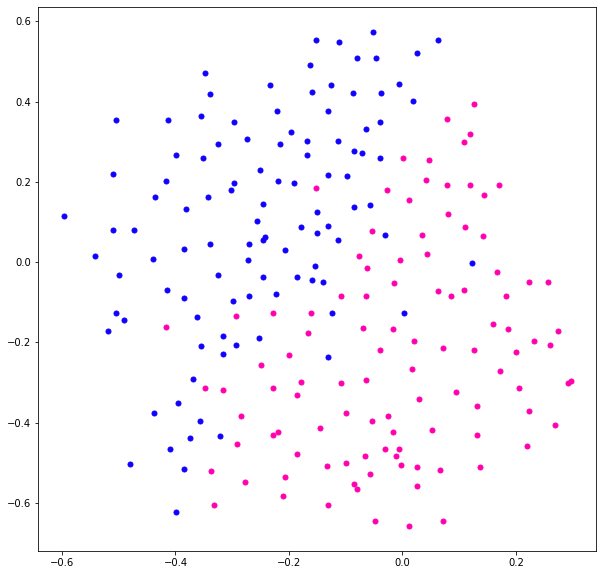

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='') 

In [5]:
def Model(params):
    dims = params['dims']
    X_train = params['X_train']
    Y_train = params['Y_train']
    epochs = params['epochs']
    learning_rate = params['learning_rate']
    batch_size = params['batch_size']
    l1 = params['l1']
    l2 = params['l2']
    dropout_rate = params['dropout_rate']
    threshold = params['threshold']    
    model = tf.keras.models.Sequential()
    kernel_regularizer = tf.keras.regularizers.L1L2(l1=l1, 
                                                    l2=l2)
    model.add(tf.keras.layers.Dense(dims[1], 
                                    activation='relu', 
                                    kernel_initializer='he_normal', 
                                    bias_initializer='zeros',
                                    kernel_regularizer=kernel_regularizer,
                                    input_shape=[dims[0]]))
    model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    for dim in dims[2:-1]:
        model.add(tf.keras.layers.Dense(dim, 
                                        activation='relu', 
                                        kernel_initializer='he_normal', 
                                        bias_initializer='zeros',
                                        kernel_regularizer=kernel_regularizer))
        model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    model.add(tf.keras.layers.Dense(dims[-1], 
                                    activation='sigmoid', 
                                    kernel_initializer='he_normal', 
                                    bias_initializer='zeros',
                                    kernel_regularizer=kernel_regularizer))
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    metric = tf.keras.metrics.BinaryAccuracy(threshold=threshold)
    model.compile(loss='binary_crossentropy', metrics=[metric], optimizer=optimizer)
    model.summary()
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                                                     patience=1000,
                                                     min_delta=0.001,
                                                     factor=0.1, 
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=5000,
                                                 min_delta=0.001)
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback1, callback2])
    return model

In [6]:
model = Model({'dims': [X_train.shape[1], 20, 3, Y_train.shape[1]], 
               'X_train': X_train,
               'Y_train': Y_train,
               'epochs':30000, 
               'learning_rate': 0.3,
               'batch_size': X_train.shape[0],
               'l1': 0.,
               'l2': 0.,
               'dropout_rate': 0.,
               'threshold': 0.5})

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                60        
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 63        
_________________________________________________________________
dropout_1 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
Train on 211 samples
Epoch 1/30000
211/211 [==============================] - 0s 1ms/sample - loss: 0.7542 - binary_accuracy

211/211 [==============================] - 0s 16us/sample - loss: 0.2993 - binary_accuracy: 0.9194
Epoch 65/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2973 - binary_accuracy: 0.9194
Epoch 66/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2954 - binary_accuracy: 0.9194
Epoch 67/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2935 - binary_accuracy: 0.9194
Epoch 68/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2917 - binary_accuracy: 0.9194
Epoch 69/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2900 - binary_accuracy: 0.9194
Epoch 70/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2884 - binary_accuracy: 0.9147
Epoch 71/30000
211/211 [==============================] - 0s 31us/sample - loss: 0.2868 - binary_accuracy: 0.9147
Epoch 72/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2852 - binary_accura

Epoch 136/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2429 - binary_accuracy: 0.9242
Epoch 137/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2427 - binary_accuracy: 0.9242
Epoch 138/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2424 - binary_accuracy: 0.9242
Epoch 139/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2422 - binary_accuracy: 0.9242
Epoch 140/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2419 - binary_accuracy: 0.9242
Epoch 141/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2417 - binary_accuracy: 0.9242
Epoch 142/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2415 - binary_accuracy: 0.9242
Epoch 143/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2412 - binary_accuracy: 0.9242
Epoch 144/30000
211/211 [==============================] - 0s 10us/sample - loss

Epoch 208/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2314 - binary_accuracy: 0.9289
Epoch 209/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2313 - binary_accuracy: 0.9336
Epoch 210/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2312 - binary_accuracy: 0.9336
Epoch 211/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2310 - binary_accuracy: 0.9336
Epoch 212/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2309 - binary_accuracy: 0.9336
Epoch 213/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2308 - binary_accuracy: 0.9336
Epoch 214/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2307 - binary_accuracy: 0.9336
Epoch 215/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2306 - binary_accuracy: 0.9336
Epoch 216/30000
211/211 [==============================] - 0s 10us/sample - loss

Epoch 280/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2258 - binary_accuracy: 0.9384
Epoch 281/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2258 - binary_accuracy: 0.9384
Epoch 282/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2257 - binary_accuracy: 0.9384
Epoch 283/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2257 - binary_accuracy: 0.9384
Epoch 284/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2256 - binary_accuracy: 0.9384
Epoch 285/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2256 - binary_accuracy: 0.9384
Epoch 286/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2255 - binary_accuracy: 0.9384
Epoch 287/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2254 - binary_accuracy: 0.9384
Epoch 288/30000
211/211 [==============================] - 0s 12us/sample - loss: 

Epoch 352/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2229 - binary_accuracy: 0.9384
Epoch 353/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2229 - binary_accuracy: 0.9384
Epoch 354/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2229 - binary_accuracy: 0.9384
Epoch 355/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2228 - binary_accuracy: 0.9384
Epoch 356/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2228 - binary_accuracy: 0.9384
Epoch 357/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2228 - binary_accuracy: 0.9384
Epoch 358/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2227 - binary_accuracy: 0.9384
Epoch 359/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2227 - binary_accuracy: 0.9384
Epoch 360/30000
211/211 [==============================] - 0s 10us/sample - loss

Epoch 424/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2208 - binary_accuracy: 0.9384
Epoch 425/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2208 - binary_accuracy: 0.9384
Epoch 426/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2208 - binary_accuracy: 0.9384
Epoch 427/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2207 - binary_accuracy: 0.9384
Epoch 428/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2207 - binary_accuracy: 0.9384
Epoch 429/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2207 - binary_accuracy: 0.9384
Epoch 430/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2207 - binary_accuracy: 0.9384
Epoch 431/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2206 - binary_accuracy: 0.9384
Epoch 432/30000
211/211 [==============================] - 0s 9us/sample - loss:

Epoch 496/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2189 - binary_accuracy: 0.9384
Epoch 497/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2189 - binary_accuracy: 0.9384
Epoch 498/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2189 - binary_accuracy: 0.9384
Epoch 499/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2189 - binary_accuracy: 0.9384
Epoch 500/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2188 - binary_accuracy: 0.9384
Epoch 501/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2188 - binary_accuracy: 0.9384
Epoch 502/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2188 - binary_accuracy: 0.9384
Epoch 503/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2188 - binary_accuracy: 0.9384
Epoch 504/30000
211/211 [==============================] - 0s 14us/sample - loss: 0

Epoch 568/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2172 - binary_accuracy: 0.9384
Epoch 569/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2172 - binary_accuracy: 0.9384
Epoch 570/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2172 - binary_accuracy: 0.9384
Epoch 571/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2171 - binary_accuracy: 0.9384
Epoch 572/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2171 - binary_accuracy: 0.9384
Epoch 573/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2171 - binary_accuracy: 0.9384
Epoch 574/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2171 - binary_accuracy: 0.9384
Epoch 575/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2170 - binary_accuracy: 0.9384
Epoch 576/30000
211/211 [==============================] - 0s 10us/sample - loss: 0

Epoch 640/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2155 - binary_accuracy: 0.9384
Epoch 641/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2155 - binary_accuracy: 0.9384
Epoch 642/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2155 - binary_accuracy: 0.9384
Epoch 643/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2155 - binary_accuracy: 0.9384
Epoch 644/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2155 - binary_accuracy: 0.9384
Epoch 645/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2155 - binary_accuracy: 0.9384
Epoch 646/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2154 - binary_accuracy: 0.9384
Epoch 647/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2154 - binary_accuracy: 0.9384
Epoch 648/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.

Epoch 712/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2139 - binary_accuracy: 0.9384
Epoch 713/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2139 - binary_accuracy: 0.9384
Epoch 714/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2139 - binary_accuracy: 0.9384
Epoch 715/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2139 - binary_accuracy: 0.9384
Epoch 716/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2138 - binary_accuracy: 0.9384
Epoch 717/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2138 - binary_accuracy: 0.9384
Epoch 718/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2138 - binary_accuracy: 0.9384
Epoch 719/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2138 - binary_accuracy: 0.9384
Epoch 720/30000
211/211 [==============================] - 0s 22us/sample - loss

Epoch 784/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2124 - binary_accuracy: 0.9384
Epoch 785/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2124 - binary_accuracy: 0.9384
Epoch 786/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2123 - binary_accuracy: 0.9384
Epoch 787/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2123 - binary_accuracy: 0.9384
Epoch 788/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2123 - binary_accuracy: 0.9384
Epoch 789/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2123 - binary_accuracy: 0.9384
Epoch 790/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2123 - binary_accuracy: 0.9384
Epoch 791/30000
211/211 [==============================] - 0s 33us/sample - loss: 0.2122 - binary_accuracy: 0.9384
Epoch 792/30000
211/211 [==============================] - 0s 11us/sample - loss

Epoch 856/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2109 - binary_accuracy: 0.9384
Epoch 857/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2109 - binary_accuracy: 0.9384
Epoch 858/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2109 - binary_accuracy: 0.9384
Epoch 859/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2109 - binary_accuracy: 0.9384
Epoch 860/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2109 - binary_accuracy: 0.9384
Epoch 861/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2108 - binary_accuracy: 0.9384
Epoch 862/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2108 - binary_accuracy: 0.9384
Epoch 863/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2108 - binary_accuracy: 0.9384
Epoch 864/30000
211/211 [==============================] - 0s 15us/sample - loss

Epoch 928/30000
211/211 [==============================] - 0s 30us/sample - loss: 0.2095 - binary_accuracy: 0.9431
Epoch 929/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2094 - binary_accuracy: 0.9431
Epoch 930/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2095 - binary_accuracy: 0.9431
Epoch 931/30000
211/211 [==============================] - 0s 28us/sample - loss: 0.2094 - binary_accuracy: 0.9431
Epoch 932/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2094 - binary_accuracy: 0.9431
Epoch 933/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2094 - binary_accuracy: 0.9431
Epoch 934/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2094 - binary_accuracy: 0.9431
Epoch 935/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2093 - binary_accuracy: 0.9431
Epoch 936/30000
211/211 [==============================] - 0s 12us/sample - loss

Epoch 1000/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2082 - binary_accuracy: 0.9431
Epoch 1001/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2082 - binary_accuracy: 0.9431
Epoch 1002/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2081 - binary_accuracy: 0.9431
Epoch 1003/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2082 - binary_accuracy: 0.9431
Epoch 1004/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2081 - binary_accuracy: 0.9431
Epoch 1005/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2081 - binary_accuracy: 0.9431
Epoch 1006/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2081 - binary_accuracy: 0.9431
Epoch 1007/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2081 - binary_accuracy: 0.9431
Epoch 1008/30000
211/211 [==============================] - 0s 16us/sampl

Epoch 1071/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2071 - binary_accuracy: 0.9431
Epoch 1072/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2070 - binary_accuracy: 0.9431
Epoch 1073/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2070 - binary_accuracy: 0.9431
Epoch 1074/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2070 - binary_accuracy: 0.9431
Epoch 1075/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2070 - binary_accuracy: 0.9431
Epoch 1076/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2070 - binary_accuracy: 0.9431
Epoch 1077/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2069 - binary_accuracy: 0.9431
Epoch 1078/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2069 - binary_accuracy: 0.9431
Epoch 1079/30000
211/211 [==============================] - 0s 8us/sample - 

Epoch 1142/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2060 - binary_accuracy: 0.9479
Epoch 1143/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2059 - binary_accuracy: 0.9431
Epoch 1144/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2059 - binary_accuracy: 0.9431
Epoch 1145/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2059 - binary_accuracy: 0.9431
Epoch 1146/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2059 - binary_accuracy: 0.9479
Epoch 1147/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2058 - binary_accuracy: 0.9431
Epoch 1148/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2058 - binary_accuracy: 0.9431
Epoch 1149/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2059 - binary_accuracy: 0.9431
Epoch 1150/30000
211/211 [==============================] - 0s 13us/sample -

Epoch 1213/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2049 - binary_accuracy: 0.9431
Epoch 1214/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2048 - binary_accuracy: 0.9479
Epoch 1215/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2049 - binary_accuracy: 0.9431
Epoch 1216/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2048 - binary_accuracy: 0.9479
Epoch 1217/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2051 - binary_accuracy: 0.9431
Epoch 1218/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2049 - binary_accuracy: 0.9479
Epoch 1219/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2048 - binary_accuracy: 0.9431
Epoch 1220/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2048 - binary_accuracy: 0.9479
Epoch 1221/30000
211/211 [==============================] - 0s 17us/samp

Epoch 1284/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2043 - binary_accuracy: 0.9479
Epoch 1285/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2043 - binary_accuracy: 0.9384
Epoch 1286/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2042 - binary_accuracy: 0.9479
Epoch 1287/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2045 - binary_accuracy: 0.9384
Epoch 1288/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2043 - binary_accuracy: 0.9479
Epoch 1289/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2046 - binary_accuracy: 0.9384
Epoch 1290/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2044 - binary_accuracy: 0.9479
Epoch 1291/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2043 - binary_accuracy: 0.9384
Epoch 1292/30000
211/211 [==============================] - 0s 9us/sample

Epoch 1355/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2075 - binary_accuracy: 0.9289
Epoch 1356/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2071 - binary_accuracy: 0.9431
Epoch 1357/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2079 - binary_accuracy: 0.9289
Epoch 1358/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2074 - binary_accuracy: 0.9384
Epoch 1359/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2082 - binary_accuracy: 0.9289
Epoch 1360/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2077 - binary_accuracy: 0.9384
Epoch 1361/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2090 - binary_accuracy: 0.9289
Epoch 1362/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2083 - binary_accuracy: 0.9384
Epoch 1363/30000
211/211 [==============================] - 0s 9us/sample -

Epoch 1426/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2092 - binary_accuracy: 0.9384
Epoch 1427/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2103 - binary_accuracy: 0.9242
Epoch 1428/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2094 - binary_accuracy: 0.9384
Epoch 1429/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2105 - binary_accuracy: 0.9242
Epoch 1430/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2097 - binary_accuracy: 0.9384
Epoch 1431/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2112 - binary_accuracy: 0.9194
Epoch 1432/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2102 - binary_accuracy: 0.9336
Epoch 1433/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2116 - binary_accuracy: 0.9194
Epoch 1434/30000
211/211 [==============================] - 0s 10us/samp

Epoch 1497/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2112 - binary_accuracy: 0.9242
Epoch 1498/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2101 - binary_accuracy: 0.9336
Epoch 1499/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2105 - binary_accuracy: 0.9194
Epoch 1500/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2093 - binary_accuracy: 0.9384
Epoch 1501/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2101 - binary_accuracy: 0.9194
Epoch 1502/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2092 - binary_accuracy: 0.9384
Epoch 1503/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2105 - binary_accuracy: 0.9194
Epoch 1504/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2095 - binary_accuracy: 0.9384
Epoch 1505/30000
211/211 [==============================] - 0s 14us/sample

Epoch 1568/30000
211/211 [==============================] - 0s 27us/sample - loss: 0.2088 - binary_accuracy: 0.9384
Epoch 1569/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2092 - binary_accuracy: 0.9194
Epoch 1570/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2084 - binary_accuracy: 0.9384
Epoch 1571/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2097 - binary_accuracy: 0.9242
Epoch 1572/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2087 - binary_accuracy: 0.9384
Epoch 1573/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2100 - binary_accuracy: 0.9242
Epoch 1574/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2090 - binary_accuracy: 0.9384
Epoch 1575/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2091 - binary_accuracy: 0.9194
Epoch 1576/30000
211/211 [==============================] - 0s 10us/sampl

Epoch 1639/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2089 - binary_accuracy: 0.9242
Epoch 1640/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2077 - binary_accuracy: 0.9384
Epoch 1641/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2078 - binary_accuracy: 0.9194
Epoch 1642/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2071 - binary_accuracy: 0.9384
Epoch 1643/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2083 - binary_accuracy: 0.9242
Epoch 1644/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2074 - binary_accuracy: 0.9384
Epoch 1645/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2079 - binary_accuracy: 0.9194
Epoch 1646/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2071 - binary_accuracy: 0.9384
Epoch 1647/30000
211/211 [==============================] - 0s 10us/sample - l

Epoch 1710/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2068 - binary_accuracy: 0.9336
Epoch 1711/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2082 - binary_accuracy: 0.9242
Epoch 1712/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2069 - binary_accuracy: 0.9384
Epoch 1713/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2082 - binary_accuracy: 0.9242
Epoch 1714/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2073 - binary_accuracy: 0.9384
Epoch 1715/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2074 - binary_accuracy: 0.9242
Epoch 1716/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2066 - binary_accuracy: 0.9384
Epoch 1717/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2080 - binary_accuracy: 0.9242
Epoch 1718/30000
211/211 [==============================] - 0s 10us/sample 

Epoch 1781/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2082 - binary_accuracy: 0.9242
Epoch 1782/30000
211/211 [==============================] - 0s 27us/sample - loss: 0.2073 - binary_accuracy: 0.9336
Epoch 1783/30000
211/211 [==============================] - 0s 26us/sample - loss: 0.2078 - binary_accuracy: 0.9242
Epoch 1784/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2066 - binary_accuracy: 0.9289
Epoch 1785/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2081 - binary_accuracy: 0.9242
Epoch 1786/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2067 - binary_accuracy: 0.9336
Epoch 1787/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2080 - binary_accuracy: 0.9242
Epoch 1788/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2071 - binary_accuracy: 0.9384
Epoch 1789/30000
211/211 [==============================] - 0s 10us/sampl

Epoch 1852/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2069 - binary_accuracy: 0.9289
Epoch 1853/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2071 - binary_accuracy: 0.9242
Epoch 1854/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2065 - binary_accuracy: 0.9289
Epoch 1855/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2076 - binary_accuracy: 0.9242
Epoch 1856/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2068 - binary_accuracy: 0.9289
Epoch 1857/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2089 - binary_accuracy: 0.9194
Epoch 1858/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2073 - binary_accuracy: 0.9242
Epoch 1859/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2076 - binary_accuracy: 0.9242
Epoch 1860/30000
211/211 [==============================] - 0s 20us/sampl

Epoch 1923/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2065 - binary_accuracy: 0.9242
Epoch 1924/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2059 - binary_accuracy: 0.9289
Epoch 1925/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2070 - binary_accuracy: 0.9242
Epoch 1926/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2063 - binary_accuracy: 0.9289
Epoch 1927/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2067 - binary_accuracy: 0.9242
Epoch 1928/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2055 - binary_accuracy: 0.9289
Epoch 1929/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2072 - binary_accuracy: 0.9194
Epoch 1930/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2058 - binary_accuracy: 0.9289
Epoch 1931/30000
211/211 [==============================] - 0s 14us/samp

Epoch 1994/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2063 - binary_accuracy: 0.9242
Epoch 1995/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2064 - binary_accuracy: 0.9242
Epoch 1996/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2052 - binary_accuracy: 0.9289
Epoch 1997/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2067 - binary_accuracy: 0.9194
Epoch 1998/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2054 - binary_accuracy: 0.9289
Epoch 1999/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2060 - binary_accuracy: 0.9194
Epoch 2000/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2048 - binary_accuracy: 0.9289
Epoch 2001/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2057 - binary_accuracy: 0.9242
Epoch 2002/30000
211/211 [==============================] - 0s 17us/sample

Epoch 2065/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2058 - binary_accuracy: 0.9242
Epoch 2066/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2052 - binary_accuracy: 0.9289
Epoch 2067/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2053 - binary_accuracy: 0.9242
Epoch 2068/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2047 - binary_accuracy: 0.9289
Epoch 2069/30000
211/211 [==============================] - 0s 27us/sample - loss: 0.2057 - binary_accuracy: 0.9242
Epoch 2070/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2050 - binary_accuracy: 0.9289
Epoch 2071/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2056 - binary_accuracy: 0.9194
Epoch 2072/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2046 - binary_accuracy: 0.9289
Epoch 2073/30000
211/211 [==============================] - 0s 16us/samp

Epoch 2136/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2043 - binary_accuracy: 0.9289
Epoch 2137/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2048 - binary_accuracy: 0.9194
Epoch 2138/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2037 - binary_accuracy: 0.9289
Epoch 2139/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2048 - binary_accuracy: 0.9242
Epoch 2140/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2038 - binary_accuracy: 0.9289
Epoch 2141/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2042 - binary_accuracy: 0.9289
Epoch 2142/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2032 - binary_accuracy: 0.9289
Epoch 2143/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2052 - binary_accuracy: 0.9242
Epoch 2144/30000
211/211 [==============================] - 0s 8us/sample

Epoch 2207/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2043 - binary_accuracy: 0.9242
Epoch 2208/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2031 - binary_accuracy: 0.9289
Epoch 2209/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2049 - binary_accuracy: 0.9242
Epoch 2210/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2038 - binary_accuracy: 0.9289
Epoch 2211/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2039 - binary_accuracy: 0.9289
Epoch 2212/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2025 - binary_accuracy: 0.9289
Epoch 2213/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2042 - binary_accuracy: 0.9289
Epoch 2214/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2030 - binary_accuracy: 0.9289
Epoch 2215/30000
211/211 [==============================] - 0s 8us/sample

Epoch 2278/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2030 - binary_accuracy: 0.9289
Epoch 2279/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2047 - binary_accuracy: 0.9242
Epoch 2280/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2042 - binary_accuracy: 0.9336
Epoch 2281/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2060 - binary_accuracy: 0.9194
Epoch 2282/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2049 - binary_accuracy: 0.9289
Epoch 2283/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2070 - binary_accuracy: 0.9147
Epoch 2284/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2055 - binary_accuracy: 0.9289
Epoch 2285/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2079 - binary_accuracy: 0.9147
Epoch 2286/30000
211/211 [==============================] - 0s 9us/sampl

Epoch 2349/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2098 - binary_accuracy: 0.9052
Epoch 2350/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2081 - binary_accuracy: 0.9289
Epoch 2351/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2103 - binary_accuracy: 0.9052
Epoch 2352/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2074 - binary_accuracy: 0.9289
Epoch 2353/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2089 - binary_accuracy: 0.9100
Epoch 2354/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2062 - binary_accuracy: 0.9289
Epoch 2355/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2059 - binary_accuracy: 0.9242
Epoch 2356/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2037 - binary_accuracy: 0.9336
Epoch 2357/30000
211/211 [==============================] - 0s 17us/samp

Epoch 2420/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2070 - binary_accuracy: 0.9289
Epoch 2421/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2091 - binary_accuracy: 0.9147
Epoch 2422/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2075 - binary_accuracy: 0.9289
Epoch 2423/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2091 - binary_accuracy: 0.9147
Epoch 2424/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2063 - binary_accuracy: 0.9289
Epoch 2425/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2077 - binary_accuracy: 0.9147
Epoch 2426/30000
211/211 [==============================] - 0s 26us/sample - loss: 0.2051 - binary_accuracy: 0.9289
Epoch 2427/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2046 - binary_accuracy: 0.9242
Epoch 2428/30000
211/211 [==============================] - 0s 16us/samp

Epoch 2491/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2108 - binary_accuracy: 0.9005
Epoch 2492/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2078 - binary_accuracy: 0.9289
Epoch 2493/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2100 - binary_accuracy: 0.9052
Epoch 2494/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2081 - binary_accuracy: 0.9289
Epoch 2495/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2106 - binary_accuracy: 0.9052
Epoch 2496/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2074 - binary_accuracy: 0.9289
Epoch 2497/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2080 - binary_accuracy: 0.9100
Epoch 2498/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2064 - binary_accuracy: 0.9289
Epoch 2499/30000
211/211 [==============================] - 0s 21us/samp

Epoch 2562/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2053 - binary_accuracy: 0.9289
Epoch 2563/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2073 - binary_accuracy: 0.9147
Epoch 2564/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2062 - binary_accuracy: 0.9289
Epoch 2565/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2088 - binary_accuracy: 0.9147
Epoch 2566/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2073 - binary_accuracy: 0.9289
Epoch 2567/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2094 - binary_accuracy: 0.9052
Epoch 2568/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2068 - binary_accuracy: 0.9289
Epoch 2569/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2095 - binary_accuracy: 0.9052
Epoch 2570/30000
211/211 [==============================] - 0s 10us/sample

Epoch 2633/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2041 - binary_accuracy: 0.9194
Epoch 2634/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2028 - binary_accuracy: 0.9289
Epoch 2635/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2047 - binary_accuracy: 0.9147
Epoch 2636/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2041 - binary_accuracy: 0.9289
Epoch 2637/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2062 - binary_accuracy: 0.9147
Epoch 2638/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2053 - binary_accuracy: 0.9289
Epoch 2639/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2070 - binary_accuracy: 0.9100
Epoch 2640/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2049 - binary_accuracy: 0.9289
Epoch 2641/30000
211/211 [==============================] - 0s 9us/sample 

Epoch 2704/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2072 - binary_accuracy: 0.9289
Epoch 2705/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2090 - binary_accuracy: 0.9052
Epoch 2706/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2078 - binary_accuracy: 0.9289
Epoch 2707/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2100 - binary_accuracy: 0.9052
Epoch 2708/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2084 - binary_accuracy: 0.9289
Epoch 2709/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2104 - binary_accuracy: 0.9052
Epoch 2710/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2087 - binary_accuracy: 0.9336
Epoch 2711/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2102 - binary_accuracy: 0.9100
Epoch 2712/30000
211/211 [==============================] - 0s 13us/sample

Epoch 2775/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2020 - binary_accuracy: 0.9242
Epoch 2776/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2007 - binary_accuracy: 0.9336
Epoch 2777/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2028 - binary_accuracy: 0.9242
Epoch 2778/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2021 - binary_accuracy: 0.9289
Epoch 2779/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2041 - binary_accuracy: 0.9147
Epoch 2780/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2035 - binary_accuracy: 0.9289
Epoch 2781/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2055 - binary_accuracy: 0.9100
Epoch 2782/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2047 - binary_accuracy: 0.9289
Epoch 2783/30000
211/211 [==============================] - 0s 21us/samp

Epoch 2846/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1986 - binary_accuracy: 0.9336
Epoch 2847/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2002 - binary_accuracy: 0.9242
Epoch 2848/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1992 - binary_accuracy: 0.9336
Epoch 2849/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1989 - binary_accuracy: 0.9289
Epoch 2850/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1986 - binary_accuracy: 0.9336
Epoch 2851/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1998 - binary_accuracy: 0.9289
Epoch 2852/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1988 - binary_accuracy: 0.9336
Epoch 2853/30000
211/211 [==============================] - 0s 29us/sample - loss: 0.1991 - binary_accuracy: 0.9289
Epoch 2854/30000
211/211 [==============================] - 0s 10us/samp

Epoch 2917/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1966 - binary_accuracy: 0.9242
Epoch 2918/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1964 - binary_accuracy: 0.9384
Epoch 2919/30000
211/211 [==============================] - 0s 27us/sample - loss: 0.1977 - binary_accuracy: 0.9289
Epoch 2920/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1970 - binary_accuracy: 0.9384
Epoch 2921/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1969 - binary_accuracy: 0.9242
Epoch 2922/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1964 - binary_accuracy: 0.9336
Epoch 2923/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1971 - binary_accuracy: 0.9242
Epoch 2924/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1970 - binary_accuracy: 0.9384
Epoch 2925/30000
211/211 [==============================] - 0s 9us/sampl

Epoch 2988/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.1989 - binary_accuracy: 0.9336
Epoch 2989/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1985 - binary_accuracy: 0.9242
Epoch 2990/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1972 - binary_accuracy: 0.9336
Epoch 2991/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1977 - binary_accuracy: 0.9289
Epoch 2992/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1973 - binary_accuracy: 0.9336
Epoch 2993/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1969 - binary_accuracy: 0.9242
Epoch 2994/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.1962 - binary_accuracy: 0.9431
Epoch 2995/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1961 - binary_accuracy: 0.9242
Epoch 2996/30000
211/211 [==============================] - 0s 10us/sampl

Epoch 3059/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2020 - binary_accuracy: 0.9194
Epoch 3060/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2000 - binary_accuracy: 0.9336
Epoch 3061/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2012 - binary_accuracy: 0.9242
Epoch 3062/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2003 - binary_accuracy: 0.9336
Epoch 3063/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2010 - binary_accuracy: 0.9242
Epoch 3064/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2000 - binary_accuracy: 0.9336
Epoch 3065/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2010 - binary_accuracy: 0.9242
Epoch 3066/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1992 - binary_accuracy: 0.9336
Epoch 3067/30000
211/211 [==============================] - 0s 9us/sample -

Epoch 3130/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1945 - binary_accuracy: 0.9431
Epoch 3131/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1950 - binary_accuracy: 0.9336
Epoch 3132/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1950 - binary_accuracy: 0.9431
Epoch 3133/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1950 - binary_accuracy: 0.9289
Epoch 3134/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1949 - binary_accuracy: 0.9431
Epoch 3135/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1948 - binary_accuracy: 0.9289
Epoch 3136/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1948 - binary_accuracy: 0.9431
Epoch 3137/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1958 - binary_accuracy: 0.9242
Epoch 3138/30000
211/211 [==============================] - 0s 12us/samp

Epoch 3201/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2006 - binary_accuracy: 0.9242
Epoch 3202/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1988 - binary_accuracy: 0.9336
Epoch 3203/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2002 - binary_accuracy: 0.9242
Epoch 3204/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1992 - binary_accuracy: 0.9336
Epoch 3205/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1996 - binary_accuracy: 0.9242
Epoch 3206/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1988 - binary_accuracy: 0.9336
Epoch 3207/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1999 - binary_accuracy: 0.9242
Epoch 3208/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1990 - binary_accuracy: 0.9336
Epoch 3209/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 3272/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1989 - binary_accuracy: 0.9336
Epoch 3273/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1996 - binary_accuracy: 0.9242
Epoch 3274/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.1991 - binary_accuracy: 0.9336
Epoch 3275/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1996 - binary_accuracy: 0.9194
Epoch 3276/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1988 - binary_accuracy: 0.9336
Epoch 3277/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1996 - binary_accuracy: 0.9242
Epoch 3278/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1981 - binary_accuracy: 0.9336
Epoch 3279/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1991 - binary_accuracy: 0.9242
Epoch 3280/30000
211/211 [==============================] - 0s 9us/sample

Epoch 3343/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1996 - binary_accuracy: 0.9194
Epoch 3344/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1990 - binary_accuracy: 0.9336
Epoch 3345/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1995 - binary_accuracy: 0.9194
Epoch 3346/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1987 - binary_accuracy: 0.9336
Epoch 3347/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1993 - binary_accuracy: 0.9194
Epoch 3348/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1987 - binary_accuracy: 0.9336
Epoch 3349/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1995 - binary_accuracy: 0.9194
Epoch 3350/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1989 - binary_accuracy: 0.9336
Epoch 3351/30000
211/211 [==============================] - 0s 17us/sampl

Epoch 3414/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1985 - binary_accuracy: 0.9336
Epoch 3415/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1987 - binary_accuracy: 0.9194
Epoch 3416/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1978 - binary_accuracy: 0.9336
Epoch 3417/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1984 - binary_accuracy: 0.9194
Epoch 3418/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1975 - binary_accuracy: 0.9336
Epoch 3419/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1989 - binary_accuracy: 0.9194
Epoch 3420/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1981 - binary_accuracy: 0.9336
Epoch 3421/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1983 - binary_accuracy: 0.9194
Epoch 3422/30000
211/211 [==============================] - 0s 10us/sampl

Epoch 3485/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1975 - binary_accuracy: 0.9242
Epoch 3486/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1973 - binary_accuracy: 0.9336
Epoch 3487/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1981 - binary_accuracy: 0.9194
Epoch 3488/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1973 - binary_accuracy: 0.9336
Epoch 3489/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1981 - binary_accuracy: 0.9242
Epoch 3490/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1973 - binary_accuracy: 0.9336
Epoch 3491/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1987 - binary_accuracy: 0.9194
Epoch 3492/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1979 - binary_accuracy: 0.9336
Epoch 3493/30000
211/211 [==============================] - 0s 15us/samp

Epoch 3556/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1972 - binary_accuracy: 0.9336
Epoch 3557/30000
211/211 [==============================] - 0s 30us/sample - loss: 0.1981 - binary_accuracy: 0.9194
Epoch 3558/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1974 - binary_accuracy: 0.9336
Epoch 3559/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1982 - binary_accuracy: 0.9194
Epoch 3560/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1976 - binary_accuracy: 0.9336
Epoch 3561/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.1985 - binary_accuracy: 0.9194
Epoch 3562/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.1979 - binary_accuracy: 0.9336
Epoch 3563/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1984 - binary_accuracy: 0.9194
Epoch 3564/30000
211/211 [==============================] - 0s 42us/samp

Epoch 3627/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1979 - binary_accuracy: 0.9194
Epoch 3628/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1973 - binary_accuracy: 0.9336
Epoch 3629/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1978 - binary_accuracy: 0.9194
Epoch 3630/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1971 - binary_accuracy: 0.9336
Epoch 3631/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1979 - binary_accuracy: 0.9194
Epoch 3632/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1974 - binary_accuracy: 0.9336
Epoch 3633/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1980 - binary_accuracy: 0.9194
Epoch 3634/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1973 - binary_accuracy: 0.9336
Epoch 3635/30000
211/211 [==============================] - 0s 12us/samp

Epoch 3698/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.1967 - binary_accuracy: 0.9336
Epoch 3699/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.1976 - binary_accuracy: 0.9194
Epoch 3700/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1971 - binary_accuracy: 0.9336
Epoch 3701/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1976 - binary_accuracy: 0.9194
Epoch 3702/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1970 - binary_accuracy: 0.9336
Epoch 3703/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1974 - binary_accuracy: 0.9194
Epoch 3704/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1967 - binary_accuracy: 0.9336
Epoch 3705/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1975 - binary_accuracy: 0.9194
Epoch 3706/30000
211/211 [==============================] - 0s 13us/samp

Epoch 3769/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.1976 - binary_accuracy: 0.9194
Epoch 3770/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.1970 - binary_accuracy: 0.9336
Epoch 3771/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1975 - binary_accuracy: 0.9194
Epoch 3772/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1969 - binary_accuracy: 0.9336
Epoch 3773/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1974 - binary_accuracy: 0.9194
Epoch 3774/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1968 - binary_accuracy: 0.9336
Epoch 3775/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1975 - binary_accuracy: 0.9194
Epoch 3776/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1970 - binary_accuracy: 0.9336
Epoch 3777/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 3840/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.1969 - binary_accuracy: 0.9336
Epoch 3841/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1977 - binary_accuracy: 0.9194
Epoch 3842/30000
211/211 [==============================] - 0s 36us/sample - loss: 0.1972 - binary_accuracy: 0.9336
Epoch 3843/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1973 - binary_accuracy: 0.9194
Epoch 3844/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1968 - binary_accuracy: 0.9336
Epoch 3845/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1976 - binary_accuracy: 0.9194
Epoch 3846/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1968 - binary_accuracy: 0.9336
Epoch 3847/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1976 - binary_accuracy: 0.9194
Epoch 3848/30000
211/211 [==============================] - 0s 16us/sample 

Epoch 3911/30000
211/211 [==============================] - 0s 27us/sample - loss: 0.1974 - binary_accuracy: 0.9194
Epoch 3912/30000
211/211 [==============================] - 0s 32us/sample - loss: 0.1969 - binary_accuracy: 0.9336
Epoch 3913/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1980 - binary_accuracy: 0.9194
Epoch 3914/30000
211/211 [==============================] - 0s 30us/sample - loss: 0.1975 - binary_accuracy: 0.9336
Epoch 3915/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1975 - binary_accuracy: 0.9194
Epoch 3916/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1968 - binary_accuracy: 0.9336
Epoch 3917/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1972 - binary_accuracy: 0.9194
Epoch 3918/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1967 - binary_accuracy: 0.9336
Epoch 3919/30000
211/211 [==============================] - 0s 10us/samp

Epoch 3982/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1965 - binary_accuracy: 0.9336
Epoch 3983/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1970 - binary_accuracy: 0.9194
Epoch 3984/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1965 - binary_accuracy: 0.9336
Epoch 3985/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1976 - binary_accuracy: 0.9194
Epoch 3986/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1972 - binary_accuracy: 0.9336
Epoch 3987/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1972 - binary_accuracy: 0.9194
Epoch 3988/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1965 - binary_accuracy: 0.9336
Epoch 3989/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1969 - binary_accuracy: 0.9194
Epoch 3990/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 4053/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1971 - binary_accuracy: 0.9194
Epoch 4054/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1967 - binary_accuracy: 0.9336
Epoch 4055/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1970 - binary_accuracy: 0.9194
Epoch 4056/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1963 - binary_accuracy: 0.9336
Epoch 4057/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1975 - binary_accuracy: 0.9194
Epoch 4058/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1972 - binary_accuracy: 0.9336
Epoch 4059/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1971 - binary_accuracy: 0.9194
Epoch 4060/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1967 - binary_accuracy: 0.9336
Epoch 4061/30000
211/211 [==============================] - 0s 9us/sample

Epoch 4124/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1970 - binary_accuracy: 0.9336
Epoch 4125/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1969 - binary_accuracy: 0.9194
Epoch 4126/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1965 - binary_accuracy: 0.9336
Epoch 4127/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1968 - binary_accuracy: 0.9194
Epoch 4128/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1962 - binary_accuracy: 0.9336
Epoch 4129/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1973 - binary_accuracy: 0.9194
Epoch 4130/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1947 - binary_accuracy: 0.9242
Epoch 4131/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1930 - binary_accuracy: 0.9336
Epoch 4132/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 4195/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1897 - binary_accuracy: 0.9431
Epoch 4196/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1897 - binary_accuracy: 0.9431
Epoch 4197/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1897 - binary_accuracy: 0.9431
Epoch 4198/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1897 - binary_accuracy: 0.9431
Epoch 4199/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1897 - binary_accuracy: 0.9431
Epoch 4200/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1897 - binary_accuracy: 0.9431
Epoch 4201/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1897 - binary_accuracy: 0.9431
Epoch 4202/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1897 - binary_accuracy: 0.9431
Epoch 4203/30000
211/211 [==============================] - 0s 9us/sample

Epoch 4266/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1896 - binary_accuracy: 0.9431
Epoch 4267/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.1896 - binary_accuracy: 0.9431
Epoch 4268/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1896 - binary_accuracy: 0.9431
Epoch 4269/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1896 - binary_accuracy: 0.9431
Epoch 4270/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.1896 - binary_accuracy: 0.9431
Epoch 4271/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1896 - binary_accuracy: 0.9431
Epoch 4272/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1896 - binary_accuracy: 0.9431
Epoch 4273/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1896 - binary_accuracy: 0.9431
Epoch 4274/30000
211/211 [==============================] - 0s 13us/samp

Epoch 4337/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1894 - binary_accuracy: 0.9431
Epoch 4338/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1894 - binary_accuracy: 0.9431
Epoch 4339/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1894 - binary_accuracy: 0.9431
Epoch 4340/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1894 - binary_accuracy: 0.9431
Epoch 4341/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1894 - binary_accuracy: 0.9431
Epoch 4342/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1894 - binary_accuracy: 0.9431
Epoch 4343/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.1894 - binary_accuracy: 0.9431
Epoch 4344/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1894 - binary_accuracy: 0.9431
Epoch 4345/30000
211/211 [==============================] - 0s 17us/sample 

Epoch 4408/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.1893 - binary_accuracy: 0.9431
Epoch 4409/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1893 - binary_accuracy: 0.9431
Epoch 4410/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1893 - binary_accuracy: 0.9431
Epoch 4411/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1893 - binary_accuracy: 0.9431
Epoch 4412/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1893 - binary_accuracy: 0.9431
Epoch 4413/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1893 - binary_accuracy: 0.9431
Epoch 4414/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1893 - binary_accuracy: 0.9431
Epoch 4415/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1893 - binary_accuracy: 0.9431
Epoch 4416/30000
211/211 [==============================] - 0s 11us/sample

Epoch 4479/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1893 - binary_accuracy: 0.9431
Epoch 4480/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1892 - binary_accuracy: 0.9431
Epoch 4481/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1892 - binary_accuracy: 0.9431
Epoch 4482/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1892 - binary_accuracy: 0.9431
Epoch 4483/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1892 - binary_accuracy: 0.9431
Epoch 4484/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1892 - binary_accuracy: 0.9431
Epoch 4485/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1892 - binary_accuracy: 0.9431
Epoch 4486/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1892 - binary_accuracy: 0.9431
Epoch 4487/30000
211/211 [==============================] - 0s 23us/samp

Epoch 4550/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1892 - binary_accuracy: 0.9431
Epoch 4551/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.1892 - binary_accuracy: 0.9431
Epoch 4552/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1892 - binary_accuracy: 0.9431
Epoch 4553/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1892 - binary_accuracy: 0.9431
Epoch 4554/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1892 - binary_accuracy: 0.9431
Epoch 4555/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1892 - binary_accuracy: 0.9431
Epoch 4556/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1892 - binary_accuracy: 0.9431
Epoch 4557/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1892 - binary_accuracy: 0.9431
Epoch 4558/30000
211/211 [==============================] - 0s 9us/sample 

Epoch 4621/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1891 - binary_accuracy: 0.9431
Epoch 4622/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1891 - binary_accuracy: 0.9431
Epoch 4623/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1891 - binary_accuracy: 0.9431
Epoch 4624/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1891 - binary_accuracy: 0.9431
Epoch 4625/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1891 - binary_accuracy: 0.9431
Epoch 4626/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1891 - binary_accuracy: 0.9431
Epoch 4627/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1891 - binary_accuracy: 0.9431
Epoch 4628/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1891 - binary_accuracy: 0.9431
Epoch 4629/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 4692/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.1891 - binary_accuracy: 0.9431
Epoch 4693/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1891 - binary_accuracy: 0.9431
Epoch 4694/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1891 - binary_accuracy: 0.9431
Epoch 4695/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.1891 - binary_accuracy: 0.9431
Epoch 4696/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1891 - binary_accuracy: 0.9431
Epoch 4697/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1891 - binary_accuracy: 0.9431
Epoch 4698/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.1891 - binary_accuracy: 0.9431
Epoch 4699/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1891 - binary_accuracy: 0.9431
Epoch 4700/30000
211/211 [==============================] - 0s 11us/samp

Epoch 4763/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1890 - binary_accuracy: 0.9431
Epoch 4764/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1890 - binary_accuracy: 0.9431
Epoch 4765/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1890 - binary_accuracy: 0.9431
Epoch 4766/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1890 - binary_accuracy: 0.9431
Epoch 4767/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1890 - binary_accuracy: 0.9431
Epoch 4768/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1890 - binary_accuracy: 0.9431
Epoch 4769/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.1890 - binary_accuracy: 0.9431
Epoch 4770/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1890 - binary_accuracy: 0.9431
Epoch 4771/30000
211/211 [==============================] - 0s 18us/samp

Epoch 4834/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1890 - binary_accuracy: 0.9431
Epoch 4835/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1890 - binary_accuracy: 0.9431
Epoch 4836/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1890 - binary_accuracy: 0.9431
Epoch 4837/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1890 - binary_accuracy: 0.9431
Epoch 4838/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1890 - binary_accuracy: 0.9431
Epoch 4839/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1890 - binary_accuracy: 0.9431
Epoch 4840/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1890 - binary_accuracy: 0.9431
Epoch 4841/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1890 - binary_accuracy: 0.9431
Epoch 4842/30000
211/211 [==============================] - 0s 16us/sampl

Epoch 4905/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1889 - binary_accuracy: 0.9431
Epoch 4906/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1889 - binary_accuracy: 0.9431
Epoch 4907/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.1889 - binary_accuracy: 0.9431
Epoch 4908/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1889 - binary_accuracy: 0.9431
Epoch 4909/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1889 - binary_accuracy: 0.9431
Epoch 4910/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1889 - binary_accuracy: 0.9431
Epoch 4911/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1889 - binary_accuracy: 0.9431
Epoch 4912/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1889 - binary_accuracy: 0.9431
Epoch 4913/30000
211/211 [==============================] - 0s 12us/samp

Epoch 4976/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1889 - binary_accuracy: 0.9431
Epoch 4977/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1889 - binary_accuracy: 0.9431
Epoch 4978/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1889 - binary_accuracy: 0.9431
Epoch 4979/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1889 - binary_accuracy: 0.9431
Epoch 4980/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1889 - binary_accuracy: 0.9431
Epoch 4981/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1889 - binary_accuracy: 0.9431
Epoch 4982/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1889 - binary_accuracy: 0.9431
Epoch 4983/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1889 - binary_accuracy: 0.9431
Epoch 4984/30000
211/211 [==============================] - 0s 13us/samp

Epoch 5047/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1888 - binary_accuracy: 0.9431
Epoch 5048/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1888 - binary_accuracy: 0.9431
Epoch 5049/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1888 - binary_accuracy: 0.9431
Epoch 5050/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1888 - binary_accuracy: 0.9431
Epoch 5051/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1888 - binary_accuracy: 0.9431
Epoch 5052/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1888 - binary_accuracy: 0.9431
Epoch 5053/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1888 - binary_accuracy: 0.9431
Epoch 5054/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1888 - binary_accuracy: 0.9431
Epoch 5055/30000
211/211 [==============================] - 0s 12us/samp

Epoch 5118/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1888 - binary_accuracy: 0.9431
Epoch 5119/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1888 - binary_accuracy: 0.9431
Epoch 5120/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1888 - binary_accuracy: 0.9431
Epoch 5121/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1888 - binary_accuracy: 0.9431
Epoch 5122/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1888 - binary_accuracy: 0.9431
Epoch 5123/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1888 - binary_accuracy: 0.9431
Epoch 5124/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1888 - binary_accuracy: 0.9431
Epoch 5125/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1888 - binary_accuracy: 0.9431
Epoch 5126/30000
211/211 [==============================] - 0s 11us/sample

Epoch 5189/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1888 - binary_accuracy: 0.9431
Epoch 5190/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1887 - binary_accuracy: 0.9431
Epoch 5191/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1887 - binary_accuracy: 0.9431
Epoch 5192/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1887 - binary_accuracy: 0.9431
Epoch 5193/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1888 - binary_accuracy: 0.9431
Epoch 5194/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1887 - binary_accuracy: 0.9431
Epoch 5195/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1887 - binary_accuracy: 0.9431
Epoch 5196/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1887 - binary_accuracy: 0.9431
Epoch 5197/30000
211/211 [==============================] - 0s 10us/samp

Epoch 5260/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1887 - binary_accuracy: 0.9431
Epoch 5261/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1887 - binary_accuracy: 0.9431
Epoch 5262/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1887 - binary_accuracy: 0.9431
Epoch 5263/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1887 - binary_accuracy: 0.9431
Epoch 5264/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1887 - binary_accuracy: 0.9431
Epoch 5265/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1887 - binary_accuracy: 0.9431
Epoch 5266/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1887 - binary_accuracy: 0.9431
Epoch 5267/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1887 - binary_accuracy: 0.9431
Epoch 5268/30000
211/211 [==============================] - 0s 21us/samp

Epoch 5331/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1887 - binary_accuracy: 0.9431
Epoch 5332/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1887 - binary_accuracy: 0.9431
Epoch 5333/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1887 - binary_accuracy: 0.9431
Epoch 5334/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1887 - binary_accuracy: 0.9431
Epoch 5335/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1887 - binary_accuracy: 0.9431
Epoch 5336/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1887 - binary_accuracy: 0.9431
Epoch 5337/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1887 - binary_accuracy: 0.9431
Epoch 5338/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1887 - binary_accuracy: 0.9431
Epoch 5339/30000
211/211 [==============================] - 0s 11us/sample

Epoch 5402/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1886 - binary_accuracy: 0.9431
Epoch 5403/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1886 - binary_accuracy: 0.9431
Epoch 5404/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1886 - binary_accuracy: 0.9431
Epoch 5405/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1886 - binary_accuracy: 0.9431
Epoch 5406/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1886 - binary_accuracy: 0.9431
Epoch 5407/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1886 - binary_accuracy: 0.9431
Epoch 5408/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1886 - binary_accuracy: 0.9431
Epoch 5409/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1886 - binary_accuracy: 0.9431
Epoch 5410/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 5473/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.1886 - binary_accuracy: 0.9431
Epoch 5474/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1886 - binary_accuracy: 0.9431
Epoch 5475/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1886 - binary_accuracy: 0.9431
Epoch 5476/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1886 - binary_accuracy: 0.9431
Epoch 5477/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1886 - binary_accuracy: 0.9431
Epoch 5478/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1886 - binary_accuracy: 0.9431
Epoch 5479/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1886 - binary_accuracy: 0.9431
Epoch 5480/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.1886 - binary_accuracy: 0.9431
Epoch 5481/30000
211/211 [==============================] - 0s 14us/samp

Epoch 5544/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1885 - binary_accuracy: 0.9431
Epoch 5545/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1885 - binary_accuracy: 0.9431
Epoch 5546/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1885 - binary_accuracy: 0.9431
Epoch 5547/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1885 - binary_accuracy: 0.9431
Epoch 5548/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1885 - binary_accuracy: 0.9431
Epoch 5549/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1885 - binary_accuracy: 0.9431
Epoch 5550/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1885 - binary_accuracy: 0.9431
Epoch 5551/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1885 - binary_accuracy: 0.9431
Epoch 5552/30000
211/211 [==============================] - 0s 15us/sampl

Epoch 5615/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1885 - binary_accuracy: 0.9431
Epoch 5616/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1885 - binary_accuracy: 0.9431
Epoch 5617/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1885 - binary_accuracy: 0.9431
Epoch 5618/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1885 - binary_accuracy: 0.9431
Epoch 5619/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1885 - binary_accuracy: 0.9431
Epoch 5620/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1885 - binary_accuracy: 0.9431
Epoch 5621/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1885 - binary_accuracy: 0.9431
Epoch 5622/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1885 - binary_accuracy: 0.9431
Epoch 5623/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 5686/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1884 - binary_accuracy: 0.9431
Epoch 5687/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1885 - binary_accuracy: 0.9431
Epoch 5688/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.1885 - binary_accuracy: 0.9431
Epoch 5689/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1884 - binary_accuracy: 0.9431
Epoch 5690/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1885 - binary_accuracy: 0.9431
Epoch 5691/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1885 - binary_accuracy: 0.9431
Epoch 5692/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1884 - binary_accuracy: 0.9431
Epoch 5693/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1884 - binary_accuracy: 0.9431
Epoch 5694/30000
211/211 [==============================] - 0s 10us/sampl

Epoch 5757/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1884 - binary_accuracy: 0.9431
Epoch 5758/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1884 - binary_accuracy: 0.9431
Epoch 5759/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1884 - binary_accuracy: 0.9431
Epoch 5760/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1884 - binary_accuracy: 0.9431
Epoch 5761/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1884 - binary_accuracy: 0.9431
Epoch 5762/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1884 - binary_accuracy: 0.9431
Epoch 5763/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1884 - binary_accuracy: 0.9431
Epoch 5764/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1884 - binary_accuracy: 0.9431
Epoch 5765/30000
211/211 [==============================] - 0s 10us/samp

Epoch 5828/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1884 - binary_accuracy: 0.9431
Epoch 5829/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1884 - binary_accuracy: 0.9431
Epoch 5830/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1884 - binary_accuracy: 0.9431
Epoch 5831/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1884 - binary_accuracy: 0.9431
Epoch 5832/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1884 - binary_accuracy: 0.9431
Epoch 5833/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1884 - binary_accuracy: 0.9431
Epoch 5834/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1884 - binary_accuracy: 0.9431
Epoch 5835/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.1884 - binary_accuracy: 0.9431
Epoch 5836/30000
211/211 [==============================] - 0s 27us/samp

Epoch 5899/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1883 - binary_accuracy: 0.9431
Epoch 5900/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1883 - binary_accuracy: 0.9431
Epoch 5901/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1883 - binary_accuracy: 0.9431
Epoch 5902/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1883 - binary_accuracy: 0.9431
Epoch 5903/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1883 - binary_accuracy: 0.9431
Epoch 5904/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1883 - binary_accuracy: 0.9431
Epoch 5905/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1883 - binary_accuracy: 0.9431
Epoch 5906/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1883 - binary_accuracy: 0.9431
Epoch 5907/30000
211/211 [==============================] - 0s 18us/sampl

Epoch 5970/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1883 - binary_accuracy: 0.9431
Epoch 5971/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1883 - binary_accuracy: 0.9431
Epoch 5972/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1883 - binary_accuracy: 0.9431
Epoch 5973/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1883 - binary_accuracy: 0.9431
Epoch 5974/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1883 - binary_accuracy: 0.9431
Epoch 5975/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1883 - binary_accuracy: 0.9431
Epoch 5976/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1883 - binary_accuracy: 0.9431
Epoch 5977/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1883 - binary_accuracy: 0.9431
Epoch 5978/30000
211/211 [==============================] - 0s 10us/samp

Epoch 6041/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6042/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6043/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1883 - binary_accuracy: 0.9431
Epoch 6044/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6045/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1883 - binary_accuracy: 0.9431
Epoch 6046/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6047/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6048/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6049/30000
211/211 [==============================] - 0s 10us/sampl

Epoch 6112/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6113/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6114/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6115/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6116/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6117/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6118/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6119/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6120/30000
211/211 [==============================] - 0s 9us/sampl

Epoch 6183/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6184/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6185/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6186/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6187/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6188/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6189/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6190/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6191/30000
211/211 [==============================] - 0s 10us/sampl

Epoch 6254/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6255/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6256/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6257/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6258/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6259/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6260/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6261/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6262/30000
211/211 [==============================] - 0s 12us/samp

Epoch 6325/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6326/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6327/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6328/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6329/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6330/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6331/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6332/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6333/30000
211/211 [==============================] - 0s 18us/sampl

Epoch 6396/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6397/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6398/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6399/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6400/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6401/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6402/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6403/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6404/30000
211/211 [==============================] - 0s 14us/samp

Epoch 6467/30000
211/211 [==============================] - 0s 35us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6468/30000
211/211 [==============================] - 0s 33us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6469/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6470/30000
211/211 [==============================] - 0s 77us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6471/30000
211/211 [==============================] - 0s 92us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6472/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6473/30000
211/211 [==============================] - 0s 51us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6474/30000
211/211 [==============================] - 0s 53us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6475/30000
211/211 [==============================] - 0s 47us/samp

Epoch 6538/30000
211/211 [==============================] - 0s 37us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6539/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6540/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6541/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6542/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6543/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6544/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6545/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6546/30000
211/211 [==============================] - 0s 13us/samp

Epoch 6609/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6610/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6611/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6612/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6613/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6614/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6615/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6616/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6617/30000
211/211 [==============================] - 0s 16us/sampl

Epoch 6680/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6681/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6682/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6683/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6684/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6685/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6686/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6687/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6688/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 6751/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6752/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6753/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6754/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6755/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6756/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6757/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6758/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6759/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 6822/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6823/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6824/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6825/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6826/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6827/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6828/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6829/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6830/30000
211/211 [==============================] - 0s 18us/samp

Epoch 6893/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6894/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6895/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6896/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6897/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6898/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6899/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6900/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6901/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 6964/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6965/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6966/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6967/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6968/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6969/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6970/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6971/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 6972/30000
211/211 [==============================] - 0s 10us/sampl

Epoch 7035/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7036/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7037/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7038/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7039/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7040/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7041/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7042/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7043/30000
211/211 [==============================] - 0s 10us/sampl

Epoch 7106/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7107/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7108/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7109/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7110/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7111/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7112/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7113/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7114/30000
211/211 [==============================] - 0s 12us/samp

Epoch 7177/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7178/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7179/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7180/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7181/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7182/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7183/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7184/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7185/30000
211/211 [==============================] - 0s 11us/samp

Epoch 7248/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7249/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7250/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7251/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7252/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7253/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7254/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7255/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7256/30000
211/211 [==============================] - 0s 14us/samp

Epoch 7319/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7320/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7321/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7322/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7323/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7324/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7325/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7326/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7327/30000
211/211 [==============================] - 0s 10us/sample

Epoch 7390/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7391/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7392/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7393/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7394/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7395/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7396/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7397/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7398/30000
211/211 [==============================] - 0s 10us/sample

Epoch 7461/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7462/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7463/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7464/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7465/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7466/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7467/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7468/30000
211/211 [==============================] - 0s 27us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7469/30000
211/211 [==============================] - 0s 11us/samp

Epoch 7532/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7533/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7534/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7535/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7536/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7537/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7538/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7539/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7540/30000
211/211 [==============================] - 0s 11us/samp

Epoch 7603/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7604/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7605/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7606/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7607/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7608/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7609/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7610/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7611/30000
211/211 [==============================] - 0s 15us/sampl

Epoch 7674/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7675/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7676/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7677/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7678/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7679/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7680/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7681/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7682/30000
211/211 [==============================] - 0s 11us/sample

Epoch 7745/30000
211/211 [==============================] - 0s 26us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7746/30000
211/211 [==============================] - 0s 30us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7747/30000
211/211 [==============================] - 0s 32us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7748/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7749/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7750/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7751/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7752/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7753/30000
211/211 [==============================] - 0s 19us/samp

Epoch 7816/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7817/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7818/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7819/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7820/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7821/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7822/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7823/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7824/30000
211/211 [==============================] - 0s 13us/samp

Epoch 7887/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7888/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7889/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7890/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7891/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7892/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7893/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7894/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7895/30000
211/211 [==============================] - 0s 11us/samp

Epoch 7958/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7959/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7960/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7961/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7962/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7963/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7964/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7965/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 7966/30000
211/211 [==============================] - 0s 11us/samp

Epoch 8029/30000
211/211 [==============================] - 0s 29us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8030/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8031/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8032/30000
211/211 [==============================] - 0s 40us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8033/30000
211/211 [==============================] - 0s 58us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8034/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8035/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8036/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8037/30000
211/211 [==============================] - 0s 16us/samp

Epoch 8100/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8101/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8102/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8103/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8104/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8105/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8106/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8107/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8108/30000
211/211 [==============================] - 0s 11us/sample

Epoch 8171/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8172/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8173/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8174/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8175/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8176/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8177/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8178/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8179/30000
211/211 [==============================] - 0s 11us/samp

Epoch 8242/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8243/30000
211/211 [==============================] - 0s 27us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8244/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8245/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8246/30000
211/211 [==============================] - 0s 35us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8247/30000
211/211 [==============================] - 0s 26us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8248/30000
211/211 [==============================] - 0s 55us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8249/30000
211/211 [==============================] - 0s 44us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8250/30000
211/211 [==============================] - 0s 30us/samp

Epoch 8313/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8314/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8315/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8316/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8317/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8318/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8319/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8320/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8321/30000
211/211 [==============================] - 0s 15us/samp

Epoch 8384/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8385/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8386/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8387/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8388/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8389/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8390/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8391/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8392/30000
211/211 [==============================] - 0s 12us/sampl

Epoch 8455/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8456/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8457/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8458/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8459/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8460/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8461/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8462/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8463/30000
211/211 [==============================] - 0s 10us/sampl

Epoch 8526/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8527/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8528/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8529/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8530/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8531/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8532/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8533/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8534/30000
211/211 [==============================] - 0s 13us/samp

Epoch 8597/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8598/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8599/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8600/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8601/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8602/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8603/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8604/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8605/30000
211/211 [==============================] - 0s 14us/samp

Epoch 8668/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8669/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8670/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8671/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8672/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8673/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8674/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8675/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8676/30000
211/211 [==============================] - 0s 10us/samp

Epoch 8739/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8740/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8741/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8742/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8743/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8744/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8745/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8746/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8747/30000
211/211 [==============================] - 0s 11us/samp

Epoch 8810/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8811/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8812/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8813/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8814/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8815/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8816/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8817/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8818/30000
211/211 [==============================] - 0s 13us/samp

Epoch 8881/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8882/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8883/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8884/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8885/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8886/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8887/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8888/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8889/30000
211/211 [==============================] - 0s 10us/samp

Epoch 8952/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8953/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8954/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8955/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8956/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8957/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8958/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8959/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 8960/30000
211/211 [==============================] - 0s 9us/sampl

Epoch 9023/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9024/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9025/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9026/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9027/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9028/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9029/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9030/30000
211/211 [==============================] - 0s 34us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9031/30000
211/211 [==============================] - 0s 17us/samp

Epoch 9094/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9095/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9096/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9097/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9098/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9099/30000
211/211 [==============================] - 0s 33us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9100/30000
211/211 [==============================] - 0s 40us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9101/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9102/30000
211/211 [==============================] - 0s 12us/samp

Epoch 9165/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9166/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9167/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9168/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9169/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9170/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9171/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9172/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9173/30000
211/211 [==============================] - 0s 14us/samp

Epoch 9236/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9237/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9238/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9239/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9240/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9241/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9242/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9243/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9244/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 9307/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9308/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9309/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9310/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9311/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9312/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9313/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9314/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9315/30000
211/211 [==============================] - 0s 14us/samp

Epoch 9378/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9379/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9380/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9381/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9382/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9383/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9384/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9385/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9386/30000
211/211 [==============================] - 0s 15us/samp

Epoch 9449/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9450/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9451/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9452/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9453/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9454/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9455/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9456/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9457/30000
211/211 [==============================] - 0s 11us/samp

Epoch 9520/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9521/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9522/30000
211/211 [==============================] - 0s 33us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9523/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9524/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9525/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9526/30000
211/211 [==============================] - 0s 27us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9527/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9528/30000
211/211 [==============================] - 0s 25us/samp

Epoch 9591/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9592/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9593/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9594/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9595/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9596/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9597/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9598/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9599/30000
211/211 [==============================] - 0s 14us/samp

Epoch 9662/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9663/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9664/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9665/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9666/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9667/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9668/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9669/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9670/30000
211/211 [==============================] - 0s 11us/samp

Epoch 9733/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9734/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9735/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9736/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9737/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9738/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9739/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9740/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9741/30000
211/211 [==============================] - 0s 18us/samp

Epoch 9804/30000
211/211 [==============================] - 0s 47us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9805/30000
211/211 [==============================] - 0s 31us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9806/30000
211/211 [==============================] - 0s 43us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9807/30000
211/211 [==============================] - 0s 38us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9808/30000
211/211 [==============================] - 0s 31us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9809/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9810/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9811/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9812/30000
211/211 [==============================] - 0s 11us/samp

Epoch 9875/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9876/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9877/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9878/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9879/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9880/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9881/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9882/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9883/30000
211/211 [==============================] - 0s 17us/samp

Epoch 9946/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9947/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9948/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9949/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9950/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9951/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9952/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9953/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 9954/30000
211/211 [==============================] - 0s 14us/samp

Epoch 10017/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 10018/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 10019/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 10020/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 10021/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 10022/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 10023/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 10024/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1882 - binary_accuracy: 0.9431
Epoch 10025/30000
211/211 [==============================] - 0s 

In [7]:
model.evaluate(X_train, Y_train)

211/211 [==============================] - 0s 447us/sample - loss: 0.1882 - binary_accuracy: 0.9431


[0.1881631141025308, 0.943128]

In [8]:
model.evaluate(X_test, Y_test)

200/200 [==============================] - 0s 47us/sample - loss: 0.2377 - binary_accuracy: 0.9450


[0.237701997756958, 0.945]

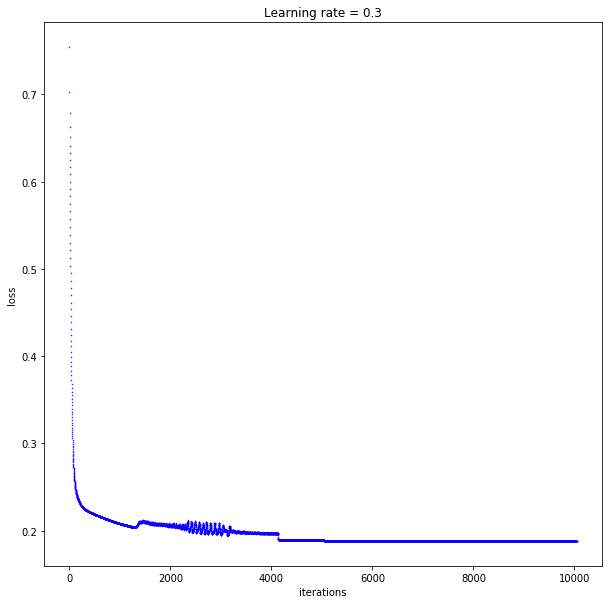

In [9]:
loss = model.history.history['loss']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Learning rate = 0.3')
ax.set_xlabel('iterations')
ax.set_ylabel('loss')
ax.plot(loss, marker='.', color='#0F00FF', markersize=1, linestyle='')

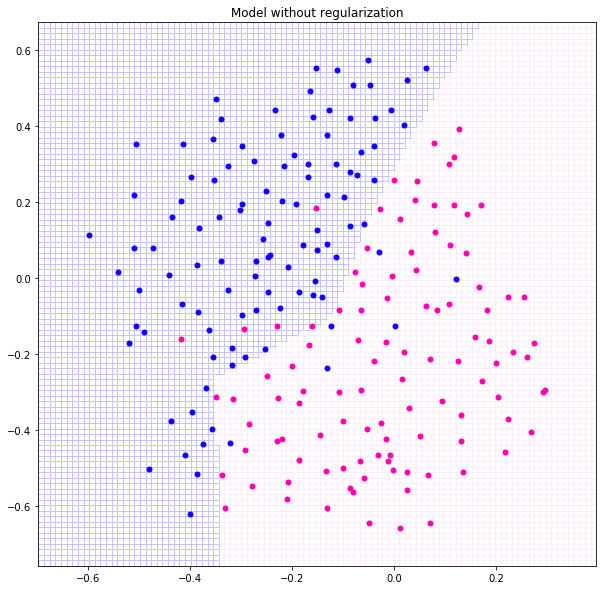

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1])
ax.set_title('Model without regularization') 

u = np.linspace(np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, 100)
v = np.linspace(np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1, 100)
z = []
for i in range(100):
    for j in range(100):
        z.append([u[i], v[j]])
z = np.array(z)
w = (model.predict(z)[:,0]>0.5).astype(int)
model_pos = np.where(w == 1)[0]
model_neg = np.where(w == 0)[0]
ax.plot(z[model_pos,0], z[model_pos,1], marker='+', color='#C7C3FF', markersize=10, linestyle='')
ax.plot(z[model_neg,0], z[model_neg,1], marker='+', color='#FFECFB', markersize=10, linestyle='')

pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='')

-----

In [11]:
model = Model({'dims': [X_train.shape[1], 20, 3, Y_train.shape[1]], 
               'X_train': X_train,
               'Y_train': Y_train,
               'epochs': 30000, 
               'learning_rate': 0.3,
               'batch_size': X_train.shape[0],
               'l1': 0.,
               'l2': 0.0015,
               'dropout_rate': 0.,
               'threshold': 0.5})

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                60        
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 63        
_________________________________________________________________
dropout_3 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
Train on 211 samples
Epoch 1/30000
211/211 [==============================] - 0s 1ms/sample - loss: 0.7747 - binary_accura

Epoch 64/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.3065 - binary_accuracy: 0.9194
Epoch 65/30000
211/211 [==============================] - 0s 76us/sample - loss: 0.3059 - binary_accuracy: 0.9194
Epoch 66/30000
211/211 [==============================] - 0s 53us/sample - loss: 0.3054 - binary_accuracy: 0.9242
Epoch 67/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.3048 - binary_accuracy: 0.9242
Epoch 68/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.3043 - binary_accuracy: 0.9242
Epoch 69/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.3039 - binary_accuracy: 0.9242
Epoch 70/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.3034 - binary_accuracy: 0.9242
Epoch 71/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.3030 - binary_accuracy: 0.9242
Epoch 72/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.3026 -

Epoch 136/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2916 - binary_accuracy: 0.9289
Epoch 137/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2915 - binary_accuracy: 0.9289
Epoch 138/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2914 - binary_accuracy: 0.9289
Epoch 139/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2914 - binary_accuracy: 0.9289
Epoch 140/30000
211/211 [==============================] - 0s 27us/sample - loss: 0.2913 - binary_accuracy: 0.9289
Epoch 141/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2912 - binary_accuracy: 0.9289
Epoch 142/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2911 - binary_accuracy: 0.9289
Epoch 143/30000
211/211 [==============================] - 0s 28us/sample - loss: 0.2910 - binary_accuracy: 0.9289
Epoch 144/30000
211/211 [==============================] - 0s 10us/sample - loss

Epoch 208/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2870 - binary_accuracy: 0.9289
Epoch 209/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2870 - binary_accuracy: 0.9289
Epoch 210/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2869 - binary_accuracy: 0.9289
Epoch 211/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2869 - binary_accuracy: 0.9289
Epoch 212/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2868 - binary_accuracy: 0.9289
Epoch 213/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2868 - binary_accuracy: 0.9289
Epoch 214/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2867 - binary_accuracy: 0.9289
Epoch 215/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2867 - binary_accuracy: 0.9289
Epoch 216/30000
211/211 [==============================] - 0s 17us/sample - loss:

Epoch 280/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2836 - binary_accuracy: 0.9289
Epoch 281/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2835 - binary_accuracy: 0.9289
Epoch 282/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2835 - binary_accuracy: 0.9289
Epoch 283/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2834 - binary_accuracy: 0.9289
Epoch 284/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2834 - binary_accuracy: 0.9289
Epoch 285/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2833 - binary_accuracy: 0.9289
Epoch 286/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2833 - binary_accuracy: 0.9289
Epoch 287/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2832 - binary_accuracy: 0.9289
Epoch 288/30000
211/211 [==============================] - 0s 13us/sample - loss: 

Epoch 352/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2805 - binary_accuracy: 0.9289
Epoch 353/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2805 - binary_accuracy: 0.9289
Epoch 354/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2805 - binary_accuracy: 0.9289
Epoch 355/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2804 - binary_accuracy: 0.9289
Epoch 356/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2804 - binary_accuracy: 0.9289
Epoch 357/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2804 - binary_accuracy: 0.9289
Epoch 358/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2803 - binary_accuracy: 0.9289
Epoch 359/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2803 - binary_accuracy: 0.9289
Epoch 360/30000
211/211 [==============================] - 0s 11us/sample - loss:

Epoch 424/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2781 - binary_accuracy: 0.9289
Epoch 425/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2781 - binary_accuracy: 0.9289
Epoch 426/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2781 - binary_accuracy: 0.9289
Epoch 427/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2780 - binary_accuracy: 0.9289
Epoch 428/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2780 - binary_accuracy: 0.9289
Epoch 429/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2780 - binary_accuracy: 0.9289
Epoch 430/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2779 - binary_accuracy: 0.9289
Epoch 431/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2779 - binary_accuracy: 0.9289
Epoch 432/30000
211/211 [==============================] - 0s 11us/sample - loss:

Epoch 496/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2761 - binary_accuracy: 0.9289
Epoch 497/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2761 - binary_accuracy: 0.9289
Epoch 498/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2760 - binary_accuracy: 0.9289
Epoch 499/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2760 - binary_accuracy: 0.9289
Epoch 500/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2760 - binary_accuracy: 0.9289
Epoch 501/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2760 - binary_accuracy: 0.9289
Epoch 502/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2759 - binary_accuracy: 0.9289
Epoch 503/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2759 - binary_accuracy: 0.9289
Epoch 504/30000
211/211 [==============================] - 0s 16us/sample - loss

Epoch 568/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2743 - binary_accuracy: 0.9289
Epoch 569/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2743 - binary_accuracy: 0.9289
Epoch 570/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2743 - binary_accuracy: 0.9289
Epoch 571/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2743 - binary_accuracy: 0.9289
Epoch 572/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2742 - binary_accuracy: 0.9289
Epoch 573/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2742 - binary_accuracy: 0.9289
Epoch 574/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2742 - binary_accuracy: 0.9289
Epoch 575/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2742 - binary_accuracy: 0.9289
Epoch 576/30000
211/211 [==============================] - 0s 18us/sample - loss:

Epoch 640/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2728 - binary_accuracy: 0.9289
Epoch 641/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2728 - binary_accuracy: 0.9289
Epoch 642/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2728 - binary_accuracy: 0.9289
Epoch 643/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2728 - binary_accuracy: 0.9289
Epoch 644/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2728 - binary_accuracy: 0.9289
Epoch 645/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2727 - binary_accuracy: 0.9289
Epoch 646/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2727 - binary_accuracy: 0.9289
Epoch 647/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2727 - binary_accuracy: 0.9289
Epoch 648/30000
211/211 [==============================] - 0s 10us/sample - loss:

Epoch 712/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2715 - binary_accuracy: 0.9289
Epoch 713/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2715 - binary_accuracy: 0.9289
Epoch 714/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2715 - binary_accuracy: 0.9289
Epoch 715/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2715 - binary_accuracy: 0.9289
Epoch 716/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2715 - binary_accuracy: 0.9289
Epoch 717/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2715 - binary_accuracy: 0.9289
Epoch 718/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2714 - binary_accuracy: 0.9289
Epoch 719/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2714 - binary_accuracy: 0.9289
Epoch 720/30000
211/211 [==============================] - 0s 12us/sample - loss

Epoch 784/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2704 - binary_accuracy: 0.9289
Epoch 785/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2704 - binary_accuracy: 0.9289
Epoch 786/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2704 - binary_accuracy: 0.9289
Epoch 787/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2704 - binary_accuracy: 0.9289
Epoch 788/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2704 - binary_accuracy: 0.9289
Epoch 789/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2703 - binary_accuracy: 0.9289
Epoch 790/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2703 - binary_accuracy: 0.9289
Epoch 791/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2703 - binary_accuracy: 0.9289
Epoch 792/30000
211/211 [==============================] - 0s 13us/sample - loss

Epoch 856/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2695 - binary_accuracy: 0.9289
Epoch 857/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2694 - binary_accuracy: 0.9289
Epoch 858/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2694 - binary_accuracy: 0.9289
Epoch 859/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2694 - binary_accuracy: 0.9289
Epoch 860/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2694 - binary_accuracy: 0.9289
Epoch 861/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2694 - binary_accuracy: 0.9289
Epoch 862/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2694 - binary_accuracy: 0.9289
Epoch 863/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2694 - binary_accuracy: 0.9289
Epoch 864/30000
211/211 [==============================] - 0s 15us/sample - loss:

Epoch 928/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2686 - binary_accuracy: 0.9289
Epoch 929/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2686 - binary_accuracy: 0.9289
Epoch 930/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2686 - binary_accuracy: 0.9289
Epoch 931/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2686 - binary_accuracy: 0.9289
Epoch 932/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2686 - binary_accuracy: 0.9289
Epoch 933/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2686 - binary_accuracy: 0.9289
Epoch 934/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2686 - binary_accuracy: 0.9289
Epoch 935/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2685 - binary_accuracy: 0.9289
Epoch 936/30000
211/211 [==============================] - 0s 18us/sample - loss:

Epoch 1000/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2679 - binary_accuracy: 0.9289
Epoch 1001/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2679 - binary_accuracy: 0.9289
Epoch 1002/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2679 - binary_accuracy: 0.9289
Epoch 1003/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2679 - binary_accuracy: 0.9289
Epoch 1004/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2679 - binary_accuracy: 0.9289
Epoch 1005/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2678 - binary_accuracy: 0.9289
Epoch 1006/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2678 - binary_accuracy: 0.9289
Epoch 1007/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2678 - binary_accuracy: 0.9289
Epoch 1008/30000
211/211 [==============================] - 0s 12us/samp

Epoch 1071/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2673 - binary_accuracy: 0.9336
Epoch 1072/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2673 - binary_accuracy: 0.9289
Epoch 1073/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2673 - binary_accuracy: 0.9336
Epoch 1074/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2672 - binary_accuracy: 0.9289
Epoch 1075/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2672 - binary_accuracy: 0.9336
Epoch 1076/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2672 - binary_accuracy: 0.9289
Epoch 1077/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2672 - binary_accuracy: 0.9336
Epoch 1078/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2672 - binary_accuracy: 0.9289
Epoch 1079/30000
211/211 [==============================] - 0s 13us/samp

Epoch 1142/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2667 - binary_accuracy: 0.9289
Epoch 1143/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2667 - binary_accuracy: 0.9289
Epoch 1144/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2667 - binary_accuracy: 0.9289
Epoch 1145/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2667 - binary_accuracy: 0.9289
Epoch 1146/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2667 - binary_accuracy: 0.9289
Epoch 1147/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2667 - binary_accuracy: 0.9289
Epoch 1148/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2667 - binary_accuracy: 0.9289
Epoch 1149/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2667 - binary_accuracy: 0.9289
Epoch 1150/30000
211/211 [==============================] - 0s 14us/sample

Epoch 1213/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2663 - binary_accuracy: 0.9336
Epoch 1214/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2662 - binary_accuracy: 0.9289
Epoch 1215/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2662 - binary_accuracy: 0.9336
Epoch 1216/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2662 - binary_accuracy: 0.9289
Epoch 1217/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2662 - binary_accuracy: 0.9336
Epoch 1218/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2662 - binary_accuracy: 0.9289
Epoch 1219/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2662 - binary_accuracy: 0.9336
Epoch 1220/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2662 - binary_accuracy: 0.9289
Epoch 1221/30000
211/211 [==============================] - 0s 11us/samp

Epoch 1284/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2658 - binary_accuracy: 0.9289
Epoch 1285/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2658 - binary_accuracy: 0.9336
Epoch 1286/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2658 - binary_accuracy: 0.9289
Epoch 1287/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2658 - binary_accuracy: 0.9336
Epoch 1288/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2658 - binary_accuracy: 0.9289
Epoch 1289/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2658 - binary_accuracy: 0.9336
Epoch 1290/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2658 - binary_accuracy: 0.9289
Epoch 1291/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2658 - binary_accuracy: 0.9336
Epoch 1292/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 1355/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2655 - binary_accuracy: 0.9336
Epoch 1356/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2655 - binary_accuracy: 0.9289
Epoch 1357/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2655 - binary_accuracy: 0.9336
Epoch 1358/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2655 - binary_accuracy: 0.9289
Epoch 1359/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2655 - binary_accuracy: 0.9336
Epoch 1360/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2655 - binary_accuracy: 0.9289
Epoch 1361/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2655 - binary_accuracy: 0.9336
Epoch 1362/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2655 - binary_accuracy: 0.9289
Epoch 1363/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 1426/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2652 - binary_accuracy: 0.9289
Epoch 1427/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2652 - binary_accuracy: 0.9289
Epoch 1428/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2652 - binary_accuracy: 0.9289
Epoch 1429/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2652 - binary_accuracy: 0.9289
Epoch 1430/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2651 - binary_accuracy: 0.9289
Epoch 1431/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2651 - binary_accuracy: 0.9289
Epoch 1432/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2651 - binary_accuracy: 0.9289
Epoch 1433/30000
211/211 [==============================] - 0s 37us/sample - loss: 0.2651 - binary_accuracy: 0.9289
Epoch 1434/30000
211/211 [==============================] - 0s 21us/samp

Epoch 1497/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2649 - binary_accuracy: 0.9289
Epoch 1498/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2649 - binary_accuracy: 0.9289
Epoch 1499/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2649 - binary_accuracy: 0.9289
Epoch 1500/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2649 - binary_accuracy: 0.9289
Epoch 1501/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2648 - binary_accuracy: 0.9289
Epoch 1502/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2648 - binary_accuracy: 0.9289
Epoch 1503/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2648 - binary_accuracy: 0.9289
Epoch 1504/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2648 - binary_accuracy: 0.9289
Epoch 1505/30000
211/211 [==============================] - 0s 18us/samp

Epoch 1568/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2646 - binary_accuracy: 0.9289
Epoch 1569/30000
211/211 [==============================] - 0s 39us/sample - loss: 0.2646 - binary_accuracy: 0.9289
Epoch 1570/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2646 - binary_accuracy: 0.9289
Epoch 1571/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2646 - binary_accuracy: 0.9289
Epoch 1572/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2646 - binary_accuracy: 0.9289
Epoch 1573/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2646 - binary_accuracy: 0.9289
Epoch 1574/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2646 - binary_accuracy: 0.9289
Epoch 1575/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2646 - binary_accuracy: 0.9289
Epoch 1576/30000
211/211 [==============================] - 0s 10us/samp

Epoch 1639/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2644 - binary_accuracy: 0.9289
Epoch 1640/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2644 - binary_accuracy: 0.9289
Epoch 1641/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2644 - binary_accuracy: 0.9289
Epoch 1642/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.2644 - binary_accuracy: 0.9289
Epoch 1643/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2644 - binary_accuracy: 0.9289
Epoch 1644/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2644 - binary_accuracy: 0.9289
Epoch 1645/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2644 - binary_accuracy: 0.9289
Epoch 1646/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2644 - binary_accuracy: 0.9289
Epoch 1647/30000
211/211 [==============================] - 0s 11us/samp

Epoch 1710/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2645 - binary_accuracy: 0.9289
Epoch 1711/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2645 - binary_accuracy: 0.9289
Epoch 1712/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2645 - binary_accuracy: 0.9289
Epoch 1713/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2645 - binary_accuracy: 0.9289
Epoch 1714/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2645 - binary_accuracy: 0.9289
Epoch 1715/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2646 - binary_accuracy: 0.9289
Epoch 1716/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2646 - binary_accuracy: 0.9289
Epoch 1717/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2646 - binary_accuracy: 0.9289
Epoch 1718/30000
211/211 [==============================] - 0s 10us/sampl

Epoch 1781/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2647 - binary_accuracy: 0.9289
Epoch 1782/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2647 - binary_accuracy: 0.9289
Epoch 1783/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2647 - binary_accuracy: 0.9289
Epoch 1784/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2647 - binary_accuracy: 0.9289
Epoch 1785/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2647 - binary_accuracy: 0.9289
Epoch 1786/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2647 - binary_accuracy: 0.9289
Epoch 1787/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2648 - binary_accuracy: 0.9289
Epoch 1788/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2647 - binary_accuracy: 0.9289
Epoch 1789/30000
211/211 [==============================] - 0s 12us/samp

Epoch 1852/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2642 - binary_accuracy: 0.9289
Epoch 1853/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2642 - binary_accuracy: 0.9289
Epoch 1854/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2642 - binary_accuracy: 0.9289
Epoch 1855/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2642 - binary_accuracy: 0.9289
Epoch 1856/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2642 - binary_accuracy: 0.9289
Epoch 1857/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2643 - binary_accuracy: 0.9289
Epoch 1858/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2643 - binary_accuracy: 0.9289
Epoch 1859/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2643 - binary_accuracy: 0.9289
Epoch 1860/30000
211/211 [==============================] - 0s 13us/samp

Epoch 1923/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2649 - binary_accuracy: 0.9336
Epoch 1924/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2650 - binary_accuracy: 0.9289
Epoch 1925/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.2650 - binary_accuracy: 0.9336
Epoch 1926/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2650 - binary_accuracy: 0.9289
Epoch 1927/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2650 - binary_accuracy: 0.9336
Epoch 1928/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2650 - binary_accuracy: 0.9289
Epoch 1929/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2650 - binary_accuracy: 0.9336
Epoch 1930/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2651 - binary_accuracy: 0.9289
Epoch 1931/30000
211/211 [==============================] - 0s 9us/sampl

Epoch 1994/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2650 - binary_accuracy: 0.9289
Epoch 1995/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2650 - binary_accuracy: 0.9336
Epoch 1996/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2650 - binary_accuracy: 0.9289
Epoch 1997/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2650 - binary_accuracy: 0.9336
Epoch 1998/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2650 - binary_accuracy: 0.9289
Epoch 1999/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2650 - binary_accuracy: 0.9336
Epoch 2000/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2650 - binary_accuracy: 0.9289
Epoch 2001/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2650 - binary_accuracy: 0.9336
Epoch 2002/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 2065/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2646 - binary_accuracy: 0.9336
Epoch 2066/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2646 - binary_accuracy: 0.9289
Epoch 2067/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2646 - binary_accuracy: 0.9336
Epoch 2068/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2646 - binary_accuracy: 0.9289
Epoch 2069/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2646 - binary_accuracy: 0.9336
Epoch 2070/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2646 - binary_accuracy: 0.9289
Epoch 2071/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2646 - binary_accuracy: 0.9336
Epoch 2072/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2646 - binary_accuracy: 0.9289
Epoch 2073/30000
211/211 [==============================] - 0s 11us/sample

Epoch 2136/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2645 - binary_accuracy: 0.9289
Epoch 2137/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2645 - binary_accuracy: 0.9336
Epoch 2138/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2645 - binary_accuracy: 0.9289
Epoch 2139/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2645 - binary_accuracy: 0.9336
Epoch 2140/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2644 - binary_accuracy: 0.9289
Epoch 2141/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2644 - binary_accuracy: 0.9336
Epoch 2142/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2645 - binary_accuracy: 0.9289
Epoch 2143/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2645 - binary_accuracy: 0.9336
Epoch 2144/30000
211/211 [==============================] - 0s 14us/samp

Epoch 2207/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2642 - binary_accuracy: 0.9289
Epoch 2208/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2642 - binary_accuracy: 0.9289
Epoch 2209/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2642 - binary_accuracy: 0.9289
Epoch 2210/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2642 - binary_accuracy: 0.9289
Epoch 2211/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2641 - binary_accuracy: 0.9289
Epoch 2212/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2641 - binary_accuracy: 0.9289
Epoch 2213/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2641 - binary_accuracy: 0.9289
Epoch 2214/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2641 - binary_accuracy: 0.9289
Epoch 2215/30000
211/211 [==============================] - 0s 15us/sampl

Epoch 2278/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2642 - binary_accuracy: 0.9289
Epoch 2279/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2643 - binary_accuracy: 0.9336
Epoch 2280/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2642 - binary_accuracy: 0.9289
Epoch 2281/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2642 - binary_accuracy: 0.9336
Epoch 2282/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2642 - binary_accuracy: 0.9289
Epoch 2283/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2642 - binary_accuracy: 0.9336
Epoch 2284/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2642 - binary_accuracy: 0.9289
Epoch 2285/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2643 - binary_accuracy: 0.9336
Epoch 2286/30000
211/211 [==============================] - 0s 18us/samp

Epoch 2349/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2640 - binary_accuracy: 0.9289
Epoch 2350/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2639 - binary_accuracy: 0.9289
Epoch 2351/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2640 - binary_accuracy: 0.9289
Epoch 2352/30000
211/211 [==============================] - 0s 40us/sample - loss: 0.2639 - binary_accuracy: 0.9289
Epoch 2353/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2640 - binary_accuracy: 0.9289
Epoch 2354/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2639 - binary_accuracy: 0.9289
Epoch 2355/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2640 - binary_accuracy: 0.9289
Epoch 2356/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2640 - binary_accuracy: 0.9289
Epoch 2357/30000
211/211 [==============================] - 0s 14us/samp

Epoch 2420/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2641 - binary_accuracy: 0.9289
Epoch 2421/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2641 - binary_accuracy: 0.9336
Epoch 2422/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2641 - binary_accuracy: 0.9289
Epoch 2423/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2641 - binary_accuracy: 0.9336
Epoch 2424/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2641 - binary_accuracy: 0.9289
Epoch 2425/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2641 - binary_accuracy: 0.9336
Epoch 2426/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2642 - binary_accuracy: 0.9289
Epoch 2427/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2642 - binary_accuracy: 0.9336
Epoch 2428/30000
211/211 [==============================] - 0s 16us/samp

Epoch 2491/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2640 - binary_accuracy: 0.9336
Epoch 2492/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2640 - binary_accuracy: 0.9289
Epoch 2493/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2640 - binary_accuracy: 0.9336
Epoch 2494/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2639 - binary_accuracy: 0.9289
Epoch 2495/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2640 - binary_accuracy: 0.9336
Epoch 2496/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2640 - binary_accuracy: 0.9289
Epoch 2497/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2640 - binary_accuracy: 0.9336
Epoch 2498/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2640 - binary_accuracy: 0.9289
Epoch 2499/30000
211/211 [==============================] - 0s 15us/samp

Epoch 2562/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2638 - binary_accuracy: 0.9289
Epoch 2563/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2632 - binary_accuracy: 0.9336
Epoch 2564/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2629 - binary_accuracy: 0.9336
Epoch 2565/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2626 - binary_accuracy: 0.9289
Epoch 2566/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2625 - binary_accuracy: 0.9289
Epoch 2567/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2624 - binary_accuracy: 0.9289
Epoch 2568/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2624 - binary_accuracy: 0.9289
Epoch 2569/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2623 - binary_accuracy: 0.9289
Epoch 2570/30000
211/211 [==============================] - 0s 15us/samp

Epoch 2633/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2634/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2635/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2636/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2637/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2638/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2639/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2640/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2641/30000
211/211 [==============================] - 0s 17us/samp

Epoch 2704/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2705/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2706/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2707/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2708/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2709/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2710/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2711/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2712/30000
211/211 [==============================] - 0s 9us/sample

Epoch 2775/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2776/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2777/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2778/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2779/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2780/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2781/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2782/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2783/30000
211/211 [==============================] - 0s 11us/sample -

Epoch 2846/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2847/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2848/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2849/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2850/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2851/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2852/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2853/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2854/30000
211/211 [==============================] - 0s 11us/sample

Epoch 2917/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2918/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2919/30000
211/211 [==============================] - 0s 34us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2920/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2921/30000
211/211 [==============================] - 0s 27us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2922/30000
211/211 [==============================] - 0s 32us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2923/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2924/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2622 - binary_accuracy: 0.9289
Epoch 2925/30000
211/211 [==============================] - 0s 10us/samp

Epoch 2988/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 2989/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 2990/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 2991/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 2992/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 2993/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 2994/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 2995/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 2996/30000
211/211 [==============================] - 0s 16us/samp

Epoch 3059/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3060/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3061/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3062/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3063/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3064/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3065/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3066/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3067/30000
211/211 [==============================] - 0s 16us/samp

Epoch 3130/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3131/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3132/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3133/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3134/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3135/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3136/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3137/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3138/30000
211/211 [==============================] - 0s 10us/samp

Epoch 3201/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3202/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3203/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3204/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3205/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3206/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3207/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3208/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3209/30000
211/211 [==============================] - 0s 24us/samp

Epoch 3272/30000
211/211 [==============================] - 0s 29us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3273/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3274/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3275/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3276/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3277/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3278/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3279/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3280/30000
211/211 [==============================] - 0s 14us/samp

Epoch 3343/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3344/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3345/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3346/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3347/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3348/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3349/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3350/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3351/30000
211/211 [==============================] - 0s 10us/sampl

Epoch 3414/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3415/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3416/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3417/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3418/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3419/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3420/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3421/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3422/30000
211/211 [==============================] - 0s 9us/sample 

Epoch 3485/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3486/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3487/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3488/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3489/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3490/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3491/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3492/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3493/30000
211/211 [==============================] - 0s 15us/samp

Epoch 3556/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3557/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3558/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3559/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3560/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3561/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3562/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3563/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3564/30000
211/211 [==============================] - 0s 12us/samp

Epoch 3627/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3628/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3629/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3630/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3631/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3632/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3633/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3634/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3635/30000
211/211 [==============================] - 0s 12us/samp

Epoch 3698/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3699/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3700/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3701/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3702/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3703/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3704/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3705/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3706/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 3769/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3770/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3771/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3772/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3773/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3774/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3775/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3776/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3777/30000
211/211 [==============================] - 0s 14us/sample 

Epoch 3840/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3841/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3842/30000
211/211 [==============================] - 0s 34us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3843/30000
211/211 [==============================] - 0s 39us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3844/30000
211/211 [==============================] - 0s 34us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3845/30000
211/211 [==============================] - 0s 26us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3846/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3847/30000
211/211 [==============================] - 0s 40us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3848/30000
211/211 [==============================] - 0s 31us/samp

Epoch 3911/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3912/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3913/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3914/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3915/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3916/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3917/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3918/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3919/30000
211/211 [==============================] - 0s 10us/sample

Epoch 3982/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3983/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3984/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3985/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3986/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3987/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3988/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3989/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 3990/30000
211/211 [==============================] - 0s 9us/sample

Epoch 4053/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 4054/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 4055/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 4056/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 4057/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 4058/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 4059/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 4060/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2621 - binary_accuracy: 0.9289
Epoch 4061/30000
211/211 [==============================] - 0s 17us/samp

Epoch 4124/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4125/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4126/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4127/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4128/30000
211/211 [==============================] - 0s 30us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4129/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4130/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4131/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4132/30000
211/211 [==============================] - 0s 22us/samp

Epoch 4195/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4196/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4197/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4198/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4199/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4200/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4201/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4202/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4203/30000
211/211 [==============================] - 0s 18us/sampl

Epoch 4266/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4267/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4268/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4269/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4270/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4271/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4272/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4273/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4274/30000
211/211 [==============================] - 0s 11us/samp

Epoch 4337/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4338/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4339/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4340/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4341/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4342/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4343/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4344/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4345/30000
211/211 [==============================] - 0s 16us/sampl

Epoch 4408/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4409/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4410/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4411/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4412/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4413/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4414/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4415/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4416/30000
211/211 [==============================] - 0s 12us/samp

Epoch 4479/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4480/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4481/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4482/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4483/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4484/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4485/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4486/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4487/30000
211/211 [==============================] - 0s 11us/samp

Epoch 4550/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4551/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4552/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4553/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4554/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4555/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4556/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4557/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4558/30000
211/211 [==============================] - 0s 19us/samp

Epoch 4621/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4622/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4623/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4624/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4625/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4626/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4627/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4628/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4629/30000
211/211 [==============================] - 0s 11us/samp

Epoch 4692/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4693/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4694/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4695/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4696/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4697/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4698/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4699/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4700/30000
211/211 [==============================] - 0s 11us/samp

Epoch 4763/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4764/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4765/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4766/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4767/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4768/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4769/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4770/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4771/30000
211/211 [==============================] - 0s 13us/samp

Epoch 4834/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4835/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4836/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4837/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4838/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4839/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4840/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4841/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4842/30000
211/211 [==============================] - 0s 16us/samp

Epoch 4905/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4906/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4907/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4908/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4909/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4910/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4911/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4912/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4913/30000
211/211 [==============================] - 0s 14us/sampl

Epoch 4976/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4977/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4978/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4979/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4980/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4981/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4982/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4983/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 4984/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 5047/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5048/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5049/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5050/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5051/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5052/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5053/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5054/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5055/30000
211/211 [==============================] - 0s 11us/samp

Epoch 5118/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5119/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5120/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5121/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5122/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5123/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5124/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5125/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5126/30000
211/211 [==============================] - 0s 14us/samp

Epoch 5189/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5190/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5191/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5192/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5193/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5194/30000
211/211 [==============================] - 0s 26us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5195/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5196/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5197/30000
211/211 [==============================] - 0s 17us/samp

Epoch 5260/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5261/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5262/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5263/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5264/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5265/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5266/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5267/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5268/30000
211/211 [==============================] - 0s 8us/sampl

Epoch 5331/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5332/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5333/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5334/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5335/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5336/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5337/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5338/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5339/30000
211/211 [==============================] - 0s 11us/sample 

Epoch 5402/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5403/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5404/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5405/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5406/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5407/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5408/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5409/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5410/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 5473/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5474/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5475/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5476/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5477/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5478/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5479/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5480/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5481/30000
211/211 [==============================] - 0s 16us/samp

Epoch 5544/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5545/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5546/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5547/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5548/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5549/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5550/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5551/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5552/30000
211/211 [==============================] - 0s 10us/sampl

Epoch 5615/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5616/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5617/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5618/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5619/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5620/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5621/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5622/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5623/30000
211/211 [==============================] - 0s 15us/sampl

Epoch 5686/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5687/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5688/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5689/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5690/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5691/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5692/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5693/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5694/30000
211/211 [==============================] - 0s 12us/samp

Epoch 5757/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5758/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5759/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5760/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5761/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5762/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5763/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5764/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5765/30000
211/211 [==============================] - 0s 9us/sample

Epoch 5828/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5829/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5830/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5831/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5832/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5833/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5834/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5835/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5836/30000
211/211 [==============================] - 0s 13us/sampl

Epoch 5899/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5900/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5901/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5902/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5903/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5904/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5905/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5906/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5907/30000
211/211 [==============================] - 0s 10us/sampl

Epoch 5970/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5971/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5972/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5973/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5974/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5975/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5976/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5977/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 5978/30000
211/211 [==============================] - 0s 12us/samp

Epoch 6041/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6042/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6043/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6044/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6045/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6046/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6047/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6048/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6049/30000
211/211 [==============================] - 0s 13us/samp

Epoch 6112/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6113/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6114/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6115/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6116/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6117/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6118/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6119/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6120/30000
211/211 [==============================] - 0s 11us/samp

Epoch 6183/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6184/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6185/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6186/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6187/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6188/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6189/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6190/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6191/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 6254/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6255/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6256/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6257/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6258/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6259/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6260/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6261/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6262/30000
211/211 [==============================] - 0s 10us/sample

Epoch 6325/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6326/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6327/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6328/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6329/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6330/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6331/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6332/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6333/30000
211/211 [==============================] - 0s 12us/samp

Epoch 6396/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6397/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6398/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6399/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6400/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6401/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6402/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6403/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6404/30000
211/211 [==============================] - 0s 10us/sampl

Epoch 6467/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6468/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6469/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6470/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6471/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6472/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6473/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6474/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6475/30000
211/211 [==============================] - 0s 11us/samp

Epoch 6538/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6539/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6540/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6541/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6542/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6543/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6544/30000
211/211 [==============================] - 0s 33us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6545/30000
211/211 [==============================] - 0s 26us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6546/30000
211/211 [==============================] - 0s 29us/samp

Epoch 6609/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6610/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6611/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6612/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6613/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6614/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6615/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6616/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6617/30000
211/211 [==============================] - 0s 16us/samp

Epoch 6680/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6681/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6682/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6683/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6684/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6685/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6686/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6687/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6688/30000
211/211 [==============================] - 0s 15us/samp

Epoch 6751/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6752/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6753/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6754/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6755/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6756/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6757/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6758/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6759/30000
211/211 [==============================] - 0s 10us/samp

Epoch 6822/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6823/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6824/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6825/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6826/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6827/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6828/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6829/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6830/30000
211/211 [==============================] - 0s 13us/sampl

Epoch 6893/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6894/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6895/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6896/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6897/30000
211/211 [==============================] - 0s 31us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6898/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6899/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6900/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6901/30000
211/211 [==============================] - 0s 13us/samp

Epoch 6964/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6965/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6966/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6967/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6968/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6969/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6970/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6971/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 6972/30000
211/211 [==============================] - 0s 16us/samp

Epoch 7035/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7036/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7037/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7038/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7039/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7040/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7041/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7042/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7043/30000
211/211 [==============================] - 0s 11us/samp

Epoch 7106/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7107/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7108/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7109/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7110/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7111/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7112/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7113/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7114/30000
211/211 [==============================] - 0s 13us/samp

Epoch 7177/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7178/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7179/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7180/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7181/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7182/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7183/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7184/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7185/30000
211/211 [==============================] - 0s 12us/samp

Epoch 7248/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7249/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7250/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7251/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7252/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7253/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7254/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7255/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7256/30000
211/211 [==============================] - 0s 21us/samp

Epoch 7319/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7320/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7321/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7322/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7323/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7324/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7325/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7326/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7327/30000
211/211 [==============================] - 0s 11us/samp

Epoch 7390/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7391/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7392/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7393/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7394/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7395/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7396/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7397/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7398/30000
211/211 [==============================] - 0s 16us/samp

Epoch 7461/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7462/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7463/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7464/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7465/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7466/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7467/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7468/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7469/30000
211/211 [==============================] - 0s 21us/samp

Epoch 7532/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7533/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7534/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7535/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7536/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7537/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7538/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7539/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2620 - binary_accuracy: 0.9289
Epoch 7540/30000
211/211 [==============================] - 0s 15us/samp

In [12]:
model.evaluate(X_train, Y_train)

211/211 [==============================] - 0s 437us/sample - loss: 0.2620 - binary_accuracy: 0.9289


[0.26204119700391143, 0.92890996]

In [13]:
model.evaluate(X_test, Y_test)

200/200 [==============================] - 0s 68us/sample - loss: 0.2943 - binary_accuracy: 0.9350


[0.2943194699287415, 0.935]

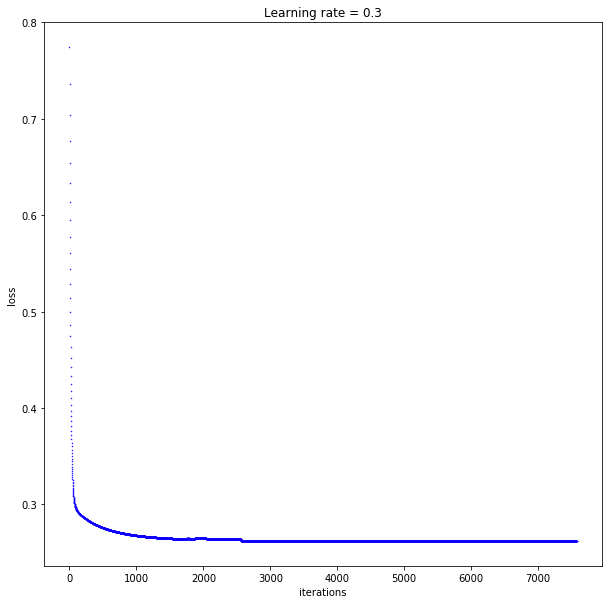

In [14]:
loss = model.history.history['loss']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Learning rate = 0.3')
ax.set_xlabel('iterations')
ax.set_ylabel('loss')
ax.plot(loss, marker='.', color='#0F00FF', markersize=1, linestyle='')

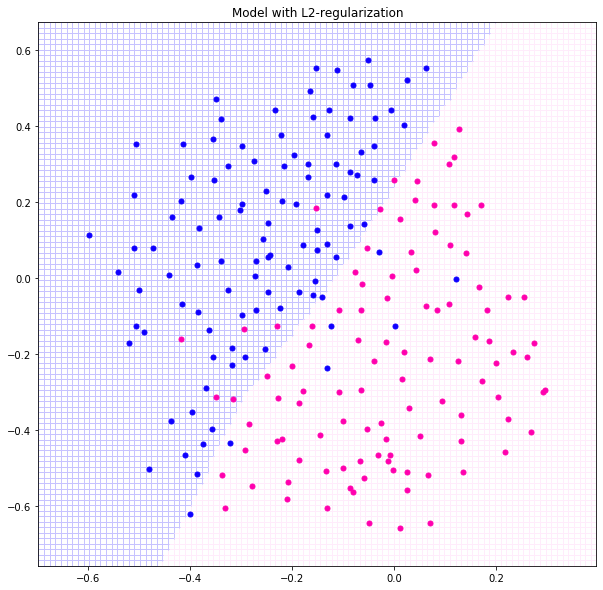

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1])
ax.set_title('Model with L2-regularization') 

u = np.linspace(np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, 100)
v = np.linspace(np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1, 100)
z = []
for i in range(100):
    for j in range(100):
        z.append([u[i], v[j]])
z = np.array(z)
w = (model.predict(z)[:,0]>0.5).astype(int)
model_pos = np.where(w == 1)[0]
model_neg = np.where(w == 0)[0]
ax.plot(z[model_pos,0], z[model_pos,1], marker='+', color='#C7C3FF', markersize=10, linestyle='')
ax.plot(z[model_neg,0], z[model_neg,1], marker='+', color='#FFECFB', markersize=10, linestyle='')

pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='')

-----

In [16]:
model = Model({'dims': [X_train.shape[1], 20, 3, Y_train.shape[1]], 
               'X_train': X_train,
               'Y_train': Y_train,
               'epochs': 30000, 
               'learning_rate': 0.3,
               'batch_size': X_train.shape[0],
               'l1': 0.,
               'l2': 0.,
               'dropout_rate': 0.15,
               'threshold': 0.5})

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                60        
_________________________________________________________________
dropout_4 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 63        
_________________________________________________________________
dropout_5 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 4         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
Train on 211 samples
Epoch 1/30000
211/211 [==============================] - 0s 1ms/sample - loss: 0.6854 - binary_accura

Epoch 64/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.4507 - binary_accuracy: 0.8057
Epoch 65/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.4135 - binary_accuracy: 0.8483
Epoch 66/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.4583 - binary_accuracy: 0.7962
Epoch 67/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.4479 - binary_accuracy: 0.8009
Epoch 68/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.4091 - binary_accuracy: 0.8483
Epoch 69/30000
211/211 [==============================] - 0s 32us/sample - loss: 0.4373 - binary_accuracy: 0.8152
Epoch 70/30000
211/211 [==============================] - 0s 28us/sample - loss: 0.4410 - binary_accuracy: 0.8057
Epoch 71/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.3999 - binary_accuracy: 0.8389
Epoch 72/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.4314 

Epoch 136/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.3215 - binary_accuracy: 0.8720
Epoch 137/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.3248 - binary_accuracy: 0.8815
Epoch 138/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.3158 - binary_accuracy: 0.8673
Epoch 139/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.3096 - binary_accuracy: 0.8910
Epoch 140/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.3222 - binary_accuracy: 0.8768
Epoch 141/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.3352 - binary_accuracy: 0.8910
Epoch 142/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.3354 - binary_accuracy: 0.8483
Epoch 143/30000
211/211 [==============================] - 0s 30us/sample - loss: 0.3460 - binary_accuracy: 0.8673
Epoch 144/30000
211/211 [==============================] - 0s 17us/sample - loss

Epoch 208/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.3289 - binary_accuracy: 0.8910
Epoch 209/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2936 - binary_accuracy: 0.8910
Epoch 210/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2906 - binary_accuracy: 0.9005
Epoch 211/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2888 - binary_accuracy: 0.8910
Epoch 212/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.3243 - binary_accuracy: 0.8957
Epoch 213/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2543 - binary_accuracy: 0.9194
Epoch 214/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2805 - binary_accuracy: 0.8957
Epoch 215/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2774 - binary_accuracy: 0.9100
Epoch 216/30000
211/211 [==============================] - 0s 11us/sample - loss

Epoch 280/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2477 - binary_accuracy: 0.9147
Epoch 281/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2579 - binary_accuracy: 0.9100
Epoch 282/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2897 - binary_accuracy: 0.8910
Epoch 283/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2726 - binary_accuracy: 0.9147
Epoch 284/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2698 - binary_accuracy: 0.9100
Epoch 285/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2858 - binary_accuracy: 0.9100
Epoch 286/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.3076 - binary_accuracy: 0.8910
Epoch 287/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2812 - binary_accuracy: 0.9052
Epoch 288/30000
211/211 [==============================] - 0s 15us/sample - loss:

Epoch 352/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2693 - binary_accuracy: 0.9194
Epoch 353/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2638 - binary_accuracy: 0.9194
Epoch 354/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2835 - binary_accuracy: 0.9005
Epoch 355/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.2537 - binary_accuracy: 0.8910
Epoch 356/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2622 - binary_accuracy: 0.9147
Epoch 357/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2986 - binary_accuracy: 0.9005
Epoch 358/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2562 - binary_accuracy: 0.9147
Epoch 359/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2972 - binary_accuracy: 0.8910
Epoch 360/30000
211/211 [==============================] - 0s 12us/sample - loss

Epoch 424/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2670 - binary_accuracy: 0.8910
Epoch 425/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2593 - binary_accuracy: 0.8815
Epoch 426/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2383 - binary_accuracy: 0.9336
Epoch 427/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2758 - binary_accuracy: 0.9005
Epoch 428/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2889 - binary_accuracy: 0.9052
Epoch 429/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.3134 - binary_accuracy: 0.8957
Epoch 430/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2986 - binary_accuracy: 0.8957
Epoch 431/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2883 - binary_accuracy: 0.9005
Epoch 432/30000
211/211 [==============================] - 0s 12us/sample - loss

Epoch 496/30000
211/211 [==============================] - 0s 38us/sample - loss: 0.2565 - binary_accuracy: 0.9289
Epoch 497/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2360 - binary_accuracy: 0.9147
Epoch 498/30000
211/211 [==============================] - 0s 30us/sample - loss: 0.2689 - binary_accuracy: 0.9052
Epoch 499/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2722 - binary_accuracy: 0.9100
Epoch 500/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2827 - binary_accuracy: 0.9005
Epoch 501/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.3225 - binary_accuracy: 0.8720
Epoch 502/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2915 - binary_accuracy: 0.8768
Epoch 503/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2504 - binary_accuracy: 0.9194
Epoch 504/30000
211/211 [==============================] - 0s 17us/sample - loss

Epoch 568/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2470 - binary_accuracy: 0.9005
Epoch 569/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2805 - binary_accuracy: 0.8957
Epoch 570/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2766 - binary_accuracy: 0.8815
Epoch 571/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2688 - binary_accuracy: 0.9052
Epoch 572/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2612 - binary_accuracy: 0.8957
Epoch 573/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2479 - binary_accuracy: 0.9052
Epoch 574/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2568 - binary_accuracy: 0.8863
Epoch 575/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2460 - binary_accuracy: 0.9242
Epoch 576/30000
211/211 [==============================] - 0s 16us/sample - loss

Epoch 640/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2791 - binary_accuracy: 0.9005
Epoch 641/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2808 - binary_accuracy: 0.9005
Epoch 642/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2696 - binary_accuracy: 0.9147
Epoch 643/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2654 - binary_accuracy: 0.9052
Epoch 644/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2361 - binary_accuracy: 0.9100
Epoch 645/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2441 - binary_accuracy: 0.9147
Epoch 646/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2519 - binary_accuracy: 0.9242
Epoch 647/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2643 - binary_accuracy: 0.9147
Epoch 648/30000
211/211 [==============================] - 0s 13us/sample - loss

Epoch 712/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2763 - binary_accuracy: 0.8815
Epoch 713/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2363 - binary_accuracy: 0.9289
Epoch 714/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2834 - binary_accuracy: 0.9005
Epoch 715/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2419 - binary_accuracy: 0.9052
Epoch 716/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2928 - binary_accuracy: 0.8863
Epoch 717/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2588 - binary_accuracy: 0.9147
Epoch 718/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2750 - binary_accuracy: 0.9100
Epoch 719/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2402 - binary_accuracy: 0.9336
Epoch 720/30000
211/211 [==============================] - 0s 10us/sample - loss:

Epoch 784/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2538 - binary_accuracy: 0.9052
Epoch 785/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2639 - binary_accuracy: 0.9052
Epoch 786/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2822 - binary_accuracy: 0.8863
Epoch 787/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2812 - binary_accuracy: 0.9147
Epoch 788/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2810 - binary_accuracy: 0.9005
Epoch 789/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2849 - binary_accuracy: 0.9052
Epoch 790/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.3012 - binary_accuracy: 0.8910
Epoch 791/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2642 - binary_accuracy: 0.9147
Epoch 792/30000
211/211 [==============================] - 0s 11us/sample - loss:

Epoch 856/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2544 - binary_accuracy: 0.9147
Epoch 857/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2594 - binary_accuracy: 0.9005
Epoch 858/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2689 - binary_accuracy: 0.9147
Epoch 859/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2883 - binary_accuracy: 0.9005
Epoch 860/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2478 - binary_accuracy: 0.9052
Epoch 861/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2520 - binary_accuracy: 0.9336
Epoch 862/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2423 - binary_accuracy: 0.9052
Epoch 863/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2418 - binary_accuracy: 0.9100
Epoch 864/30000
211/211 [==============================] - 0s 9us/sample - loss: 0

Epoch 928/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2381 - binary_accuracy: 0.9194
Epoch 929/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2706 - binary_accuracy: 0.9147
Epoch 930/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2752 - binary_accuracy: 0.9005
Epoch 931/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2762 - binary_accuracy: 0.9194
Epoch 932/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2410 - binary_accuracy: 0.9052
Epoch 933/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2707 - binary_accuracy: 0.8957
Epoch 934/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2643 - binary_accuracy: 0.9100
Epoch 935/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2782 - binary_accuracy: 0.9100
Epoch 936/30000
211/211 [==============================] - 0s 11us/sample - loss: 

Epoch 1000/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2672 - binary_accuracy: 0.8910
Epoch 1001/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2614 - binary_accuracy: 0.9100
Epoch 1002/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2874 - binary_accuracy: 0.9052
Epoch 1003/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2454 - binary_accuracy: 0.9147
Epoch 1004/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2116 - binary_accuracy: 0.9242
Epoch 1005/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2317 - binary_accuracy: 0.9242
Epoch 1006/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2966 - binary_accuracy: 0.8957
Epoch 1007/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2632 - binary_accuracy: 0.9147
Epoch 1008/30000
211/211 [==============================] - 0s 11us/sample

Epoch 1071/30000
211/211 [==============================] - 0s 67us/sample - loss: 0.2419 - binary_accuracy: 0.9100
Epoch 1072/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2636 - binary_accuracy: 0.9052
Epoch 1073/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2195 - binary_accuracy: 0.9289
Epoch 1074/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2856 - binary_accuracy: 0.8910
Epoch 1075/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2543 - binary_accuracy: 0.9147
Epoch 1076/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2621 - binary_accuracy: 0.9100
Epoch 1077/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2609 - binary_accuracy: 0.9147
Epoch 1078/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2512 - binary_accuracy: 0.9005
Epoch 1079/30000
211/211 [==============================] - 0s 9us/sample 

Epoch 1142/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2769 - binary_accuracy: 0.9100
Epoch 1143/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2526 - binary_accuracy: 0.9147
Epoch 1144/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2388 - binary_accuracy: 0.9194
Epoch 1145/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2308 - binary_accuracy: 0.9052
Epoch 1146/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2446 - binary_accuracy: 0.9289
Epoch 1147/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2404 - binary_accuracy: 0.9336
Epoch 1148/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2573 - binary_accuracy: 0.9100
Epoch 1149/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2661 - binary_accuracy: 0.9052
Epoch 1150/30000
211/211 [==============================] - 0s 10us/sampl

Epoch 1213/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2752 - binary_accuracy: 0.9194
Epoch 1214/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2533 - binary_accuracy: 0.9100
Epoch 1215/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2648 - binary_accuracy: 0.8768
Epoch 1216/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2703 - binary_accuracy: 0.9147
Epoch 1217/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2748 - binary_accuracy: 0.8957
Epoch 1218/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2525 - binary_accuracy: 0.9289
Epoch 1219/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2678 - binary_accuracy: 0.9052
Epoch 1220/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2378 - binary_accuracy: 0.9194
Epoch 1221/30000
211/211 [==============================] - 0s 10us/samp

Epoch 1284/30000
211/211 [==============================] - 0s 28us/sample - loss: 0.2780 - binary_accuracy: 0.9052
Epoch 1285/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2474 - binary_accuracy: 0.9052
Epoch 1286/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2394 - binary_accuracy: 0.9336
Epoch 1287/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2481 - binary_accuracy: 0.9289
Epoch 1288/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2523 - binary_accuracy: 0.9005
Epoch 1289/30000
211/211 [==============================] - 0s 35us/sample - loss: 0.2509 - binary_accuracy: 0.9289
Epoch 1290/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2579 - binary_accuracy: 0.9242
Epoch 1291/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2486 - binary_accuracy: 0.9100
Epoch 1292/30000
211/211 [==============================] - 0s 16us/samp

Epoch 1355/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2913 - binary_accuracy: 0.9052
Epoch 1356/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2391 - binary_accuracy: 0.9052
Epoch 1357/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2803 - binary_accuracy: 0.8863
Epoch 1358/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2529 - binary_accuracy: 0.9005
Epoch 1359/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2651 - binary_accuracy: 0.8957
Epoch 1360/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2747 - binary_accuracy: 0.9100
Epoch 1361/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2622 - binary_accuracy: 0.9052
Epoch 1362/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2676 - binary_accuracy: 0.8957
Epoch 1363/30000
211/211 [==============================] - 0s 11us/samp

Epoch 1426/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2733 - binary_accuracy: 0.8768
Epoch 1427/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2588 - binary_accuracy: 0.9100
Epoch 1428/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2469 - binary_accuracy: 0.8910
Epoch 1429/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2603 - binary_accuracy: 0.8863
Epoch 1430/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2442 - binary_accuracy: 0.9147
Epoch 1431/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2822 - binary_accuracy: 0.8957
Epoch 1432/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2592 - binary_accuracy: 0.9147
Epoch 1433/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2496 - binary_accuracy: 0.9147
Epoch 1434/30000
211/211 [==============================] - 0s 10us/sample 

Epoch 1497/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.2230 - binary_accuracy: 0.9431
Epoch 1498/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2221 - binary_accuracy: 0.9147
Epoch 1499/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2517 - binary_accuracy: 0.9147
Epoch 1500/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2870 - binary_accuracy: 0.9052
Epoch 1501/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2607 - binary_accuracy: 0.9242
Epoch 1502/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2517 - binary_accuracy: 0.9242
Epoch 1503/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2273 - binary_accuracy: 0.9242
Epoch 1504/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2387 - binary_accuracy: 0.9147
Epoch 1505/30000
211/211 [==============================] - 0s 10us/samp

Epoch 1568/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2634 - binary_accuracy: 0.9194
Epoch 1569/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2721 - binary_accuracy: 0.9242
Epoch 1570/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2333 - binary_accuracy: 0.9194
Epoch 1571/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2344 - binary_accuracy: 0.9194
Epoch 1572/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2514 - binary_accuracy: 0.9289
Epoch 1573/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2599 - binary_accuracy: 0.9147
Epoch 1574/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2368 - binary_accuracy: 0.9384
Epoch 1575/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2832 - binary_accuracy: 0.9194
Epoch 1576/30000
211/211 [==============================] - 0s 16us/samp

Epoch 1639/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2292 - binary_accuracy: 0.9242
Epoch 1640/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2408 - binary_accuracy: 0.9336
Epoch 1641/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2258 - binary_accuracy: 0.9289
Epoch 1642/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2630 - binary_accuracy: 0.9100
Epoch 1643/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2578 - binary_accuracy: 0.9100
Epoch 1644/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2632 - binary_accuracy: 0.8957
Epoch 1645/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2345 - binary_accuracy: 0.9147
Epoch 1646/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2484 - binary_accuracy: 0.9242
Epoch 1647/30000
211/211 [==============================] - 0s 15us/sample - 

Epoch 1710/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2315 - binary_accuracy: 0.9194
Epoch 1711/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2235 - binary_accuracy: 0.9100
Epoch 1712/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2737 - binary_accuracy: 0.9052
Epoch 1713/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2571 - binary_accuracy: 0.9194
Epoch 1714/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2366 - binary_accuracy: 0.9194
Epoch 1715/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2496 - binary_accuracy: 0.9100
Epoch 1716/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2257 - binary_accuracy: 0.9242
Epoch 1717/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2440 - binary_accuracy: 0.9052
Epoch 1718/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 1781/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2285 - binary_accuracy: 0.9336
Epoch 1782/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2430 - binary_accuracy: 0.9194
Epoch 1783/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2307 - binary_accuracy: 0.9431
Epoch 1784/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2041 - binary_accuracy: 0.9147
Epoch 1785/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2330 - binary_accuracy: 0.9242
Epoch 1786/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2702 - binary_accuracy: 0.9147
Epoch 1787/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2703 - binary_accuracy: 0.9005
Epoch 1788/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2808 - binary_accuracy: 0.8910
Epoch 1789/30000
211/211 [==============================] - 0s 9us/sample - 

Epoch 1852/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2370 - binary_accuracy: 0.9147
Epoch 1853/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2319 - binary_accuracy: 0.9147
Epoch 1854/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2647 - binary_accuracy: 0.9005
Epoch 1855/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2633 - binary_accuracy: 0.9100
Epoch 1856/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2608 - binary_accuracy: 0.9005
Epoch 1857/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2841 - binary_accuracy: 0.8815
Epoch 1858/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2545 - binary_accuracy: 0.9100
Epoch 1859/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2565 - binary_accuracy: 0.9052
Epoch 1860/30000
211/211 [==============================] - 0s 15us/sample 

Epoch 1923/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2496 - binary_accuracy: 0.9147
Epoch 1924/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2249 - binary_accuracy: 0.9384
Epoch 1925/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2197 - binary_accuracy: 0.9242
Epoch 1926/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2159 - binary_accuracy: 0.9384
Epoch 1927/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2610 - binary_accuracy: 0.9100
Epoch 1928/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2458 - binary_accuracy: 0.9100
Epoch 1929/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2316 - binary_accuracy: 0.9194
Epoch 1930/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2746 - binary_accuracy: 0.9052
Epoch 1931/30000
211/211 [==============================] - 0s 10us/sampl

Epoch 1994/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2246 - binary_accuracy: 0.9100
Epoch 1995/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2298 - binary_accuracy: 0.9242
Epoch 1996/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2480 - binary_accuracy: 0.9005
Epoch 1997/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2420 - binary_accuracy: 0.8957
Epoch 1998/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2650 - binary_accuracy: 0.9194
Epoch 1999/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2790 - binary_accuracy: 0.8910
Epoch 2000/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2229 - binary_accuracy: 0.9289
Epoch 2001/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2331 - binary_accuracy: 0.9242
Epoch 2002/30000
211/211 [==============================] - 0s 16us/samp

Epoch 2065/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2438 - binary_accuracy: 0.8957
Epoch 2066/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2528 - binary_accuracy: 0.9242
Epoch 2067/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1933 - binary_accuracy: 0.9384
Epoch 2068/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2325 - binary_accuracy: 0.9194
Epoch 2069/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2247 - binary_accuracy: 0.9289
Epoch 2070/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2453 - binary_accuracy: 0.9147
Epoch 2071/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2471 - binary_accuracy: 0.9289
Epoch 2072/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2296 - binary_accuracy: 0.9242
Epoch 2073/30000
211/211 [==============================] - 0s 16us/sample

Epoch 2136/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2282 - binary_accuracy: 0.9100
Epoch 2137/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2408 - binary_accuracy: 0.9052
Epoch 2138/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2065 - binary_accuracy: 0.9289
Epoch 2139/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2550 - binary_accuracy: 0.9052
Epoch 2140/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2557 - binary_accuracy: 0.9194
Epoch 2141/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2295 - binary_accuracy: 0.9100
Epoch 2142/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2411 - binary_accuracy: 0.9242
Epoch 2143/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2507 - binary_accuracy: 0.9052
Epoch 2144/30000
211/211 [==============================] - 0s 10us/sample

Epoch 2207/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2443 - binary_accuracy: 0.9194
Epoch 2208/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2421 - binary_accuracy: 0.9147
Epoch 2209/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1983 - binary_accuracy: 0.9289
Epoch 2210/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2026 - binary_accuracy: 0.9289
Epoch 2211/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2204 - binary_accuracy: 0.9242
Epoch 2212/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1957 - binary_accuracy: 0.9336
Epoch 2213/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2599 - binary_accuracy: 0.9005
Epoch 2214/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2243 - binary_accuracy: 0.9242
Epoch 2215/30000
211/211 [==============================] - 0s 12us/sampl

Epoch 2278/30000
211/211 [==============================] - 0s 54us/sample - loss: 0.2180 - binary_accuracy: 0.9147
Epoch 2279/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2336 - binary_accuracy: 0.9147
Epoch 2280/30000
211/211 [==============================] - 0s 44us/sample - loss: 0.2132 - binary_accuracy: 0.9194
Epoch 2281/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2303 - binary_accuracy: 0.9194
Epoch 2282/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2158 - binary_accuracy: 0.9147
Epoch 2283/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2003 - binary_accuracy: 0.9384
Epoch 2284/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2332 - binary_accuracy: 0.9194
Epoch 2285/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2785 - binary_accuracy: 0.9052
Epoch 2286/30000
211/211 [==============================] - 0s 10us/samp

Epoch 2349/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2577 - binary_accuracy: 0.8910
Epoch 2350/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2452 - binary_accuracy: 0.8957
Epoch 2351/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2292 - binary_accuracy: 0.9194
Epoch 2352/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2115 - binary_accuracy: 0.9384
Epoch 2353/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2280 - binary_accuracy: 0.9242
Epoch 2354/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2803 - binary_accuracy: 0.8910
Epoch 2355/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2542 - binary_accuracy: 0.9005
Epoch 2356/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2462 - binary_accuracy: 0.9242
Epoch 2357/30000
211/211 [==============================] - 0s 9us/sample - 

Epoch 2420/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2326 - binary_accuracy: 0.9289
Epoch 2421/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2405 - binary_accuracy: 0.9052
Epoch 2422/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2200 - binary_accuracy: 0.9100
Epoch 2423/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2468 - binary_accuracy: 0.9242
Epoch 2424/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2875 - binary_accuracy: 0.8863
Epoch 2425/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2160 - binary_accuracy: 0.9005
Epoch 2426/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2346 - binary_accuracy: 0.9100
Epoch 2427/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2428 - binary_accuracy: 0.9242
Epoch 2428/30000
211/211 [==============================] - 0s 10us/sample

Epoch 2491/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2405 - binary_accuracy: 0.9052
Epoch 2492/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2397 - binary_accuracy: 0.8957
Epoch 2493/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2572 - binary_accuracy: 0.9100
Epoch 2494/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2612 - binary_accuracy: 0.9052
Epoch 2495/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2398 - binary_accuracy: 0.9289
Epoch 2496/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2363 - binary_accuracy: 0.9289
Epoch 2497/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2789 - binary_accuracy: 0.9052
Epoch 2498/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2502 - binary_accuracy: 0.9194
Epoch 2499/30000
211/211 [==============================] - 0s 10us/samp

Epoch 2562/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2389 - binary_accuracy: 0.9100
Epoch 2563/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2204 - binary_accuracy: 0.9336
Epoch 2564/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2326 - binary_accuracy: 0.9289
Epoch 2565/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2099 - binary_accuracy: 0.9384
Epoch 2566/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2543 - binary_accuracy: 0.9147
Epoch 2567/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2646 - binary_accuracy: 0.9242
Epoch 2568/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2265 - binary_accuracy: 0.9052
Epoch 2569/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2539 - binary_accuracy: 0.9100
Epoch 2570/30000
211/211 [==============================] - 0s 10us/sampl

Epoch 2633/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2686 - binary_accuracy: 0.9100
Epoch 2634/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2293 - binary_accuracy: 0.9242
Epoch 2635/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2300 - binary_accuracy: 0.9147
Epoch 2636/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2420 - binary_accuracy: 0.9005
Epoch 2637/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2444 - binary_accuracy: 0.9005
Epoch 2638/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2262 - binary_accuracy: 0.9289
Epoch 2639/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2571 - binary_accuracy: 0.9052
Epoch 2640/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2495 - binary_accuracy: 0.9100
Epoch 2641/30000
211/211 [==============================] - 0s 10us/sampl

Epoch 2704/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2365 - binary_accuracy: 0.8815
Epoch 2705/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2223 - binary_accuracy: 0.9289
Epoch 2706/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2358 - binary_accuracy: 0.9147
Epoch 2707/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2316 - binary_accuracy: 0.9289
Epoch 2708/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2618 - binary_accuracy: 0.9052
Epoch 2709/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2344 - binary_accuracy: 0.9147
Epoch 2710/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2108 - binary_accuracy: 0.9194
Epoch 2711/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2464 - binary_accuracy: 0.9100
Epoch 2712/30000
211/211 [==============================] - 0s 9us/sample

Epoch 2775/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2090 - binary_accuracy: 0.9431
Epoch 2776/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2634 - binary_accuracy: 0.9052
Epoch 2777/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2640 - binary_accuracy: 0.9052
Epoch 2778/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2311 - binary_accuracy: 0.9100
Epoch 2779/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2393 - binary_accuracy: 0.9100
Epoch 2780/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2467 - binary_accuracy: 0.9100
Epoch 2781/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2351 - binary_accuracy: 0.9147
Epoch 2782/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2443 - binary_accuracy: 0.9100
Epoch 2783/30000
211/211 [==============================] - 0s 17us/samp

Epoch 2846/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2454 - binary_accuracy: 0.9289
Epoch 2847/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2514 - binary_accuracy: 0.9100
Epoch 2848/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2324 - binary_accuracy: 0.9242
Epoch 2849/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2529 - binary_accuracy: 0.8957
Epoch 2850/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2367 - binary_accuracy: 0.9100
Epoch 2851/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2631 - binary_accuracy: 0.9005
Epoch 2852/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2513 - binary_accuracy: 0.9052
Epoch 2853/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2297 - binary_accuracy: 0.9194
Epoch 2854/30000
211/211 [==============================] - 0s 11us/samp

Epoch 2917/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2404 - binary_accuracy: 0.9289
Epoch 2918/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2351 - binary_accuracy: 0.9147
Epoch 2919/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2576 - binary_accuracy: 0.9052
Epoch 2920/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2248 - binary_accuracy: 0.9147
Epoch 2921/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2330 - binary_accuracy: 0.9289
Epoch 2922/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2024 - binary_accuracy: 0.9242
Epoch 2923/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2416 - binary_accuracy: 0.9052
Epoch 2924/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2073 - binary_accuracy: 0.9194
Epoch 2925/30000
211/211 [==============================] - 0s 13us/samp

Epoch 2988/30000
211/211 [==============================] - 0s 39us/sample - loss: 0.2339 - binary_accuracy: 0.9289
Epoch 2989/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.2210 - binary_accuracy: 0.9242
Epoch 2990/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2572 - binary_accuracy: 0.9005
Epoch 2991/30000
211/211 [==============================] - 0s 40us/sample - loss: 0.2290 - binary_accuracy: 0.9194
Epoch 2992/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2196 - binary_accuracy: 0.9194
Epoch 2993/30000
211/211 [==============================] - 0s 27us/sample - loss: 0.2106 - binary_accuracy: 0.9242
Epoch 2994/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2516 - binary_accuracy: 0.9147
Epoch 2995/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2575 - binary_accuracy: 0.9005
Epoch 2996/30000
211/211 [==============================] - 0s 9us/sampl

Epoch 3059/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2500 - binary_accuracy: 0.9052
Epoch 3060/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2090 - binary_accuracy: 0.9242
Epoch 3061/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2159 - binary_accuracy: 0.9194
Epoch 3062/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2060 - binary_accuracy: 0.9384
Epoch 3063/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1920 - binary_accuracy: 0.9336
Epoch 3064/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2148 - binary_accuracy: 0.9336
Epoch 3065/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2132 - binary_accuracy: 0.9289
Epoch 3066/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2491 - binary_accuracy: 0.9147
Epoch 3067/30000
211/211 [==============================] - 0s 10us/sample -

Epoch 3130/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2432 - binary_accuracy: 0.8957
Epoch 3131/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2472 - binary_accuracy: 0.9100
Epoch 3132/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2418 - binary_accuracy: 0.9242
Epoch 3133/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2286 - binary_accuracy: 0.9336
Epoch 3134/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2299 - binary_accuracy: 0.9052
Epoch 3135/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2183 - binary_accuracy: 0.9336
Epoch 3136/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2702 - binary_accuracy: 0.9100
Epoch 3137/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2337 - binary_accuracy: 0.9242
Epoch 3138/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 3201/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2163 - binary_accuracy: 0.9194
Epoch 3202/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2283 - binary_accuracy: 0.9242
Epoch 3203/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2013 - binary_accuracy: 0.9526
Epoch 3204/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2355 - binary_accuracy: 0.9052
Epoch 3205/30000
211/211 [==============================] - 0s 30us/sample - loss: 0.2710 - binary_accuracy: 0.9147
Epoch 3206/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2485 - binary_accuracy: 0.9194
Epoch 3207/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1975 - binary_accuracy: 0.9336
Epoch 3208/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2316 - binary_accuracy: 0.9147
Epoch 3209/30000
211/211 [==============================] - 0s 10us/samp

Epoch 3272/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2460 - binary_accuracy: 0.9100
Epoch 3273/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2221 - binary_accuracy: 0.9147
Epoch 3274/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2390 - binary_accuracy: 0.9005
Epoch 3275/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2591 - binary_accuracy: 0.9147
Epoch 3276/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2277 - binary_accuracy: 0.9100
Epoch 3277/30000
211/211 [==============================] - 0s 29us/sample - loss: 0.2047 - binary_accuracy: 0.9289
Epoch 3278/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2245 - binary_accuracy: 0.9242
Epoch 3279/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2020 - binary_accuracy: 0.9147
Epoch 3280/30000
211/211 [==============================] - 0s 10us/samp

Epoch 3343/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2519 - binary_accuracy: 0.9005
Epoch 3344/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2342 - binary_accuracy: 0.9100
Epoch 3345/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2736 - binary_accuracy: 0.8910
Epoch 3346/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2066 - binary_accuracy: 0.9384
Epoch 3347/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2160 - binary_accuracy: 0.9194
Epoch 3348/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2033 - binary_accuracy: 0.9384
Epoch 3349/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2354 - binary_accuracy: 0.9100
Epoch 3350/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2148 - binary_accuracy: 0.9242
Epoch 3351/30000
211/211 [==============================] - 0s 12us/sampl

Epoch 3414/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2130 - binary_accuracy: 0.9147
Epoch 3415/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2415 - binary_accuracy: 0.9052
Epoch 3416/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2221 - binary_accuracy: 0.9194
Epoch 3417/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2104 - binary_accuracy: 0.9336
Epoch 3418/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2649 - binary_accuracy: 0.8910
Epoch 3419/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2469 - binary_accuracy: 0.9242
Epoch 3420/30000
211/211 [==============================] - 0s 37us/sample - loss: 0.2452 - binary_accuracy: 0.9100
Epoch 3421/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2045 - binary_accuracy: 0.9336
Epoch 3422/30000
211/211 [==============================] - 0s 28us/samp

Epoch 3485/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2453 - binary_accuracy: 0.9005
Epoch 3486/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2514 - binary_accuracy: 0.9100
Epoch 3487/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2127 - binary_accuracy: 0.9289
Epoch 3488/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2350 - binary_accuracy: 0.9147
Epoch 3489/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2475 - binary_accuracy: 0.9194
Epoch 3490/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2256 - binary_accuracy: 0.9052
Epoch 3491/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2200 - binary_accuracy: 0.9147
Epoch 3492/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2205 - binary_accuracy: 0.9242
Epoch 3493/30000
211/211 [==============================] - 0s 12us/samp

Epoch 3556/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2394 - binary_accuracy: 0.9100
Epoch 3557/30000
211/211 [==============================] - 0s 30us/sample - loss: 0.2082 - binary_accuracy: 0.9384
Epoch 3558/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2133 - binary_accuracy: 0.9194
Epoch 3559/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2541 - binary_accuracy: 0.9005
Epoch 3560/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2361 - binary_accuracy: 0.9052
Epoch 3561/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2510 - binary_accuracy: 0.9147
Epoch 3562/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2085 - binary_accuracy: 0.9384
Epoch 3563/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2370 - binary_accuracy: 0.9100
Epoch 3564/30000
211/211 [==============================] - 0s 14us/samp

Epoch 3627/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2926 - binary_accuracy: 0.8863
Epoch 3628/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2619 - binary_accuracy: 0.9052
Epoch 3629/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2325 - binary_accuracy: 0.9194
Epoch 3630/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2256 - binary_accuracy: 0.9289
Epoch 3631/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2468 - binary_accuracy: 0.9147
Epoch 3632/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2420 - binary_accuracy: 0.9194
Epoch 3633/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2183 - binary_accuracy: 0.9384
Epoch 3634/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2332 - binary_accuracy: 0.9194
Epoch 3635/30000
211/211 [==============================] - 0s 13us/samp

Epoch 3698/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2018 - binary_accuracy: 0.9336
Epoch 3699/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2215 - binary_accuracy: 0.9147
Epoch 3700/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2279 - binary_accuracy: 0.9147
Epoch 3701/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2137 - binary_accuracy: 0.9194
Epoch 3702/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2547 - binary_accuracy: 0.9052
Epoch 3703/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2346 - binary_accuracy: 0.9052
Epoch 3704/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1984 - binary_accuracy: 0.9336
Epoch 3705/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2310 - binary_accuracy: 0.9147
Epoch 3706/30000
211/211 [==============================] - 0s 11us/samp

Epoch 3769/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2463 - binary_accuracy: 0.9005
Epoch 3770/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2123 - binary_accuracy: 0.9289
Epoch 3771/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2299 - binary_accuracy: 0.9100
Epoch 3772/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1927 - binary_accuracy: 0.9479
Epoch 3773/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2331 - binary_accuracy: 0.9194
Epoch 3774/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2136 - binary_accuracy: 0.9336
Epoch 3775/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1963 - binary_accuracy: 0.9289
Epoch 3776/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2178 - binary_accuracy: 0.9242
Epoch 3777/30000
211/211 [==============================] - 0s 17us/samp

Epoch 3840/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2215 - binary_accuracy: 0.9147
Epoch 3841/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2320 - binary_accuracy: 0.9100
Epoch 3842/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2499 - binary_accuracy: 0.9194
Epoch 3843/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2453 - binary_accuracy: 0.9242
Epoch 3844/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1909 - binary_accuracy: 0.9242
Epoch 3845/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2455 - binary_accuracy: 0.9100
Epoch 3846/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2379 - binary_accuracy: 0.9194
Epoch 3847/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2337 - binary_accuracy: 0.9242
Epoch 3848/30000
211/211 [==============================] - 0s 21us/samp

Epoch 3911/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2011 - binary_accuracy: 0.9336
Epoch 3912/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2392 - binary_accuracy: 0.9194
Epoch 3913/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2101 - binary_accuracy: 0.9242
Epoch 3914/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2071 - binary_accuracy: 0.9431
Epoch 3915/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2199 - binary_accuracy: 0.9289
Epoch 3916/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2500 - binary_accuracy: 0.9005
Epoch 3917/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2278 - binary_accuracy: 0.9242
Epoch 3918/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2439 - binary_accuracy: 0.9147
Epoch 3919/30000
211/211 [==============================] - 0s 15us/sampl

Epoch 3982/30000
211/211 [==============================] - 0s 30us/sample - loss: 0.2312 - binary_accuracy: 0.9242
Epoch 3983/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2444 - binary_accuracy: 0.9100
Epoch 3984/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2158 - binary_accuracy: 0.9431
Epoch 3985/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2478 - binary_accuracy: 0.9052
Epoch 3986/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2344 - binary_accuracy: 0.9194
Epoch 3987/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2369 - binary_accuracy: 0.9100
Epoch 3988/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2137 - binary_accuracy: 0.9336
Epoch 3989/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2256 - binary_accuracy: 0.9289
Epoch 3990/30000
211/211 [==============================] - 0s 10us/samp

Epoch 4053/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2464 - binary_accuracy: 0.9100
Epoch 4054/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2261 - binary_accuracy: 0.9100
Epoch 4055/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2336 - binary_accuracy: 0.9194
Epoch 4056/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2073 - binary_accuracy: 0.9289
Epoch 4057/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2200 - binary_accuracy: 0.9147
Epoch 4058/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2251 - binary_accuracy: 0.9194
Epoch 4059/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2196 - binary_accuracy: 0.9336
Epoch 4060/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2631 - binary_accuracy: 0.9005
Epoch 4061/30000
211/211 [==============================] - 0s 19us/sample

Epoch 4124/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2205 - binary_accuracy: 0.9336
Epoch 4125/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2298 - binary_accuracy: 0.9336
Epoch 4126/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2156 - binary_accuracy: 0.9242
Epoch 4127/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2301 - binary_accuracy: 0.9147
Epoch 4128/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2552 - binary_accuracy: 0.9100
Epoch 4129/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2255 - binary_accuracy: 0.9194
Epoch 4130/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2354 - binary_accuracy: 0.9289
Epoch 4131/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2323 - binary_accuracy: 0.9336
Epoch 4132/30000
211/211 [==============================] - 0s 10us/samp

Epoch 4195/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2662 - binary_accuracy: 0.9005
Epoch 4196/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2155 - binary_accuracy: 0.9289
Epoch 4197/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2389 - binary_accuracy: 0.9052
Epoch 4198/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2406 - binary_accuracy: 0.9100
Epoch 4199/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2497 - binary_accuracy: 0.9100
Epoch 4200/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1807 - binary_accuracy: 0.9431
Epoch 4201/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2077 - binary_accuracy: 0.9242
Epoch 4202/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2495 - binary_accuracy: 0.9100
Epoch 4203/30000
211/211 [==============================] - 0s 12us/samp

Epoch 4266/30000
211/211 [==============================] - 0s 36us/sample - loss: 0.2283 - binary_accuracy: 0.9431
Epoch 4267/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2381 - binary_accuracy: 0.9147
Epoch 4268/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2032 - binary_accuracy: 0.9384
Epoch 4269/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2007 - binary_accuracy: 0.9336
Epoch 4270/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2531 - binary_accuracy: 0.9194
Epoch 4271/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2286 - binary_accuracy: 0.9384
Epoch 4272/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2082 - binary_accuracy: 0.9289
Epoch 4273/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1851 - binary_accuracy: 0.9384
Epoch 4274/30000
211/211 [==============================] - 0s 12us/sampl

Epoch 4337/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2379 - binary_accuracy: 0.9194
Epoch 4338/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2273 - binary_accuracy: 0.9336
Epoch 4339/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2422 - binary_accuracy: 0.9100
Epoch 4340/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1896 - binary_accuracy: 0.9336
Epoch 4341/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2539 - binary_accuracy: 0.9242
Epoch 4342/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2650 - binary_accuracy: 0.9100
Epoch 4343/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2047 - binary_accuracy: 0.9289
Epoch 4344/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2263 - binary_accuracy: 0.9242
Epoch 4345/30000
211/211 [==============================] - 0s 23us/sampl

Epoch 4408/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2729 - binary_accuracy: 0.9052
Epoch 4409/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2399 - binary_accuracy: 0.9336
Epoch 4410/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2309 - binary_accuracy: 0.9147
Epoch 4411/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2176 - binary_accuracy: 0.9289
Epoch 4412/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.2391 - binary_accuracy: 0.9194
Epoch 4413/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1959 - binary_accuracy: 0.9289
Epoch 4414/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1955 - binary_accuracy: 0.9289
Epoch 4415/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2148 - binary_accuracy: 0.9289
Epoch 4416/30000
211/211 [==============================] - 0s 18us/sample

Epoch 4479/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2085 - binary_accuracy: 0.9242
Epoch 4480/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2114 - binary_accuracy: 0.9194
Epoch 4481/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2037 - binary_accuracy: 0.9289
Epoch 4482/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2212 - binary_accuracy: 0.9336
Epoch 4483/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2331 - binary_accuracy: 0.9100
Epoch 4484/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2166 - binary_accuracy: 0.9194
Epoch 4485/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2210 - binary_accuracy: 0.9336
Epoch 4486/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2049 - binary_accuracy: 0.9336
Epoch 4487/30000
211/211 [==============================] - 0s 14us/sample

Epoch 4550/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2499 - binary_accuracy: 0.8910
Epoch 4551/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2414 - binary_accuracy: 0.9147
Epoch 4552/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2413 - binary_accuracy: 0.9194
Epoch 4553/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2217 - binary_accuracy: 0.9289
Epoch 4554/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2422 - binary_accuracy: 0.9147
Epoch 4555/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2088 - binary_accuracy: 0.9194
Epoch 4556/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2031 - binary_accuracy: 0.9100
Epoch 4557/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2387 - binary_accuracy: 0.9289
Epoch 4558/30000
211/211 [==============================] - 0s 13us/sample

Epoch 4621/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2168 - binary_accuracy: 0.9194
Epoch 4622/30000
211/211 [==============================] - 0s 28us/sample - loss: 0.2037 - binary_accuracy: 0.9431
Epoch 4623/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2477 - binary_accuracy: 0.9100
Epoch 4624/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2201 - binary_accuracy: 0.9242
Epoch 4625/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2272 - binary_accuracy: 0.9100
Epoch 4626/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2137 - binary_accuracy: 0.9147
Epoch 4627/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1957 - binary_accuracy: 0.9384
Epoch 4628/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2481 - binary_accuracy: 0.9289
Epoch 4629/30000
211/211 [==============================] - 0s 19us/sampl

Epoch 4692/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2535 - binary_accuracy: 0.9100
Epoch 4693/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2428 - binary_accuracy: 0.9147
Epoch 4694/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2168 - binary_accuracy: 0.9242
Epoch 4695/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2352 - binary_accuracy: 0.9147
Epoch 4696/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2488 - binary_accuracy: 0.9147
Epoch 4697/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2379 - binary_accuracy: 0.9242
Epoch 4698/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2251 - binary_accuracy: 0.9147
Epoch 4699/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2049 - binary_accuracy: 0.9242
Epoch 4700/30000
211/211 [==============================] - 0s 10us/sampl

Epoch 4763/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2329 - binary_accuracy: 0.9289
Epoch 4764/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2009 - binary_accuracy: 0.9289
Epoch 4765/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2466 - binary_accuracy: 0.9147
Epoch 4766/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2563 - binary_accuracy: 0.9052
Epoch 4767/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1847 - binary_accuracy: 0.9289
Epoch 4768/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2630 - binary_accuracy: 0.9100
Epoch 4769/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2064 - binary_accuracy: 0.9289
Epoch 4770/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1858 - binary_accuracy: 0.9431
Epoch 4771/30000
211/211 [==============================] - 0s 11us/sample

Epoch 4834/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2191 - binary_accuracy: 0.9384
Epoch 4835/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2292 - binary_accuracy: 0.9289
Epoch 4836/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2540 - binary_accuracy: 0.9194
Epoch 4837/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2107 - binary_accuracy: 0.9147
Epoch 4838/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2178 - binary_accuracy: 0.9242
Epoch 4839/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2058 - binary_accuracy: 0.9431
Epoch 4840/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2275 - binary_accuracy: 0.9289
Epoch 4841/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2454 - binary_accuracy: 0.9100
Epoch 4842/30000
211/211 [==============================] - 0s 16us/sample

Epoch 4905/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2384 - binary_accuracy: 0.9242
Epoch 4906/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2343 - binary_accuracy: 0.9052
Epoch 4907/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2297 - binary_accuracy: 0.9147
Epoch 4908/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2403 - binary_accuracy: 0.9194
Epoch 4909/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2360 - binary_accuracy: 0.9194
Epoch 4910/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2076 - binary_accuracy: 0.9384
Epoch 4911/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2020 - binary_accuracy: 0.9242
Epoch 4912/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2533 - binary_accuracy: 0.9147
Epoch 4913/30000
211/211 [==============================] - 0s 20us/samp

Epoch 4976/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2264 - binary_accuracy: 0.9242
Epoch 4977/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2510 - binary_accuracy: 0.9005
Epoch 4978/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2259 - binary_accuracy: 0.9194
Epoch 4979/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2466 - binary_accuracy: 0.9194
Epoch 4980/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2707 - binary_accuracy: 0.8910
Epoch 4981/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2170 - binary_accuracy: 0.9289
Epoch 4982/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2469 - binary_accuracy: 0.9052
Epoch 4983/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2371 - binary_accuracy: 0.9194
Epoch 4984/30000
211/211 [==============================] - 0s 10us/samp

Epoch 5047/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2043 - binary_accuracy: 0.9194
Epoch 5048/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2033 - binary_accuracy: 0.9289
Epoch 5049/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2323 - binary_accuracy: 0.9194
Epoch 5050/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2107 - binary_accuracy: 0.9289
Epoch 5051/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2145 - binary_accuracy: 0.9052
Epoch 5052/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2381 - binary_accuracy: 0.9147
Epoch 5053/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2495 - binary_accuracy: 0.9147
Epoch 5054/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2232 - binary_accuracy: 0.9100
Epoch 5055/30000
211/211 [==============================] - 0s 17us/samp

Epoch 5118/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2208 - binary_accuracy: 0.9242
Epoch 5119/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1925 - binary_accuracy: 0.9336
Epoch 5120/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2192 - binary_accuracy: 0.9147
Epoch 5121/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2480 - binary_accuracy: 0.9147
Epoch 5122/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2592 - binary_accuracy: 0.9052
Epoch 5123/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2381 - binary_accuracy: 0.9052
Epoch 5124/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2263 - binary_accuracy: 0.9147
Epoch 5125/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2180 - binary_accuracy: 0.9289
Epoch 5126/30000
211/211 [==============================] - 0s 9us/sampl

Epoch 5189/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2328 - binary_accuracy: 0.9289
Epoch 5190/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.2610 - binary_accuracy: 0.9194
Epoch 5191/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2204 - binary_accuracy: 0.9336
Epoch 5192/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2322 - binary_accuracy: 0.9336
Epoch 5193/30000
211/211 [==============================] - 0s 33us/sample - loss: 0.2291 - binary_accuracy: 0.9147
Epoch 5194/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2482 - binary_accuracy: 0.9100
Epoch 5195/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2166 - binary_accuracy: 0.9194
Epoch 5196/30000
211/211 [==============================] - 0s 35us/sample - loss: 0.2103 - binary_accuracy: 0.9242
Epoch 5197/30000
211/211 [==============================] - 0s 25us/samp

Epoch 5260/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2120 - binary_accuracy: 0.9194
Epoch 5261/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2544 - binary_accuracy: 0.9100
Epoch 5262/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2294 - binary_accuracy: 0.9289
Epoch 5263/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2525 - binary_accuracy: 0.9147
Epoch 5264/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2104 - binary_accuracy: 0.9242
Epoch 5265/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2417 - binary_accuracy: 0.9194
Epoch 5266/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2351 - binary_accuracy: 0.9147
Epoch 5267/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.2437 - binary_accuracy: 0.9336
Epoch 5268/30000
211/211 [==============================] - 0s 16us/samp

Epoch 5331/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1977 - binary_accuracy: 0.9289
Epoch 5332/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2460 - binary_accuracy: 0.9289
Epoch 5333/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1991 - binary_accuracy: 0.9194
Epoch 5334/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2410 - binary_accuracy: 0.9147
Epoch 5335/30000
211/211 [==============================] - 0s 32us/sample - loss: 0.2502 - binary_accuracy: 0.9005
Epoch 5336/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2176 - binary_accuracy: 0.9289
Epoch 5337/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.1952 - binary_accuracy: 0.9479
Epoch 5338/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2188 - binary_accuracy: 0.9194
Epoch 5339/30000
211/211 [==============================] - 0s 11us/samp

Epoch 5402/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2601 - binary_accuracy: 0.9100
Epoch 5403/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2434 - binary_accuracy: 0.9052
Epoch 5404/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2642 - binary_accuracy: 0.9100
Epoch 5405/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2345 - binary_accuracy: 0.9336
Epoch 5406/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1986 - binary_accuracy: 0.9289
Epoch 5407/30000
211/211 [==============================] - 0s 39us/sample - loss: 0.2209 - binary_accuracy: 0.9242
Epoch 5408/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2378 - binary_accuracy: 0.9100
Epoch 5409/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2216 - binary_accuracy: 0.9194
Epoch 5410/30000
211/211 [==============================] - 0s 10us/sample

Epoch 5473/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2270 - binary_accuracy: 0.9289
Epoch 5474/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1966 - binary_accuracy: 0.9336
Epoch 5475/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2755 - binary_accuracy: 0.9147
Epoch 5476/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1960 - binary_accuracy: 0.9289
Epoch 5477/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2422 - binary_accuracy: 0.9147
Epoch 5478/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2249 - binary_accuracy: 0.9052
Epoch 5479/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2055 - binary_accuracy: 0.9336
Epoch 5480/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2456 - binary_accuracy: 0.9052
Epoch 5481/30000
211/211 [==============================] - 0s 12us/samp

Epoch 5544/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2006 - binary_accuracy: 0.9336
Epoch 5545/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2512 - binary_accuracy: 0.9289
Epoch 5546/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2343 - binary_accuracy: 0.9289
Epoch 5547/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2564 - binary_accuracy: 0.9100
Epoch 5548/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2180 - binary_accuracy: 0.9384
Epoch 5549/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2625 - binary_accuracy: 0.9052
Epoch 5550/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2651 - binary_accuracy: 0.9194
Epoch 5551/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2354 - binary_accuracy: 0.9289
Epoch 5552/30000
211/211 [==============================] - 0s 11us/sample

Epoch 5615/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2339 - binary_accuracy: 0.9052
Epoch 5616/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2141 - binary_accuracy: 0.9147
Epoch 5617/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2644 - binary_accuracy: 0.9100
Epoch 5618/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2661 - binary_accuracy: 0.9005
Epoch 5619/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1986 - binary_accuracy: 0.9336
Epoch 5620/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2354 - binary_accuracy: 0.9242
Epoch 5621/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2510 - binary_accuracy: 0.9147
Epoch 5622/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2416 - binary_accuracy: 0.9194
Epoch 5623/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 5686/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2197 - binary_accuracy: 0.9147
Epoch 5687/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2310 - binary_accuracy: 0.9005
Epoch 5688/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2543 - binary_accuracy: 0.9147
Epoch 5689/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2252 - binary_accuracy: 0.9194
Epoch 5690/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2204 - binary_accuracy: 0.9100
Epoch 5691/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2484 - binary_accuracy: 0.9242
Epoch 5692/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2658 - binary_accuracy: 0.9005
Epoch 5693/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2269 - binary_accuracy: 0.9194
Epoch 5694/30000
211/211 [==============================] - 0s 10us/sample

Epoch 5757/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2169 - binary_accuracy: 0.9336
Epoch 5758/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2159 - binary_accuracy: 0.9289
Epoch 5759/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2213 - binary_accuracy: 0.9052
Epoch 5760/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2284 - binary_accuracy: 0.9052
Epoch 5761/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2056 - binary_accuracy: 0.9384
Epoch 5762/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2396 - binary_accuracy: 0.9100
Epoch 5763/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2062 - binary_accuracy: 0.9194
Epoch 5764/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2461 - binary_accuracy: 0.9289
Epoch 5765/30000
211/211 [==============================] - 0s 9us/sample -

Epoch 5828/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2316 - binary_accuracy: 0.9194
Epoch 5829/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2232 - binary_accuracy: 0.9242
Epoch 5830/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2390 - binary_accuracy: 0.9147
Epoch 5831/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2409 - binary_accuracy: 0.9242
Epoch 5832/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2024 - binary_accuracy: 0.9242
Epoch 5833/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2060 - binary_accuracy: 0.9479
Epoch 5834/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2332 - binary_accuracy: 0.9242
Epoch 5835/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2203 - binary_accuracy: 0.9384
Epoch 5836/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 5899/30000
211/211 [==============================] - 0s 41us/sample - loss: 0.2440 - binary_accuracy: 0.9052
Epoch 5900/30000
211/211 [==============================] - 0s 44us/sample - loss: 0.2256 - binary_accuracy: 0.9147
Epoch 5901/30000
211/211 [==============================] - 0s 30us/sample - loss: 0.2136 - binary_accuracy: 0.9384
Epoch 5902/30000
211/211 [==============================] - 0s 28us/sample - loss: 0.2679 - binary_accuracy: 0.8863
Epoch 5903/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2241 - binary_accuracy: 0.9289
Epoch 5904/30000
211/211 [==============================] - 0s 52us/sample - loss: 0.2415 - binary_accuracy: 0.9194
Epoch 5905/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2408 - binary_accuracy: 0.9194
Epoch 5906/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2623 - binary_accuracy: 0.9052
Epoch 5907/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 5970/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2518 - binary_accuracy: 0.9005
Epoch 5971/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2339 - binary_accuracy: 0.9336
Epoch 5972/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2387 - binary_accuracy: 0.9100
Epoch 5973/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2146 - binary_accuracy: 0.9242
Epoch 5974/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2599 - binary_accuracy: 0.9100
Epoch 5975/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2199 - binary_accuracy: 0.9100
Epoch 5976/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2437 - binary_accuracy: 0.9194
Epoch 5977/30000
211/211 [==============================] - 0s 27us/sample - loss: 0.2657 - binary_accuracy: 0.8910
Epoch 5978/30000
211/211 [==============================] - 0s 9us/sampl

Epoch 6041/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2010 - binary_accuracy: 0.9384
Epoch 6042/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2440 - binary_accuracy: 0.8957
Epoch 6043/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2178 - binary_accuracy: 0.9384
Epoch 6044/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2278 - binary_accuracy: 0.9242
Epoch 6045/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2047 - binary_accuracy: 0.9431
Epoch 6046/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1835 - binary_accuracy: 0.9384
Epoch 6047/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2397 - binary_accuracy: 0.9194
Epoch 6048/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2573 - binary_accuracy: 0.9100
Epoch 6049/30000
211/211 [==============================] - 0s 12us/samp

Epoch 6112/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2283 - binary_accuracy: 0.9289
Epoch 6113/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2408 - binary_accuracy: 0.9100
Epoch 6114/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2482 - binary_accuracy: 0.9194
Epoch 6115/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2330 - binary_accuracy: 0.9242
Epoch 6116/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2404 - binary_accuracy: 0.8957
Epoch 6117/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.1868 - binary_accuracy: 0.9336
Epoch 6118/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2331 - binary_accuracy: 0.9194
Epoch 6119/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2591 - binary_accuracy: 0.9052
Epoch 6120/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 6183/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2232 - binary_accuracy: 0.9336
Epoch 6184/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2351 - binary_accuracy: 0.9289
Epoch 6185/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2478 - binary_accuracy: 0.9194
Epoch 6186/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.2578 - binary_accuracy: 0.9052
Epoch 6187/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2569 - binary_accuracy: 0.8957
Epoch 6188/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2229 - binary_accuracy: 0.9194
Epoch 6189/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2231 - binary_accuracy: 0.9194
Epoch 6190/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2386 - binary_accuracy: 0.9147
Epoch 6191/30000
211/211 [==============================] - 0s 26us/samp

Epoch 6254/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2987 - binary_accuracy: 0.8910
Epoch 6255/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2531 - binary_accuracy: 0.9194
Epoch 6256/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2675 - binary_accuracy: 0.9052
Epoch 6257/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2367 - binary_accuracy: 0.9052
Epoch 6258/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2454 - binary_accuracy: 0.9194
Epoch 6259/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2158 - binary_accuracy: 0.9384
Epoch 6260/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2317 - binary_accuracy: 0.9052
Epoch 6261/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2440 - binary_accuracy: 0.9147
Epoch 6262/30000
211/211 [==============================] - 0s 8us/sample

Epoch 6325/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2143 - binary_accuracy: 0.9147
Epoch 6326/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2592 - binary_accuracy: 0.9005
Epoch 6327/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2303 - binary_accuracy: 0.9336
Epoch 6328/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2486 - binary_accuracy: 0.9100
Epoch 6329/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2429 - binary_accuracy: 0.9100
Epoch 6330/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2162 - binary_accuracy: 0.9242
Epoch 6331/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2167 - binary_accuracy: 0.9052
Epoch 6332/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2529 - binary_accuracy: 0.9194
Epoch 6333/30000
211/211 [==============================] - 0s 10us/sample

Epoch 6396/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2448 - binary_accuracy: 0.9336
Epoch 6397/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1857 - binary_accuracy: 0.9431
Epoch 6398/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2436 - binary_accuracy: 0.9147
Epoch 6399/30000
211/211 [==============================] - 0s 28us/sample - loss: 0.2241 - binary_accuracy: 0.9194
Epoch 6400/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2243 - binary_accuracy: 0.9147
Epoch 6401/30000
211/211 [==============================] - 0s 39us/sample - loss: 0.2265 - binary_accuracy: 0.9147
Epoch 6402/30000
211/211 [==============================] - 0s 66us/sample - loss: 0.2155 - binary_accuracy: 0.9194
Epoch 6403/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2463 - binary_accuracy: 0.9052
Epoch 6404/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 6467/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2626 - binary_accuracy: 0.9100
Epoch 6468/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2248 - binary_accuracy: 0.9147
Epoch 6469/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2495 - binary_accuracy: 0.9100
Epoch 6470/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2245 - binary_accuracy: 0.9194
Epoch 6471/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2474 - binary_accuracy: 0.9005
Epoch 6472/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2911 - binary_accuracy: 0.8910
Epoch 6473/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2401 - binary_accuracy: 0.9100
Epoch 6474/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2712 - binary_accuracy: 0.9194
Epoch 6475/30000
211/211 [==============================] - 0s 23us/samp

Epoch 6538/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2188 - binary_accuracy: 0.9242
Epoch 6539/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2394 - binary_accuracy: 0.9194
Epoch 6540/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2029 - binary_accuracy: 0.9336
Epoch 6541/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2136 - binary_accuracy: 0.9194
Epoch 6542/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1894 - binary_accuracy: 0.9384
Epoch 6543/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2286 - binary_accuracy: 0.9194
Epoch 6544/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2521 - binary_accuracy: 0.9194
Epoch 6545/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2390 - binary_accuracy: 0.9100
Epoch 6546/30000
211/211 [==============================] - 0s 15us/samp

Epoch 6609/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2768 - binary_accuracy: 0.9100
Epoch 6610/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2249 - binary_accuracy: 0.9194
Epoch 6611/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2521 - binary_accuracy: 0.9100
Epoch 6612/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2263 - binary_accuracy: 0.9242
Epoch 6613/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2365 - binary_accuracy: 0.9005
Epoch 6614/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2547 - binary_accuracy: 0.9242
Epoch 6615/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2226 - binary_accuracy: 0.9005
Epoch 6616/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2328 - binary_accuracy: 0.9289
Epoch 6617/30000
211/211 [==============================] - 0s 10us/samp

Epoch 6680/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2168 - binary_accuracy: 0.9384
Epoch 6681/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2340 - binary_accuracy: 0.9147
Epoch 6682/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2270 - binary_accuracy: 0.9147
Epoch 6683/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2254 - binary_accuracy: 0.9242
Epoch 6684/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2341 - binary_accuracy: 0.9336
Epoch 6685/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2602 - binary_accuracy: 0.8957
Epoch 6686/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2873 - binary_accuracy: 0.9052
Epoch 6687/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1790 - binary_accuracy: 0.9384
Epoch 6688/30000
211/211 [==============================] - 0s 15us/sampl

Epoch 6751/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2517 - binary_accuracy: 0.9052
Epoch 6752/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2599 - binary_accuracy: 0.9052
Epoch 6753/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2348 - binary_accuracy: 0.9147
Epoch 6754/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2449 - binary_accuracy: 0.9147
Epoch 6755/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2151 - binary_accuracy: 0.9242
Epoch 6756/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2165 - binary_accuracy: 0.9289
Epoch 6757/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2213 - binary_accuracy: 0.9242
Epoch 6758/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2303 - binary_accuracy: 0.9289
Epoch 6759/30000
211/211 [==============================] - 0s 10us/samp

Epoch 6822/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2062 - binary_accuracy: 0.9336
Epoch 6823/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2336 - binary_accuracy: 0.9242
Epoch 6824/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2275 - binary_accuracy: 0.9100
Epoch 6825/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2096 - binary_accuracy: 0.9242
Epoch 6826/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1907 - binary_accuracy: 0.9242
Epoch 6827/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2248 - binary_accuracy: 0.9289
Epoch 6828/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2407 - binary_accuracy: 0.9052
Epoch 6829/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1993 - binary_accuracy: 0.9194
Epoch 6830/30000
211/211 [==============================] - 0s 13us/samp

Epoch 6893/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2167 - binary_accuracy: 0.9289
Epoch 6894/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2124 - binary_accuracy: 0.9289
Epoch 6895/30000
211/211 [==============================] - 0s 38us/sample - loss: 0.2293 - binary_accuracy: 0.9194
Epoch 6896/30000
211/211 [==============================] - 0s 56us/sample - loss: 0.2427 - binary_accuracy: 0.9100
Epoch 6897/30000
211/211 [==============================] - 0s 45us/sample - loss: 0.1801 - binary_accuracy: 0.9431
Epoch 6898/30000
211/211 [==============================] - 0s 31us/sample - loss: 0.2450 - binary_accuracy: 0.9147
Epoch 6899/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2256 - binary_accuracy: 0.9052
Epoch 6900/30000
211/211 [==============================] - 0s 50us/sample - loss: 0.2307 - binary_accuracy: 0.9052
Epoch 6901/30000
211/211 [==============================] - 0s 41us/samp

Epoch 6964/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2655 - binary_accuracy: 0.9005
Epoch 6965/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2258 - binary_accuracy: 0.9194
Epoch 6966/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2243 - binary_accuracy: 0.9431
Epoch 6967/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2312 - binary_accuracy: 0.9242
Epoch 6968/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2335 - binary_accuracy: 0.9194
Epoch 6969/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2505 - binary_accuracy: 0.9100
Epoch 6970/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2270 - binary_accuracy: 0.9194
Epoch 6971/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2266 - binary_accuracy: 0.9194
Epoch 6972/30000
211/211 [==============================] - 0s 22us/samp

Epoch 7035/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2447 - binary_accuracy: 0.9052
Epoch 7036/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2293 - binary_accuracy: 0.9242
Epoch 7037/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2340 - binary_accuracy: 0.9289
Epoch 7038/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2439 - binary_accuracy: 0.9147
Epoch 7039/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2226 - binary_accuracy: 0.9289
Epoch 7040/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2558 - binary_accuracy: 0.9100
Epoch 7041/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2097 - binary_accuracy: 0.9289
Epoch 7042/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2164 - binary_accuracy: 0.9147
Epoch 7043/30000
211/211 [==============================] - 0s 14us/samp

Epoch 7106/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2490 - binary_accuracy: 0.9242
Epoch 7107/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2179 - binary_accuracy: 0.9242
Epoch 7108/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2033 - binary_accuracy: 0.9384
Epoch 7109/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2007 - binary_accuracy: 0.9289
Epoch 7110/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2391 - binary_accuracy: 0.9052
Epoch 7111/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2304 - binary_accuracy: 0.9289
Epoch 7112/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2096 - binary_accuracy: 0.9194
Epoch 7113/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2466 - binary_accuracy: 0.9100
Epoch 7114/30000
211/211 [==============================] - 0s 13us/samp

Epoch 7177/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2106 - binary_accuracy: 0.9242
Epoch 7178/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2104 - binary_accuracy: 0.9194
Epoch 7179/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2471 - binary_accuracy: 0.9052
Epoch 7180/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2314 - binary_accuracy: 0.9005
Epoch 7181/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2663 - binary_accuracy: 0.9052
Epoch 7182/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2347 - binary_accuracy: 0.9147
Epoch 7183/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2325 - binary_accuracy: 0.9194
Epoch 7184/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2133 - binary_accuracy: 0.9147
Epoch 7185/30000
211/211 [==============================] - 0s 9us/sample - l

Epoch 7248/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2183 - binary_accuracy: 0.9242
Epoch 7249/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2461 - binary_accuracy: 0.9147
Epoch 7250/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2168 - binary_accuracy: 0.9384
Epoch 7251/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2363 - binary_accuracy: 0.9100
Epoch 7252/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2380 - binary_accuracy: 0.9100
Epoch 7253/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2131 - binary_accuracy: 0.9242
Epoch 7254/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2169 - binary_accuracy: 0.9289
Epoch 7255/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2337 - binary_accuracy: 0.9147
Epoch 7256/30000
211/211 [==============================] - 0s 14us/sampl

Epoch 7319/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2628 - binary_accuracy: 0.9194
Epoch 7320/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2095 - binary_accuracy: 0.9336
Epoch 7321/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2351 - binary_accuracy: 0.9289
Epoch 7322/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2240 - binary_accuracy: 0.9289
Epoch 7323/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2325 - binary_accuracy: 0.9194
Epoch 7324/30000
211/211 [==============================] - 0s 27us/sample - loss: 0.2384 - binary_accuracy: 0.9289
Epoch 7325/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2123 - binary_accuracy: 0.9289
Epoch 7326/30000
211/211 [==============================] - 0s 30us/sample - loss: 0.2502 - binary_accuracy: 0.9052
Epoch 7327/30000
211/211 [==============================] - 0s 26us/samp

Epoch 7390/30000
211/211 [==============================] - 0s 47us/sample - loss: 0.2256 - binary_accuracy: 0.9336
Epoch 7391/30000
211/211 [==============================] - 0s 45us/sample - loss: 0.2609 - binary_accuracy: 0.8910
Epoch 7392/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2328 - binary_accuracy: 0.9242
Epoch 7393/30000
211/211 [==============================] - 0s 27us/sample - loss: 0.2310 - binary_accuracy: 0.9242
Epoch 7394/30000
211/211 [==============================] - 0s 30us/sample - loss: 0.2121 - binary_accuracy: 0.9194
Epoch 7395/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2623 - binary_accuracy: 0.8863
Epoch 7396/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2047 - binary_accuracy: 0.9336
Epoch 7397/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2154 - binary_accuracy: 0.9100
Epoch 7398/30000
211/211 [==============================] - 0s 11us/samp

Epoch 7461/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2143 - binary_accuracy: 0.9336
Epoch 7462/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2390 - binary_accuracy: 0.9052
Epoch 7463/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2498 - binary_accuracy: 0.9147
Epoch 7464/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2479 - binary_accuracy: 0.8957
Epoch 7465/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2377 - binary_accuracy: 0.9289
Epoch 7466/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2699 - binary_accuracy: 0.9052
Epoch 7467/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2475 - binary_accuracy: 0.9194
Epoch 7468/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2046 - binary_accuracy: 0.9147
Epoch 7469/30000
211/211 [==============================] - 0s 19us/samp

Epoch 7532/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2554 - binary_accuracy: 0.9242
Epoch 7533/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2233 - binary_accuracy: 0.9194
Epoch 7534/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2079 - binary_accuracy: 0.9194
Epoch 7535/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2476 - binary_accuracy: 0.9242
Epoch 7536/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2430 - binary_accuracy: 0.9100
Epoch 7537/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1875 - binary_accuracy: 0.9242
Epoch 7538/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2058 - binary_accuracy: 0.9336
Epoch 7539/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2237 - binary_accuracy: 0.9194
Epoch 7540/30000
211/211 [==============================] - 0s 19us/samp

Epoch 7603/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2426 - binary_accuracy: 0.9147
Epoch 7604/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2546 - binary_accuracy: 0.9194
Epoch 7605/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2222 - binary_accuracy: 0.9242
Epoch 7606/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2261 - binary_accuracy: 0.9147
Epoch 7607/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2229 - binary_accuracy: 0.9147
Epoch 7608/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2231 - binary_accuracy: 0.9100
Epoch 7609/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2135 - binary_accuracy: 0.9336
Epoch 7610/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2480 - binary_accuracy: 0.9147
Epoch 7611/30000
211/211 [==============================] - 0s 11us/sampl

Epoch 7674/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2148 - binary_accuracy: 0.9289
Epoch 7675/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2327 - binary_accuracy: 0.9242
Epoch 7676/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2101 - binary_accuracy: 0.9194
Epoch 7677/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2244 - binary_accuracy: 0.9194
Epoch 7678/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2447 - binary_accuracy: 0.9100
Epoch 7679/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2314 - binary_accuracy: 0.9289
Epoch 7680/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2494 - binary_accuracy: 0.9052
Epoch 7681/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2657 - binary_accuracy: 0.8957
Epoch 7682/30000
211/211 [==============================] - 0s 15us/sampl

Epoch 7745/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2367 - binary_accuracy: 0.9242
Epoch 7746/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2298 - binary_accuracy: 0.9194
Epoch 7747/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2323 - binary_accuracy: 0.9147
Epoch 7748/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2240 - binary_accuracy: 0.9242
Epoch 7749/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2504 - binary_accuracy: 0.9052
Epoch 7750/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2244 - binary_accuracy: 0.9194
Epoch 7751/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2337 - binary_accuracy: 0.9147
Epoch 7752/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2461 - binary_accuracy: 0.9005
Epoch 7753/30000
211/211 [==============================] - 0s 21us/samp

Epoch 7816/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2452 - binary_accuracy: 0.9242
Epoch 7817/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2573 - binary_accuracy: 0.9147
Epoch 7818/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2262 - binary_accuracy: 0.9242
Epoch 7819/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2376 - binary_accuracy: 0.9052
Epoch 7820/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2733 - binary_accuracy: 0.9052
Epoch 7821/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2265 - binary_accuracy: 0.9194
Epoch 7822/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2592 - binary_accuracy: 0.9147
Epoch 7823/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2174 - binary_accuracy: 0.9289
Epoch 7824/30000
211/211 [==============================] - 0s 19us/samp

Epoch 7887/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2456 - binary_accuracy: 0.9052
Epoch 7888/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2366 - binary_accuracy: 0.9005
Epoch 7889/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2084 - binary_accuracy: 0.9242
Epoch 7890/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2285 - binary_accuracy: 0.9005
Epoch 7891/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2337 - binary_accuracy: 0.9242
Epoch 7892/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2203 - binary_accuracy: 0.9194
Epoch 7893/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2250 - binary_accuracy: 0.9289
Epoch 7894/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2313 - binary_accuracy: 0.9289
Epoch 7895/30000
211/211 [==============================] - 0s 21us/sampl

Epoch 7958/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2433 - binary_accuracy: 0.9194
Epoch 7959/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2079 - binary_accuracy: 0.9384
Epoch 7960/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2095 - binary_accuracy: 0.9242
Epoch 7961/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2569 - binary_accuracy: 0.9100
Epoch 7962/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2156 - binary_accuracy: 0.9242
Epoch 7963/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2477 - binary_accuracy: 0.9052
Epoch 7964/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2561 - binary_accuracy: 0.9289
Epoch 7965/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2057 - binary_accuracy: 0.9384
Epoch 7966/30000
211/211 [==============================] - 0s 17us/samp

Epoch 8029/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2277 - binary_accuracy: 0.9147
Epoch 8030/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2133 - binary_accuracy: 0.9289
Epoch 8031/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2215 - binary_accuracy: 0.9052
Epoch 8032/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2792 - binary_accuracy: 0.9100
Epoch 8033/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2342 - binary_accuracy: 0.9005
Epoch 8034/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2502 - binary_accuracy: 0.9147
Epoch 8035/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2130 - binary_accuracy: 0.9336
Epoch 8036/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2071 - binary_accuracy: 0.9336
Epoch 8037/30000
211/211 [==============================] - 0s 13us/samp

Epoch 8100/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2247 - binary_accuracy: 0.9100
Epoch 8101/30000
211/211 [==============================] - 0s 26us/sample - loss: 0.2259 - binary_accuracy: 0.9242
Epoch 8102/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2283 - binary_accuracy: 0.9289
Epoch 8103/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2239 - binary_accuracy: 0.9336
Epoch 8104/30000
211/211 [==============================] - 0s 33us/sample - loss: 0.2373 - binary_accuracy: 0.9100
Epoch 8105/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2541 - binary_accuracy: 0.9052
Epoch 8106/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2207 - binary_accuracy: 0.9147
Epoch 8107/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2145 - binary_accuracy: 0.9384
Epoch 8108/30000
211/211 [==============================] - 0s 13us/samp

Epoch 8171/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2406 - binary_accuracy: 0.9147
Epoch 8172/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2255 - binary_accuracy: 0.9242
Epoch 8173/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2181 - binary_accuracy: 0.9194
Epoch 8174/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2448 - binary_accuracy: 0.9100
Epoch 8175/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2394 - binary_accuracy: 0.9242
Epoch 8176/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2513 - binary_accuracy: 0.9100
Epoch 8177/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2082 - binary_accuracy: 0.9384
Epoch 8178/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2190 - binary_accuracy: 0.9384
Epoch 8179/30000
211/211 [==============================] - 0s 13us/sampl

Epoch 8242/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2241 - binary_accuracy: 0.9052
Epoch 8243/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2411 - binary_accuracy: 0.9194
Epoch 8244/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1872 - binary_accuracy: 0.9336
Epoch 8245/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2646 - binary_accuracy: 0.8910
Epoch 8246/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2308 - binary_accuracy: 0.9147
Epoch 8247/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2082 - binary_accuracy: 0.9194
Epoch 8248/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2447 - binary_accuracy: 0.9242
Epoch 8249/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2147 - binary_accuracy: 0.9431
Epoch 8250/30000
211/211 [==============================] - 0s 13us/sampl

Epoch 8313/30000
211/211 [==============================] - 0s 51us/sample - loss: 0.2150 - binary_accuracy: 0.9384
Epoch 8314/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.2103 - binary_accuracy: 0.9194
Epoch 8315/30000
211/211 [==============================] - 0s 56us/sample - loss: 0.2309 - binary_accuracy: 0.9194
Epoch 8316/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2060 - binary_accuracy: 0.9384
Epoch 8317/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2307 - binary_accuracy: 0.9336
Epoch 8318/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2601 - binary_accuracy: 0.9147
Epoch 8319/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2409 - binary_accuracy: 0.9147
Epoch 8320/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2352 - binary_accuracy: 0.9242
Epoch 8321/30000
211/211 [==============================] - 0s 13us/samp

Epoch 8384/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2129 - binary_accuracy: 0.9289
Epoch 8385/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2279 - binary_accuracy: 0.9242
Epoch 8386/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2256 - binary_accuracy: 0.9100
Epoch 8387/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2031 - binary_accuracy: 0.9289
Epoch 8388/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2194 - binary_accuracy: 0.9194
Epoch 8389/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2101 - binary_accuracy: 0.9242
Epoch 8390/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2244 - binary_accuracy: 0.9336
Epoch 8391/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2127 - binary_accuracy: 0.9147
Epoch 8392/30000
211/211 [==============================] - 0s 16us/sampl

Epoch 8455/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2305 - binary_accuracy: 0.9194
Epoch 8456/30000
211/211 [==============================] - 0s 26us/sample - loss: 0.2107 - binary_accuracy: 0.9336
Epoch 8457/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2522 - binary_accuracy: 0.9100
Epoch 8458/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2111 - binary_accuracy: 0.9336
Epoch 8459/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.1972 - binary_accuracy: 0.9479
Epoch 8460/30000
211/211 [==============================] - 0s 28us/sample - loss: 0.2562 - binary_accuracy: 0.9052
Epoch 8461/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2268 - binary_accuracy: 0.9242
Epoch 8462/30000
211/211 [==============================] - 0s 36us/sample - loss: 0.2404 - binary_accuracy: 0.9242
Epoch 8463/30000
211/211 [==============================] - 0s 14us/samp

Epoch 8526/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2157 - binary_accuracy: 0.9289
Epoch 8527/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2688 - binary_accuracy: 0.8957
Epoch 8528/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2311 - binary_accuracy: 0.9147
Epoch 8529/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2084 - binary_accuracy: 0.9336
Epoch 8530/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2748 - binary_accuracy: 0.8815
Epoch 8531/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2547 - binary_accuracy: 0.8957
Epoch 8532/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2577 - binary_accuracy: 0.8957
Epoch 8533/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2283 - binary_accuracy: 0.9100
Epoch 8534/30000
211/211 [==============================] - 0s 11us/samp

Epoch 8597/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2340 - binary_accuracy: 0.9194
Epoch 8598/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2523 - binary_accuracy: 0.9147
Epoch 8599/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2770 - binary_accuracy: 0.8910
Epoch 8600/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2151 - binary_accuracy: 0.9147
Epoch 8601/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2351 - binary_accuracy: 0.9289
Epoch 8602/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2495 - binary_accuracy: 0.9289
Epoch 8603/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2066 - binary_accuracy: 0.9289
Epoch 8604/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2580 - binary_accuracy: 0.9147
Epoch 8605/30000
211/211 [==============================] - 0s 39us/samp

Epoch 8668/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2365 - binary_accuracy: 0.9147
Epoch 8669/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1949 - binary_accuracy: 0.9242
Epoch 8670/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2268 - binary_accuracy: 0.9242
Epoch 8671/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2375 - binary_accuracy: 0.9100
Epoch 8672/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2512 - binary_accuracy: 0.8957
Epoch 8673/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2274 - binary_accuracy: 0.9242
Epoch 8674/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2234 - binary_accuracy: 0.9147
Epoch 8675/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2222 - binary_accuracy: 0.9194
Epoch 8676/30000
211/211 [==============================] - 0s 17us/samp

Epoch 8739/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2415 - binary_accuracy: 0.9005
Epoch 8740/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2171 - binary_accuracy: 0.9052
Epoch 8741/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1821 - binary_accuracy: 0.9431
Epoch 8742/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2228 - binary_accuracy: 0.9336
Epoch 8743/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2166 - binary_accuracy: 0.9147
Epoch 8744/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2325 - binary_accuracy: 0.9147
Epoch 8745/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2276 - binary_accuracy: 0.9147
Epoch 8746/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1959 - binary_accuracy: 0.9289
Epoch 8747/30000
211/211 [==============================] - 0s 10us/samp

Epoch 8810/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2226 - binary_accuracy: 0.9336
Epoch 8811/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2476 - binary_accuracy: 0.9100
Epoch 8812/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2456 - binary_accuracy: 0.9194
Epoch 8813/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2568 - binary_accuracy: 0.9005
Epoch 8814/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2612 - binary_accuracy: 0.9147
Epoch 8815/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2127 - binary_accuracy: 0.9431
Epoch 8816/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2148 - binary_accuracy: 0.9242
Epoch 8817/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2310 - binary_accuracy: 0.9242
Epoch 8818/30000
211/211 [==============================] - 0s 15us/samp

Epoch 8881/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2333 - binary_accuracy: 0.9289
Epoch 8882/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2361 - binary_accuracy: 0.9336
Epoch 8883/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2500 - binary_accuracy: 0.9242
Epoch 8884/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2121 - binary_accuracy: 0.9100
Epoch 8885/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2467 - binary_accuracy: 0.9147
Epoch 8886/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2268 - binary_accuracy: 0.9384
Epoch 8887/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2457 - binary_accuracy: 0.9100
Epoch 8888/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2705 - binary_accuracy: 0.9005
Epoch 8889/30000
211/211 [==============================] - 0s 11us/samp

Epoch 8952/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2654 - binary_accuracy: 0.8957
Epoch 8953/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1932 - binary_accuracy: 0.9289
Epoch 8954/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2191 - binary_accuracy: 0.9242
Epoch 8955/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2504 - binary_accuracy: 0.9052
Epoch 8956/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2497 - binary_accuracy: 0.9100
Epoch 8957/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2495 - binary_accuracy: 0.8957
Epoch 8958/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2320 - binary_accuracy: 0.9052
Epoch 8959/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2404 - binary_accuracy: 0.9242
Epoch 8960/30000
211/211 [==============================] - 0s 11us/samp

Epoch 9023/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2609 - binary_accuracy: 0.9147
Epoch 9024/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2381 - binary_accuracy: 0.9194
Epoch 9025/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.1984 - binary_accuracy: 0.9431
Epoch 9026/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2302 - binary_accuracy: 0.9289
Epoch 9027/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2154 - binary_accuracy: 0.9005
Epoch 9028/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2365 - binary_accuracy: 0.9194
Epoch 9029/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1937 - binary_accuracy: 0.9431
Epoch 9030/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2254 - binary_accuracy: 0.9194
Epoch 9031/30000
211/211 [==============================] - 0s 19us/samp

Epoch 9094/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2211 - binary_accuracy: 0.9147
Epoch 9095/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2152 - binary_accuracy: 0.9242
Epoch 9096/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2260 - binary_accuracy: 0.9147
Epoch 9097/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2504 - binary_accuracy: 0.9147
Epoch 9098/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2346 - binary_accuracy: 0.9147
Epoch 9099/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2364 - binary_accuracy: 0.9147
Epoch 9100/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2528 - binary_accuracy: 0.9052
Epoch 9101/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2190 - binary_accuracy: 0.9194
Epoch 9102/30000
211/211 [==============================] - 0s 20us/sampl

Epoch 9165/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2467 - binary_accuracy: 0.9242
Epoch 9166/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2664 - binary_accuracy: 0.8910
Epoch 9167/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2533 - binary_accuracy: 0.9194
Epoch 9168/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2344 - binary_accuracy: 0.9147
Epoch 9169/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2346 - binary_accuracy: 0.9194
Epoch 9170/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2092 - binary_accuracy: 0.9336
Epoch 9171/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2299 - binary_accuracy: 0.9194
Epoch 9172/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2352 - binary_accuracy: 0.8957
Epoch 9173/30000
211/211 [==============================] - 0s 12us/samp

Epoch 9236/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2261 - binary_accuracy: 0.9052
Epoch 9237/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2103 - binary_accuracy: 0.9242
Epoch 9238/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2176 - binary_accuracy: 0.9194
Epoch 9239/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2180 - binary_accuracy: 0.9194
Epoch 9240/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2179 - binary_accuracy: 0.9289
Epoch 9241/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.1914 - binary_accuracy: 0.9289
Epoch 9242/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2265 - binary_accuracy: 0.9194
Epoch 9243/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2430 - binary_accuracy: 0.9100
Epoch 9244/30000
211/211 [==============================] - 0s 27us/samp

Epoch 9307/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2290 - binary_accuracy: 0.9336
Epoch 9308/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2209 - binary_accuracy: 0.9384
Epoch 9309/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2012 - binary_accuracy: 0.9194
Epoch 9310/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2259 - binary_accuracy: 0.9384
Epoch 9311/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2428 - binary_accuracy: 0.9147
Epoch 9312/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2054 - binary_accuracy: 0.9289
Epoch 9313/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2270 - binary_accuracy: 0.9289
Epoch 9314/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2199 - binary_accuracy: 0.9336
Epoch 9315/30000
211/211 [==============================] - 0s 12us/samp

Epoch 9378/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2247 - binary_accuracy: 0.9242
Epoch 9379/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2748 - binary_accuracy: 0.9052
Epoch 9380/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2499 - binary_accuracy: 0.9052
Epoch 9381/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2242 - binary_accuracy: 0.9194
Epoch 9382/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2097 - binary_accuracy: 0.9336
Epoch 9383/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2421 - binary_accuracy: 0.9147
Epoch 9384/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2219 - binary_accuracy: 0.9147
Epoch 9385/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2471 - binary_accuracy: 0.9242
Epoch 9386/30000
211/211 [==============================] - 0s 33us/samp

Epoch 9449/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2083 - binary_accuracy: 0.9336
Epoch 9450/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2268 - binary_accuracy: 0.9289
Epoch 9451/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2163 - binary_accuracy: 0.9100
Epoch 9452/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2354 - binary_accuracy: 0.9005
Epoch 9453/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2071 - binary_accuracy: 0.9289
Epoch 9454/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2254 - binary_accuracy: 0.9289
Epoch 9455/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2190 - binary_accuracy: 0.9194
Epoch 9456/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2353 - binary_accuracy: 0.9005
Epoch 9457/30000
211/211 [==============================] - 0s 12us/sampl

Epoch 9520/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2849 - binary_accuracy: 0.9005
Epoch 9521/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2443 - binary_accuracy: 0.9052
Epoch 9522/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1982 - binary_accuracy: 0.9431
Epoch 9523/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2453 - binary_accuracy: 0.9242
Epoch 9524/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2894 - binary_accuracy: 0.9005
Epoch 9525/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2367 - binary_accuracy: 0.9147
Epoch 9526/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2346 - binary_accuracy: 0.9194
Epoch 9527/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2111 - binary_accuracy: 0.9289
Epoch 9528/30000
211/211 [==============================] - 0s 12us/samp

Epoch 9591/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2611 - binary_accuracy: 0.9052
Epoch 9592/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2216 - binary_accuracy: 0.9242
Epoch 9593/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2110 - binary_accuracy: 0.9289
Epoch 9594/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2273 - binary_accuracy: 0.9100
Epoch 9595/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2198 - binary_accuracy: 0.9194
Epoch 9596/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2033 - binary_accuracy: 0.9289
Epoch 9597/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2407 - binary_accuracy: 0.9289
Epoch 9598/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2122 - binary_accuracy: 0.9336
Epoch 9599/30000
211/211 [==============================] - 0s 22us/samp

Epoch 9662/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2215 - binary_accuracy: 0.9289
Epoch 9663/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2530 - binary_accuracy: 0.9100
Epoch 9664/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2213 - binary_accuracy: 0.9194
Epoch 9665/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2150 - binary_accuracy: 0.9289
Epoch 9666/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2332 - binary_accuracy: 0.9194
Epoch 9667/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2501 - binary_accuracy: 0.9052
Epoch 9668/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2478 - binary_accuracy: 0.9194
Epoch 9669/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.2613 - binary_accuracy: 0.9052
Epoch 9670/30000
211/211 [==============================] - 0s 14us/samp

Epoch 9733/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2334 - binary_accuracy: 0.9052
Epoch 9734/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1912 - binary_accuracy: 0.9431
Epoch 9735/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2092 - binary_accuracy: 0.9289
Epoch 9736/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2098 - binary_accuracy: 0.9242
Epoch 9737/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2299 - binary_accuracy: 0.9100
Epoch 9738/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2639 - binary_accuracy: 0.8863
Epoch 9739/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2246 - binary_accuracy: 0.9100
Epoch 9740/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2104 - binary_accuracy: 0.9289
Epoch 9741/30000
211/211 [==============================] - 0s 27us/samp

Epoch 9804/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2249 - binary_accuracy: 0.9242
Epoch 9805/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2242 - binary_accuracy: 0.9242
Epoch 9806/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2224 - binary_accuracy: 0.9194
Epoch 9807/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2051 - binary_accuracy: 0.9242
Epoch 9808/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2485 - binary_accuracy: 0.9242
Epoch 9809/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2163 - binary_accuracy: 0.9242
Epoch 9810/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2526 - binary_accuracy: 0.9194
Epoch 9811/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2215 - binary_accuracy: 0.9147
Epoch 9812/30000
211/211 [==============================] - 0s 11us/samp

Epoch 9875/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2306 - binary_accuracy: 0.9005
Epoch 9876/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2264 - binary_accuracy: 0.9147
Epoch 9877/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2705 - binary_accuracy: 0.9147
Epoch 9878/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2713 - binary_accuracy: 0.8957
Epoch 9879/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2206 - binary_accuracy: 0.9289
Epoch 9880/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2263 - binary_accuracy: 0.9194
Epoch 9881/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2328 - binary_accuracy: 0.9289
Epoch 9882/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2353 - binary_accuracy: 0.9242
Epoch 9883/30000
211/211 [==============================] - 0s 15us/samp

Epoch 9946/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2594 - binary_accuracy: 0.9100
Epoch 9947/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1978 - binary_accuracy: 0.9336
Epoch 9948/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2395 - binary_accuracy: 0.9194
Epoch 9949/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2087 - binary_accuracy: 0.9242
Epoch 9950/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2534 - binary_accuracy: 0.9100
Epoch 9951/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2359 - binary_accuracy: 0.9147
Epoch 9952/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2253 - binary_accuracy: 0.9194
Epoch 9953/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2105 - binary_accuracy: 0.9384
Epoch 9954/30000
211/211 [==============================] - 0s 14us/samp

Epoch 10017/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2272 - binary_accuracy: 0.9336
Epoch 10018/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2207 - binary_accuracy: 0.9194
Epoch 10019/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2225 - binary_accuracy: 0.9100
Epoch 10020/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2062 - binary_accuracy: 0.9384
Epoch 10021/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2362 - binary_accuracy: 0.9052
Epoch 10022/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2207 - binary_accuracy: 0.9194
Epoch 10023/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2295 - binary_accuracy: 0.9147
Epoch 10024/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2530 - binary_accuracy: 0.9194
Epoch 10025/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 15us/sample - loss: 0.2655 - binary_accuracy: 0.8957
Epoch 10088/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2537 - binary_accuracy: 0.9052
Epoch 10089/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2102 - binary_accuracy: 0.9431
Epoch 10090/30000
211/211 [==============================] - 0s 26us/sample - loss: 0.2082 - binary_accuracy: 0.9100
Epoch 10091/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2383 - binary_accuracy: 0.9147
Epoch 10092/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2387 - binary_accuracy: 0.9242
Epoch 10093/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2490 - binary_accuracy: 0.9005
Epoch 10094/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2364 - binary_accuracy: 0.9289
Epoch 10095/30000
211/211 [==============================] - 0s 11us/sample - loss

Epoch 10158/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2195 - binary_accuracy: 0.9242
Epoch 10159/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2091 - binary_accuracy: 0.9289
Epoch 10160/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2263 - binary_accuracy: 0.9289
Epoch 10161/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2473 - binary_accuracy: 0.9147
Epoch 10162/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2224 - binary_accuracy: 0.9289
Epoch 10163/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2238 - binary_accuracy: 0.9336
Epoch 10164/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2455 - binary_accuracy: 0.9005
Epoch 10165/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2221 - binary_accuracy: 0.9384
Epoch 10166/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 18us/sample - loss: 0.2301 - binary_accuracy: 0.9289
Epoch 10229/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2366 - binary_accuracy: 0.9005
Epoch 10230/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2390 - binary_accuracy: 0.9289
Epoch 10231/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2185 - binary_accuracy: 0.9289
Epoch 10232/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2677 - binary_accuracy: 0.9052
Epoch 10233/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2471 - binary_accuracy: 0.9242
Epoch 10234/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2712 - binary_accuracy: 0.9052
Epoch 10235/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2152 - binary_accuracy: 0.9336
Epoch 10236/30000
211/211 [==============================] - 0s 12us/sample - loss: 

Epoch 10299/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2314 - binary_accuracy: 0.9147
Epoch 10300/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2393 - binary_accuracy: 0.9289
Epoch 10301/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2362 - binary_accuracy: 0.9147
Epoch 10302/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2070 - binary_accuracy: 0.9289
Epoch 10303/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2273 - binary_accuracy: 0.9100
Epoch 10304/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2072 - binary_accuracy: 0.9384
Epoch 10305/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2343 - binary_accuracy: 0.9052
Epoch 10306/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2304 - binary_accuracy: 0.9147
Epoch 10307/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 13us/sample - loss: 0.2587 - binary_accuracy: 0.9005
Epoch 10370/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2507 - binary_accuracy: 0.9100
Epoch 10371/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1907 - binary_accuracy: 0.9336
Epoch 10372/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2271 - binary_accuracy: 0.9194
Epoch 10373/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2413 - binary_accuracy: 0.9242
Epoch 10374/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2393 - binary_accuracy: 0.9100
Epoch 10375/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2366 - binary_accuracy: 0.9289
Epoch 10376/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2011 - binary_accuracy: 0.9384
Epoch 10377/30000
211/211 [==============================] - 0s 20us/sample - loss

Epoch 10440/30000
211/211 [==============================] - 0s 26us/sample - loss: 0.2254 - binary_accuracy: 0.9242
Epoch 10441/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2554 - binary_accuracy: 0.8957
Epoch 10442/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2248 - binary_accuracy: 0.9100
Epoch 10443/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2205 - binary_accuracy: 0.9384
Epoch 10444/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2119 - binary_accuracy: 0.9289
Epoch 10445/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2484 - binary_accuracy: 0.9147
Epoch 10446/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1995 - binary_accuracy: 0.9242
Epoch 10447/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2324 - binary_accuracy: 0.9194
Epoch 10448/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 18us/sample - loss: 0.2213 - binary_accuracy: 0.9289
Epoch 10511/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2280 - binary_accuracy: 0.9147
Epoch 10512/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2629 - binary_accuracy: 0.9052
Epoch 10513/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2125 - binary_accuracy: 0.9194
Epoch 10514/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2476 - binary_accuracy: 0.9194
Epoch 10515/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2543 - binary_accuracy: 0.8957
Epoch 10516/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2359 - binary_accuracy: 0.9194
Epoch 10517/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2292 - binary_accuracy: 0.9289
Epoch 10518/30000
211/211 [==============================] - 0s 12us/sample - loss

Epoch 10581/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2566 - binary_accuracy: 0.9005
Epoch 10582/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2418 - binary_accuracy: 0.9194
Epoch 10583/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2190 - binary_accuracy: 0.9336
Epoch 10584/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2643 - binary_accuracy: 0.9100
Epoch 10585/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2099 - binary_accuracy: 0.9242
Epoch 10586/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2303 - binary_accuracy: 0.9052
Epoch 10587/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2042 - binary_accuracy: 0.9384
Epoch 10588/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2329 - binary_accuracy: 0.9242
Epoch 10589/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 11us/sample - loss: 0.2609 - binary_accuracy: 0.9194
Epoch 10652/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2418 - binary_accuracy: 0.9242
Epoch 10653/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2537 - binary_accuracy: 0.9147
Epoch 10654/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2301 - binary_accuracy: 0.9147
Epoch 10655/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2291 - binary_accuracy: 0.9147
Epoch 10656/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2516 - binary_accuracy: 0.9289
Epoch 10657/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2263 - binary_accuracy: 0.9147
Epoch 10658/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2365 - binary_accuracy: 0.9100
Epoch 10659/30000
211/211 [==============================] - 0s 21us/sample - loss

Epoch 10722/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2646 - binary_accuracy: 0.9005
Epoch 10723/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2437 - binary_accuracy: 0.9194
Epoch 10724/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2349 - binary_accuracy: 0.9431
Epoch 10725/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2498 - binary_accuracy: 0.9100
Epoch 10726/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1963 - binary_accuracy: 0.9384
Epoch 10727/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2368 - binary_accuracy: 0.9194
Epoch 10728/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2417 - binary_accuracy: 0.9052
Epoch 10729/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2241 - binary_accuracy: 0.9005
Epoch 10730/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 15us/sample - loss: 0.2206 - binary_accuracy: 0.9289
Epoch 10793/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2436 - binary_accuracy: 0.9005
Epoch 10794/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2142 - binary_accuracy: 0.9194
Epoch 10795/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2494 - binary_accuracy: 0.9100
Epoch 10796/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2109 - binary_accuracy: 0.9336
Epoch 10797/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2366 - binary_accuracy: 0.9147
Epoch 10798/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2684 - binary_accuracy: 0.8910
Epoch 10799/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2605 - binary_accuracy: 0.9052
Epoch 10800/30000
211/211 [==============================] - 0s 13us/sample - loss:

Epoch 10863/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2081 - binary_accuracy: 0.9384
Epoch 10864/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2309 - binary_accuracy: 0.9100
Epoch 10865/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2236 - binary_accuracy: 0.9289
Epoch 10866/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2040 - binary_accuracy: 0.9242
Epoch 10867/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2201 - binary_accuracy: 0.9242
Epoch 10868/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2655 - binary_accuracy: 0.9147
Epoch 10869/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2245 - binary_accuracy: 0.9194
Epoch 10870/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2240 - binary_accuracy: 0.9194
Epoch 10871/30000
211/211 [==============================] - 0s 

Epoch 10934/30000
211/211 [==============================] - 0s 31us/sample - loss: 0.2196 - binary_accuracy: 0.9289
Epoch 10935/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2327 - binary_accuracy: 0.9336
Epoch 10936/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2043 - binary_accuracy: 0.9289
Epoch 10937/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2431 - binary_accuracy: 0.9194
Epoch 10938/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2449 - binary_accuracy: 0.9100
Epoch 10939/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2454 - binary_accuracy: 0.9005
Epoch 10940/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2681 - binary_accuracy: 0.9147
Epoch 10941/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2150 - binary_accuracy: 0.9147
Epoch 10942/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 10us/sample - loss: 0.2475 - binary_accuracy: 0.9147
Epoch 11005/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2102 - binary_accuracy: 0.9289
Epoch 11006/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2148 - binary_accuracy: 0.9147
Epoch 11007/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2260 - binary_accuracy: 0.9100
Epoch 11008/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2372 - binary_accuracy: 0.9242
Epoch 11009/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2294 - binary_accuracy: 0.9242
Epoch 11010/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1998 - binary_accuracy: 0.9336
Epoch 11011/30000
211/211 [==============================] - 0s 27us/sample - loss: 0.2234 - binary_accuracy: 0.9194
Epoch 11012/30000
211/211 [==============================] - 0s 25us/sample - loss

Epoch 11075/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2001 - binary_accuracy: 0.9336
Epoch 11076/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2460 - binary_accuracy: 0.9100
Epoch 11077/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2213 - binary_accuracy: 0.9242
Epoch 11078/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2215 - binary_accuracy: 0.9289
Epoch 11079/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2239 - binary_accuracy: 0.9289
Epoch 11080/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2355 - binary_accuracy: 0.9100
Epoch 11081/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2384 - binary_accuracy: 0.9242
Epoch 11082/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2365 - binary_accuracy: 0.9100
Epoch 11083/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 15us/sample - loss: 0.1935 - binary_accuracy: 0.9621
Epoch 11146/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1932 - binary_accuracy: 0.9242
Epoch 11147/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2366 - binary_accuracy: 0.9336
Epoch 11148/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2034 - binary_accuracy: 0.9289
Epoch 11149/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2347 - binary_accuracy: 0.9005
Epoch 11150/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2144 - binary_accuracy: 0.9194
Epoch 11151/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2330 - binary_accuracy: 0.9147
Epoch 11152/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2600 - binary_accuracy: 0.9100
Epoch 11153/30000
211/211 [==============================] - 0s 15us/sample - loss

Epoch 11216/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2439 - binary_accuracy: 0.9147
Epoch 11217/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2247 - binary_accuracy: 0.9100
Epoch 11218/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2320 - binary_accuracy: 0.9147
Epoch 11219/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2412 - binary_accuracy: 0.9242
Epoch 11220/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2495 - binary_accuracy: 0.9242
Epoch 11221/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2547 - binary_accuracy: 0.9100
Epoch 11222/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2413 - binary_accuracy: 0.9147
Epoch 11223/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2513 - binary_accuracy: 0.9100
Epoch 11224/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 15us/sample - loss: 0.2435 - binary_accuracy: 0.9242
Epoch 11287/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2668 - binary_accuracy: 0.9100
Epoch 11288/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2775 - binary_accuracy: 0.9100
Epoch 11289/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2396 - binary_accuracy: 0.9147
Epoch 11290/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2167 - binary_accuracy: 0.9431
Epoch 11291/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2197 - binary_accuracy: 0.9289
Epoch 11292/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2459 - binary_accuracy: 0.9194
Epoch 11293/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2278 - binary_accuracy: 0.9005
Epoch 11294/30000
211/211 [==============================] - 0s 16us/sample - loss

Epoch 11357/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2141 - binary_accuracy: 0.9289
Epoch 11358/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2093 - binary_accuracy: 0.9384
Epoch 11359/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2347 - binary_accuracy: 0.9194
Epoch 11360/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2510 - binary_accuracy: 0.9242
Epoch 11361/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2301 - binary_accuracy: 0.9052
Epoch 11362/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2193 - binary_accuracy: 0.9384
Epoch 11363/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2414 - binary_accuracy: 0.9336
Epoch 11364/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2541 - binary_accuracy: 0.9336
Epoch 11365/30000
211/211 [==============================] - 0s 1

211/211 [==============================] - 0s 16us/sample - loss: 0.2563 - binary_accuracy: 0.9147
Epoch 11428/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2143 - binary_accuracy: 0.9242
Epoch 11429/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2199 - binary_accuracy: 0.9194
Epoch 11430/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2425 - binary_accuracy: 0.9242
Epoch 11431/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2371 - binary_accuracy: 0.9242
Epoch 11432/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2096 - binary_accuracy: 0.9336
Epoch 11433/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2503 - binary_accuracy: 0.9194
Epoch 11434/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2623 - binary_accuracy: 0.9100
Epoch 11435/30000
211/211 [==============================] - 0s 13us/sample - loss

Epoch 11498/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2381 - binary_accuracy: 0.9194
Epoch 11499/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2054 - binary_accuracy: 0.9242
Epoch 11500/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2595 - binary_accuracy: 0.9194
Epoch 11501/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2345 - binary_accuracy: 0.9194
Epoch 11502/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2561 - binary_accuracy: 0.9005
Epoch 11503/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2380 - binary_accuracy: 0.9194
Epoch 11504/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2584 - binary_accuracy: 0.9242
Epoch 11505/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2099 - binary_accuracy: 0.9336
Epoch 11506/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 14us/sample - loss: 0.2300 - binary_accuracy: 0.9289
Epoch 11569/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2465 - binary_accuracy: 0.9194
Epoch 11570/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2231 - binary_accuracy: 0.9147
Epoch 11571/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2190 - binary_accuracy: 0.9289
Epoch 11572/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2144 - binary_accuracy: 0.9194
Epoch 11573/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2541 - binary_accuracy: 0.9100
Epoch 11574/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2139 - binary_accuracy: 0.9147
Epoch 11575/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2096 - binary_accuracy: 0.9194
Epoch 11576/30000
211/211 [==============================] - 0s 16us/sample - loss

Epoch 11639/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2279 - binary_accuracy: 0.9194
Epoch 11640/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2335 - binary_accuracy: 0.9005
Epoch 11641/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2471 - binary_accuracy: 0.9194
Epoch 11642/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2344 - binary_accuracy: 0.9147
Epoch 11643/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2970 - binary_accuracy: 0.8815
Epoch 11644/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2241 - binary_accuracy: 0.9289
Epoch 11645/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2091 - binary_accuracy: 0.9384
Epoch 11646/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2536 - binary_accuracy: 0.9100
Epoch 11647/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 16us/sample - loss: 0.2298 - binary_accuracy: 0.9194
Epoch 11710/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2407 - binary_accuracy: 0.9147
Epoch 11711/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2270 - binary_accuracy: 0.9100
Epoch 11712/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2442 - binary_accuracy: 0.9194
Epoch 11713/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2081 - binary_accuracy: 0.9336
Epoch 11714/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2289 - binary_accuracy: 0.9147
Epoch 11715/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2800 - binary_accuracy: 0.9100
Epoch 11716/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2465 - binary_accuracy: 0.9052
Epoch 11717/30000
211/211 [==============================] - 0s 19us/sample - loss

Epoch 11780/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2132 - binary_accuracy: 0.9100
Epoch 11781/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2598 - binary_accuracy: 0.8957
Epoch 11782/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2511 - binary_accuracy: 0.9100
Epoch 11783/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2392 - binary_accuracy: 0.9384
Epoch 11784/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2546 - binary_accuracy: 0.9100
Epoch 11785/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2276 - binary_accuracy: 0.9384
Epoch 11786/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2408 - binary_accuracy: 0.9100
Epoch 11787/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2158 - binary_accuracy: 0.9194
Epoch 11788/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 15us/sample - loss: 0.2389 - binary_accuracy: 0.9289
Epoch 11851/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2487 - binary_accuracy: 0.9242
Epoch 11852/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2347 - binary_accuracy: 0.9194
Epoch 11853/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2382 - binary_accuracy: 0.9147
Epoch 11854/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2083 - binary_accuracy: 0.9242
Epoch 11855/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2395 - binary_accuracy: 0.9147
Epoch 11856/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2561 - binary_accuracy: 0.9100
Epoch 11857/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2544 - binary_accuracy: 0.9194
Epoch 11858/30000
211/211 [==============================] - 0s 17us/sample - loss:

Epoch 11921/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2522 - binary_accuracy: 0.9005
Epoch 11922/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2754 - binary_accuracy: 0.9005
Epoch 11923/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2167 - binary_accuracy: 0.9242
Epoch 11924/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2034 - binary_accuracy: 0.9336
Epoch 11925/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2570 - binary_accuracy: 0.9100
Epoch 11926/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2282 - binary_accuracy: 0.9242
Epoch 11927/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2416 - binary_accuracy: 0.9194
Epoch 11928/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2087 - binary_accuracy: 0.9431
Epoch 11929/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 11us/sample - loss: 0.2196 - binary_accuracy: 0.9289
Epoch 11992/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2209 - binary_accuracy: 0.9289
Epoch 11993/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2483 - binary_accuracy: 0.9100
Epoch 11994/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2248 - binary_accuracy: 0.9052
Epoch 11995/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2434 - binary_accuracy: 0.9194
Epoch 11996/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2213 - binary_accuracy: 0.9194
Epoch 11997/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2361 - binary_accuracy: 0.9194
Epoch 11998/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2176 - binary_accuracy: 0.9289
Epoch 11999/30000
211/211 [==============================] - 0s 12us/sample - loss:

Epoch 12062/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2376 - binary_accuracy: 0.9242
Epoch 12063/30000
211/211 [==============================] - 0s 34us/sample - loss: 0.2200 - binary_accuracy: 0.9147
Epoch 12064/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2299 - binary_accuracy: 0.9242
Epoch 12065/30000
211/211 [==============================] - 0s 32us/sample - loss: 0.2700 - binary_accuracy: 0.8815
Epoch 12066/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2091 - binary_accuracy: 0.9336
Epoch 12067/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2017 - binary_accuracy: 0.9336
Epoch 12068/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2039 - binary_accuracy: 0.9147
Epoch 12069/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2954 - binary_accuracy: 0.8720
Epoch 12070/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 11us/sample - loss: 0.2126 - binary_accuracy: 0.9384
Epoch 12133/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2320 - binary_accuracy: 0.9100
Epoch 12134/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2273 - binary_accuracy: 0.9242
Epoch 12135/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2440 - binary_accuracy: 0.9289
Epoch 12136/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2389 - binary_accuracy: 0.9194
Epoch 12137/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2298 - binary_accuracy: 0.9194
Epoch 12138/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2390 - binary_accuracy: 0.9100
Epoch 12139/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2377 - binary_accuracy: 0.9194
Epoch 12140/30000
211/211 [==============================] - 0s 10us/sample - loss

Epoch 12203/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2574 - binary_accuracy: 0.9100
Epoch 12204/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2538 - binary_accuracy: 0.9147
Epoch 12205/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2066 - binary_accuracy: 0.9289
Epoch 12206/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2469 - binary_accuracy: 0.9289
Epoch 12207/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2431 - binary_accuracy: 0.9147
Epoch 12208/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2476 - binary_accuracy: 0.9005
Epoch 12209/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2412 - binary_accuracy: 0.9005
Epoch 12210/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2200 - binary_accuracy: 0.9147
Epoch 12211/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 16us/sample - loss: 0.2527 - binary_accuracy: 0.9147
Epoch 12274/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2370 - binary_accuracy: 0.9147
Epoch 12275/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1712 - binary_accuracy: 0.9479
Epoch 12276/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2250 - binary_accuracy: 0.9242
Epoch 12277/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2673 - binary_accuracy: 0.9005
Epoch 12278/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2085 - binary_accuracy: 0.9431
Epoch 12279/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1907 - binary_accuracy: 0.9336
Epoch 12280/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2535 - binary_accuracy: 0.8910
Epoch 12281/30000
211/211 [==============================] - 0s 12us/sample - loss

Epoch 12344/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2309 - binary_accuracy: 0.9194
Epoch 12345/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2043 - binary_accuracy: 0.9336
Epoch 12346/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2044 - binary_accuracy: 0.9384
Epoch 12347/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2315 - binary_accuracy: 0.9052
Epoch 12348/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2629 - binary_accuracy: 0.9147
Epoch 12349/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2426 - binary_accuracy: 0.9289
Epoch 12350/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2365 - binary_accuracy: 0.9005
Epoch 12351/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1978 - binary_accuracy: 0.9431
Epoch 12352/30000
211/211 [==============================] - 0s 11

211/211 [==============================] - 0s 10us/sample - loss: 0.2184 - binary_accuracy: 0.9336
Epoch 12415/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2146 - binary_accuracy: 0.9431
Epoch 12416/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2499 - binary_accuracy: 0.9100
Epoch 12417/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2138 - binary_accuracy: 0.9289
Epoch 12418/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2588 - binary_accuracy: 0.9147
Epoch 12419/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2127 - binary_accuracy: 0.9336
Epoch 12420/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2434 - binary_accuracy: 0.9289
Epoch 12421/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2304 - binary_accuracy: 0.9242
Epoch 12422/30000
211/211 [==============================] - 0s 12us/sample - loss

Epoch 12485/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1873 - binary_accuracy: 0.9289
Epoch 12486/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2329 - binary_accuracy: 0.9052
Epoch 12487/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2431 - binary_accuracy: 0.9194
Epoch 12488/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2581 - binary_accuracy: 0.9005
Epoch 12489/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.1925 - binary_accuracy: 0.9242
Epoch 12490/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2056 - binary_accuracy: 0.9242
Epoch 12491/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2559 - binary_accuracy: 0.9147
Epoch 12492/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2172 - binary_accuracy: 0.9242
Epoch 12493/30000
211/211 [==============================] - 0s 1

211/211 [==============================] - 0s 10us/sample - loss: 0.2222 - binary_accuracy: 0.9242
Epoch 12556/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2502 - binary_accuracy: 0.9147
Epoch 12557/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2446 - binary_accuracy: 0.9147
Epoch 12558/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2253 - binary_accuracy: 0.9289
Epoch 12559/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2307 - binary_accuracy: 0.9100
Epoch 12560/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2334 - binary_accuracy: 0.9100
Epoch 12561/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2516 - binary_accuracy: 0.9242
Epoch 12562/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2330 - binary_accuracy: 0.9052
Epoch 12563/30000
211/211 [==============================] - 0s 11us/sample - loss

Epoch 12626/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2311 - binary_accuracy: 0.9100
Epoch 12627/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2264 - binary_accuracy: 0.9194
Epoch 12628/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2421 - binary_accuracy: 0.9242
Epoch 12629/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2377 - binary_accuracy: 0.9052
Epoch 12630/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2210 - binary_accuracy: 0.9384
Epoch 12631/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2194 - binary_accuracy: 0.9289
Epoch 12632/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2375 - binary_accuracy: 0.9242
Epoch 12633/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2385 - binary_accuracy: 0.9289
Epoch 12634/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 12us/sample - loss: 0.2301 - binary_accuracy: 0.9100
Epoch 12697/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2184 - binary_accuracy: 0.9100
Epoch 12698/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2590 - binary_accuracy: 0.8957
Epoch 12699/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2293 - binary_accuracy: 0.9242
Epoch 12700/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2326 - binary_accuracy: 0.9100
Epoch 12701/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2476 - binary_accuracy: 0.9194
Epoch 12702/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2243 - binary_accuracy: 0.9052
Epoch 12703/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2191 - binary_accuracy: 0.9384
Epoch 12704/30000
211/211 [==============================] - 0s 11us/sample - loss:

Epoch 12767/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2234 - binary_accuracy: 0.9242
Epoch 12768/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2373 - binary_accuracy: 0.9100
Epoch 12769/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2038 - binary_accuracy: 0.9289
Epoch 12770/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2048 - binary_accuracy: 0.9431
Epoch 12771/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2109 - binary_accuracy: 0.9336
Epoch 12772/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2328 - binary_accuracy: 0.9336
Epoch 12773/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2272 - binary_accuracy: 0.9336
Epoch 12774/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2405 - binary_accuracy: 0.9242
Epoch 12775/30000
211/211 [==============================] - 0s 1

211/211 [==============================] - 0s 10us/sample - loss: 0.2504 - binary_accuracy: 0.9242
Epoch 12838/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2399 - binary_accuracy: 0.9052
Epoch 12839/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2107 - binary_accuracy: 0.9289
Epoch 12840/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2442 - binary_accuracy: 0.9194
Epoch 12841/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2496 - binary_accuracy: 0.9005
Epoch 12842/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2378 - binary_accuracy: 0.9100
Epoch 12843/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2045 - binary_accuracy: 0.9336
Epoch 12844/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2430 - binary_accuracy: 0.9194
Epoch 12845/30000
211/211 [==============================] - 0s 12us/sample - loss

Epoch 12908/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2512 - binary_accuracy: 0.9194
Epoch 12909/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2118 - binary_accuracy: 0.9336
Epoch 12910/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2144 - binary_accuracy: 0.9336
Epoch 12911/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2571 - binary_accuracy: 0.8957
Epoch 12912/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2448 - binary_accuracy: 0.9100
Epoch 12913/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2117 - binary_accuracy: 0.9242
Epoch 12914/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1945 - binary_accuracy: 0.9289
Epoch 12915/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2216 - binary_accuracy: 0.9289
Epoch 12916/30000
211/211 [==============================] - 0s 1

211/211 [==============================] - 0s 16us/sample - loss: 0.2263 - binary_accuracy: 0.9194
Epoch 12979/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2297 - binary_accuracy: 0.9194
Epoch 12980/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2566 - binary_accuracy: 0.9242
Epoch 12981/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1925 - binary_accuracy: 0.9289
Epoch 12982/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2178 - binary_accuracy: 0.9289
Epoch 12983/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2168 - binary_accuracy: 0.9194
Epoch 12984/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2708 - binary_accuracy: 0.9005
Epoch 12985/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2349 - binary_accuracy: 0.9384
Epoch 12986/30000
211/211 [==============================] - 0s 13us/sample - loss

Epoch 13049/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2271 - binary_accuracy: 0.9242
Epoch 13050/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.2226 - binary_accuracy: 0.9147
Epoch 13051/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2210 - binary_accuracy: 0.9242
Epoch 13052/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2266 - binary_accuracy: 0.9384
Epoch 13053/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2086 - binary_accuracy: 0.9336
Epoch 13054/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2236 - binary_accuracy: 0.9194
Epoch 13055/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2259 - binary_accuracy: 0.9242
Epoch 13056/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2099 - binary_accuracy: 0.9289
Epoch 13057/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 11us/sample - loss: 0.2302 - binary_accuracy: 0.9194
Epoch 13120/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2291 - binary_accuracy: 0.9289
Epoch 13121/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2030 - binary_accuracy: 0.9289
Epoch 13122/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1871 - binary_accuracy: 0.9479
Epoch 13123/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2197 - binary_accuracy: 0.9242
Epoch 13124/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2221 - binary_accuracy: 0.9242
Epoch 13125/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2368 - binary_accuracy: 0.9242
Epoch 13126/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2366 - binary_accuracy: 0.9052
Epoch 13127/30000
211/211 [==============================] - 0s 17us/sample - loss

Epoch 13190/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2510 - binary_accuracy: 0.9005
Epoch 13191/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2070 - binary_accuracy: 0.9242
Epoch 13192/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2037 - binary_accuracy: 0.9194
Epoch 13193/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2195 - binary_accuracy: 0.9052
Epoch 13194/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2736 - binary_accuracy: 0.9052
Epoch 13195/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2603 - binary_accuracy: 0.9100
Epoch 13196/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2415 - binary_accuracy: 0.9242
Epoch 13197/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2044 - binary_accuracy: 0.9289
Epoch 13198/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 10us/sample - loss: 0.2269 - binary_accuracy: 0.9100
Epoch 13261/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2618 - binary_accuracy: 0.9147
Epoch 13262/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2328 - binary_accuracy: 0.9336
Epoch 13263/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2435 - binary_accuracy: 0.9242
Epoch 13264/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2631 - binary_accuracy: 0.9005
Epoch 13265/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2230 - binary_accuracy: 0.9289
Epoch 13266/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2149 - binary_accuracy: 0.9336
Epoch 13267/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2176 - binary_accuracy: 0.9194
Epoch 13268/30000
211/211 [==============================] - 0s 12us/sample - loss: 

Epoch 13331/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2692 - binary_accuracy: 0.9147
Epoch 13332/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2139 - binary_accuracy: 0.9147
Epoch 13333/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2455 - binary_accuracy: 0.9147
Epoch 13334/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2539 - binary_accuracy: 0.9147
Epoch 13335/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2188 - binary_accuracy: 0.9147
Epoch 13336/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2208 - binary_accuracy: 0.9289
Epoch 13337/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2119 - binary_accuracy: 0.9242
Epoch 13338/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2326 - binary_accuracy: 0.9242
Epoch 13339/30000
211/211 [==============================] - 0s 

Epoch 13402/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2150 - binary_accuracy: 0.9194
Epoch 13403/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.3048 - binary_accuracy: 0.8863
Epoch 13404/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2144 - binary_accuracy: 0.9289
Epoch 13405/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2396 - binary_accuracy: 0.9147
Epoch 13406/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2155 - binary_accuracy: 0.9194
Epoch 13407/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2626 - binary_accuracy: 0.9052
Epoch 13408/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1951 - binary_accuracy: 0.9431
Epoch 13409/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2321 - binary_accuracy: 0.9384
Epoch 13410/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 10us/sample - loss: 0.2798 - binary_accuracy: 0.9052
Epoch 13473/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2464 - binary_accuracy: 0.9147
Epoch 13474/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1977 - binary_accuracy: 0.9194
Epoch 13475/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2396 - binary_accuracy: 0.9052
Epoch 13476/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2539 - binary_accuracy: 0.9194
Epoch 13477/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2196 - binary_accuracy: 0.9100
Epoch 13478/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1993 - binary_accuracy: 0.9242
Epoch 13479/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2149 - binary_accuracy: 0.9147
Epoch 13480/30000
211/211 [==============================] - 0s 13us/sample - loss:

Epoch 13543/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2580 - binary_accuracy: 0.9147
Epoch 13544/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2634 - binary_accuracy: 0.9194
Epoch 13545/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2270 - binary_accuracy: 0.9147
Epoch 13546/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2058 - binary_accuracy: 0.9242
Epoch 13547/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2245 - binary_accuracy: 0.9194
Epoch 13548/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2498 - binary_accuracy: 0.9100
Epoch 13549/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2510 - binary_accuracy: 0.9005
Epoch 13550/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2129 - binary_accuracy: 0.9336
Epoch 13551/30000
211/211 [==============================] - 0s 1

211/211 [==============================] - 0s 18us/sample - loss: 0.2363 - binary_accuracy: 0.9100
Epoch 13614/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2391 - binary_accuracy: 0.9052
Epoch 13615/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2354 - binary_accuracy: 0.9194
Epoch 13616/30000
211/211 [==============================] - 0s 26us/sample - loss: 0.2186 - binary_accuracy: 0.9194
Epoch 13617/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2187 - binary_accuracy: 0.9100
Epoch 13618/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2119 - binary_accuracy: 0.9479
Epoch 13619/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2493 - binary_accuracy: 0.9052
Epoch 13620/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2353 - binary_accuracy: 0.9194
Epoch 13621/30000
211/211 [==============================] - 0s 14us/sample - loss

Epoch 13684/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2297 - binary_accuracy: 0.9242
Epoch 13685/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2065 - binary_accuracy: 0.9289
Epoch 13686/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2178 - binary_accuracy: 0.9100
Epoch 13687/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2516 - binary_accuracy: 0.9052
Epoch 13688/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2239 - binary_accuracy: 0.9384
Epoch 13689/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2304 - binary_accuracy: 0.9147
Epoch 13690/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2336 - binary_accuracy: 0.9242
Epoch 13691/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2152 - binary_accuracy: 0.9147
Epoch 13692/30000
211/211 [==============================] - 0s 1

211/211 [==============================] - 0s 11us/sample - loss: 0.2125 - binary_accuracy: 0.9194
Epoch 13755/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1990 - binary_accuracy: 0.9336
Epoch 13756/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2580 - binary_accuracy: 0.9147
Epoch 13757/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2116 - binary_accuracy: 0.9336
Epoch 13758/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2097 - binary_accuracy: 0.9194
Epoch 13759/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2316 - binary_accuracy: 0.9384
Epoch 13760/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2257 - binary_accuracy: 0.9242
Epoch 13761/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2378 - binary_accuracy: 0.9289
Epoch 13762/30000
211/211 [==============================] - 0s 14us/sample - loss:

Epoch 13825/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2121 - binary_accuracy: 0.9289
Epoch 13826/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2173 - binary_accuracy: 0.9194
Epoch 13827/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2245 - binary_accuracy: 0.9100
Epoch 13828/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.1993 - binary_accuracy: 0.9384
Epoch 13829/30000
211/211 [==============================] - 0s 26us/sample - loss: 0.2537 - binary_accuracy: 0.9147
Epoch 13830/30000
211/211 [==============================] - 0s 29us/sample - loss: 0.2322 - binary_accuracy: 0.9147
Epoch 13831/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.2457 - binary_accuracy: 0.9147
Epoch 13832/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2210 - binary_accuracy: 0.9147
Epoch 13833/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 38us/sample - loss: 0.2180 - binary_accuracy: 0.9289
Epoch 13896/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.1895 - binary_accuracy: 0.9336
Epoch 13897/30000
211/211 [==============================] - 0s 27us/sample - loss: 0.2488 - binary_accuracy: 0.9100
Epoch 13898/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2063 - binary_accuracy: 0.9194
Epoch 13899/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2459 - binary_accuracy: 0.9052
Epoch 13900/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2707 - binary_accuracy: 0.8957
Epoch 13901/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2913 - binary_accuracy: 0.8910
Epoch 13902/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2225 - binary_accuracy: 0.9147
Epoch 13903/30000
211/211 [==============================] - 0s 16us/sample - loss

Epoch 13966/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2215 - binary_accuracy: 0.9289
Epoch 13967/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2273 - binary_accuracy: 0.9100
Epoch 13968/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2471 - binary_accuracy: 0.8957
Epoch 13969/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2197 - binary_accuracy: 0.9242
Epoch 13970/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2511 - binary_accuracy: 0.9005
Epoch 13971/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2217 - binary_accuracy: 0.9431
Epoch 13972/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2289 - binary_accuracy: 0.9194
Epoch 13973/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2467 - binary_accuracy: 0.9194
Epoch 13974/30000
211/211 [==============================] - 0s 12u

211/211 [==============================] - 0s 12us/sample - loss: 0.2254 - binary_accuracy: 0.9242
Epoch 14037/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2566 - binary_accuracy: 0.9147
Epoch 14038/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2683 - binary_accuracy: 0.9052
Epoch 14039/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2014 - binary_accuracy: 0.9336
Epoch 14040/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2048 - binary_accuracy: 0.9194
Epoch 14041/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2210 - binary_accuracy: 0.9147
Epoch 14042/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2145 - binary_accuracy: 0.9242
Epoch 14043/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2081 - binary_accuracy: 0.9289
Epoch 14044/30000
211/211 [==============================] - 0s 10us/sample - loss:

Epoch 14107/30000
211/211 [==============================] - 0s 36us/sample - loss: 0.2491 - binary_accuracy: 0.9100
Epoch 14108/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2401 - binary_accuracy: 0.9052
Epoch 14109/30000
211/211 [==============================] - 0s 29us/sample - loss: 0.2414 - binary_accuracy: 0.9194
Epoch 14110/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.2555 - binary_accuracy: 0.9100
Epoch 14111/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2570 - binary_accuracy: 0.9147
Epoch 14112/30000
211/211 [==============================] - 0s 32us/sample - loss: 0.2485 - binary_accuracy: 0.9194
Epoch 14113/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2246 - binary_accuracy: 0.9289
Epoch 14114/30000
211/211 [==============================] - 0s 35us/sample - loss: 0.2159 - binary_accuracy: 0.9100
Epoch 14115/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 14us/sample - loss: 0.2490 - binary_accuracy: 0.9147
Epoch 14178/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2197 - binary_accuracy: 0.9194
Epoch 14179/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2514 - binary_accuracy: 0.9242
Epoch 14180/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2495 - binary_accuracy: 0.9147
Epoch 14181/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2311 - binary_accuracy: 0.9289
Epoch 14182/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2615 - binary_accuracy: 0.9005
Epoch 14183/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2051 - binary_accuracy: 0.9336
Epoch 14184/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2213 - binary_accuracy: 0.9336
Epoch 14185/30000
211/211 [==============================] - 0s 16us/sample - loss

Epoch 14248/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2469 - binary_accuracy: 0.9100
Epoch 14249/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2338 - binary_accuracy: 0.9005
Epoch 14250/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2352 - binary_accuracy: 0.9147
Epoch 14251/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2308 - binary_accuracy: 0.9147
Epoch 14252/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2242 - binary_accuracy: 0.9005
Epoch 14253/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2293 - binary_accuracy: 0.9147
Epoch 14254/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2365 - binary_accuracy: 0.9242
Epoch 14255/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2389 - binary_accuracy: 0.9100
Epoch 14256/30000
211/211 [==============================] - 0s 1

211/211 [==============================] - 0s 11us/sample - loss: 0.2218 - binary_accuracy: 0.9194
Epoch 14319/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2314 - binary_accuracy: 0.9194
Epoch 14320/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2364 - binary_accuracy: 0.9147
Epoch 14321/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2156 - binary_accuracy: 0.9384
Epoch 14322/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2370 - binary_accuracy: 0.9147
Epoch 14323/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2381 - binary_accuracy: 0.9052
Epoch 14324/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2242 - binary_accuracy: 0.9147
Epoch 14325/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2659 - binary_accuracy: 0.9005
Epoch 14326/30000
211/211 [==============================] - 0s 12us/sample - loss

Epoch 14389/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2574 - binary_accuracy: 0.9052
Epoch 14390/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2574 - binary_accuracy: 0.9052
Epoch 14391/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2158 - binary_accuracy: 0.9242
Epoch 14392/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2265 - binary_accuracy: 0.9242
Epoch 14393/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2199 - binary_accuracy: 0.9242
Epoch 14394/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2170 - binary_accuracy: 0.9336
Epoch 14395/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2399 - binary_accuracy: 0.9194
Epoch 14396/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2376 - binary_accuracy: 0.9100
Epoch 14397/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 14us/sample - loss: 0.2071 - binary_accuracy: 0.9242
Epoch 14460/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.2216 - binary_accuracy: 0.9242
Epoch 14461/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2064 - binary_accuracy: 0.9336
Epoch 14462/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2267 - binary_accuracy: 0.9242
Epoch 14463/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2063 - binary_accuracy: 0.9242
Epoch 14464/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2175 - binary_accuracy: 0.9194
Epoch 14465/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2435 - binary_accuracy: 0.9005
Epoch 14466/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2375 - binary_accuracy: 0.9100
Epoch 14467/30000
211/211 [==============================] - 0s 13us/sample - loss

Epoch 14530/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2232 - binary_accuracy: 0.9289
Epoch 14531/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2458 - binary_accuracy: 0.9100
Epoch 14532/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2117 - binary_accuracy: 0.9147
Epoch 14533/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2203 - binary_accuracy: 0.9100
Epoch 14534/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2194 - binary_accuracy: 0.9242
Epoch 14535/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2373 - binary_accuracy: 0.9147
Epoch 14536/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2328 - binary_accuracy: 0.9147
Epoch 14537/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2535 - binary_accuracy: 0.9336
Epoch 14538/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 11us/sample - loss: 0.2183 - binary_accuracy: 0.9194
Epoch 14601/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2393 - binary_accuracy: 0.9100
Epoch 14602/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2345 - binary_accuracy: 0.9194
Epoch 14603/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2436 - binary_accuracy: 0.9431
Epoch 14604/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2563 - binary_accuracy: 0.9289
Epoch 14605/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2017 - binary_accuracy: 0.9289
Epoch 14606/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2508 - binary_accuracy: 0.9194
Epoch 14607/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2404 - binary_accuracy: 0.9100
Epoch 14608/30000
211/211 [==============================] - 0s 11us/sample - loss

Epoch 14671/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2285 - binary_accuracy: 0.9336
Epoch 14672/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2631 - binary_accuracy: 0.8863
Epoch 14673/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2310 - binary_accuracy: 0.9052
Epoch 14674/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2295 - binary_accuracy: 0.9100
Epoch 14675/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2397 - binary_accuracy: 0.9242
Epoch 14676/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2342 - binary_accuracy: 0.9100
Epoch 14677/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2285 - binary_accuracy: 0.9052
Epoch 14678/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2360 - binary_accuracy: 0.9194
Epoch 14679/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 17us/sample - loss: 0.2417 - binary_accuracy: 0.9100
Epoch 14742/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2080 - binary_accuracy: 0.9336
Epoch 14743/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2465 - binary_accuracy: 0.9147
Epoch 14744/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2337 - binary_accuracy: 0.9194
Epoch 14745/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2166 - binary_accuracy: 0.9336
Epoch 14746/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2253 - binary_accuracy: 0.9242
Epoch 14747/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2131 - binary_accuracy: 0.9147
Epoch 14748/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2513 - binary_accuracy: 0.9100
Epoch 14749/30000
211/211 [==============================] - 0s 20us/sample - loss:

Epoch 14812/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2214 - binary_accuracy: 0.9242
Epoch 14813/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2411 - binary_accuracy: 0.9194
Epoch 14814/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2585 - binary_accuracy: 0.9052
Epoch 14815/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2222 - binary_accuracy: 0.9289
Epoch 14816/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2236 - binary_accuracy: 0.9289
Epoch 14817/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2410 - binary_accuracy: 0.9005
Epoch 14818/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2272 - binary_accuracy: 0.9194
Epoch 14819/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2647 - binary_accuracy: 0.9147
Epoch 14820/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 14us/sample - loss: 0.2342 - binary_accuracy: 0.9242
Epoch 14883/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2261 - binary_accuracy: 0.9289
Epoch 14884/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2386 - binary_accuracy: 0.9194
Epoch 14885/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2600 - binary_accuracy: 0.8815
Epoch 14886/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2497 - binary_accuracy: 0.9289
Epoch 14887/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2335 - binary_accuracy: 0.9336
Epoch 14888/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2456 - binary_accuracy: 0.9194
Epoch 14889/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2401 - binary_accuracy: 0.9194
Epoch 14890/30000
211/211 [==============================] - 0s 14us/sample - loss

Epoch 14953/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2098 - binary_accuracy: 0.9431
Epoch 14954/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2220 - binary_accuracy: 0.9100
Epoch 14955/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2453 - binary_accuracy: 0.9052
Epoch 14956/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2257 - binary_accuracy: 0.9242
Epoch 14957/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2393 - binary_accuracy: 0.9289
Epoch 14958/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2195 - binary_accuracy: 0.9242
Epoch 14959/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2449 - binary_accuracy: 0.9100
Epoch 14960/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2721 - binary_accuracy: 0.8957
Epoch 14961/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 11us/sample - loss: 0.2437 - binary_accuracy: 0.9005
Epoch 15024/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2373 - binary_accuracy: 0.9242
Epoch 15025/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2216 - binary_accuracy: 0.9336
Epoch 15026/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2243 - binary_accuracy: 0.9289
Epoch 15027/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2377 - binary_accuracy: 0.9194
Epoch 15028/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2094 - binary_accuracy: 0.9336
Epoch 15029/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2235 - binary_accuracy: 0.9242
Epoch 15030/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2369 - binary_accuracy: 0.9100
Epoch 15031/30000
211/211 [==============================] - 0s 15us/sample - loss

Epoch 15094/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2110 - binary_accuracy: 0.9242
Epoch 15095/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2333 - binary_accuracy: 0.9005
Epoch 15096/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2201 - binary_accuracy: 0.9147
Epoch 15097/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2451 - binary_accuracy: 0.9005
Epoch 15098/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2524 - binary_accuracy: 0.9100
Epoch 15099/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2338 - binary_accuracy: 0.9336
Epoch 15100/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2049 - binary_accuracy: 0.9384
Epoch 15101/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2203 - binary_accuracy: 0.9289
Epoch 15102/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 15us/sample - loss: 0.2276 - binary_accuracy: 0.9194
Epoch 15165/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2286 - binary_accuracy: 0.9052
Epoch 15166/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1979 - binary_accuracy: 0.9289
Epoch 15167/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2324 - binary_accuracy: 0.9194
Epoch 15168/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2393 - binary_accuracy: 0.9100
Epoch 15169/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2294 - binary_accuracy: 0.9100
Epoch 15170/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2246 - binary_accuracy: 0.9194
Epoch 15171/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2148 - binary_accuracy: 0.9194
Epoch 15172/30000
211/211 [==============================] - 0s 11us/sample - loss

Epoch 15235/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2395 - binary_accuracy: 0.9194
Epoch 15236/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2460 - binary_accuracy: 0.9005
Epoch 15237/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2183 - binary_accuracy: 0.9242
Epoch 15238/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2522 - binary_accuracy: 0.9147
Epoch 15239/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2537 - binary_accuracy: 0.9052
Epoch 15240/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2496 - binary_accuracy: 0.9194
Epoch 15241/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2359 - binary_accuracy: 0.9194
Epoch 15242/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2717 - binary_accuracy: 0.9147
Epoch 15243/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 13us/sample - loss: 0.2463 - binary_accuracy: 0.9052
Epoch 15306/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2108 - binary_accuracy: 0.9194
Epoch 15307/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2454 - binary_accuracy: 0.9005
Epoch 15308/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2365 - binary_accuracy: 0.9194
Epoch 15309/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2311 - binary_accuracy: 0.9052
Epoch 15310/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1947 - binary_accuracy: 0.9336
Epoch 15311/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2300 - binary_accuracy: 0.9052
Epoch 15312/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2064 - binary_accuracy: 0.9384
Epoch 15313/30000
211/211 [==============================] - 0s 14us/sample - loss

Epoch 15376/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2221 - binary_accuracy: 0.9242
Epoch 15377/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2285 - binary_accuracy: 0.9289
Epoch 15378/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2394 - binary_accuracy: 0.9005
Epoch 15379/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1986 - binary_accuracy: 0.9242
Epoch 15380/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2134 - binary_accuracy: 0.9289
Epoch 15381/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2276 - binary_accuracy: 0.9242
Epoch 15382/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2177 - binary_accuracy: 0.9289
Epoch 15383/30000
211/211 [==============================] - 0s 31us/sample - loss: 0.2429 - binary_accuracy: 0.9052
Epoch 15384/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 11us/sample - loss: 0.2658 - binary_accuracy: 0.8957
Epoch 15447/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2516 - binary_accuracy: 0.9052
Epoch 15448/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2493 - binary_accuracy: 0.9289
Epoch 15449/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2310 - binary_accuracy: 0.9336
Epoch 15450/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2340 - binary_accuracy: 0.9194
Epoch 15451/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2162 - binary_accuracy: 0.9289
Epoch 15452/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2742 - binary_accuracy: 0.9100
Epoch 15453/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2381 - binary_accuracy: 0.9242
Epoch 15454/30000
211/211 [==============================] - 0s 11us/sample - loss

Epoch 15517/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2137 - binary_accuracy: 0.9194
Epoch 15518/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2571 - binary_accuracy: 0.9147
Epoch 15519/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2403 - binary_accuracy: 0.9336
Epoch 15520/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2493 - binary_accuracy: 0.9052
Epoch 15521/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2390 - binary_accuracy: 0.9194
Epoch 15522/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.1907 - binary_accuracy: 0.9100
Epoch 15523/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2372 - binary_accuracy: 0.9289
Epoch 15524/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2167 - binary_accuracy: 0.9289
Epoch 15525/30000
211/211 [==============================] - 0s 1

211/211 [==============================] - 0s 10us/sample - loss: 0.2337 - binary_accuracy: 0.9194
Epoch 15588/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2164 - binary_accuracy: 0.9242
Epoch 15589/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2238 - binary_accuracy: 0.9336
Epoch 15590/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2298 - binary_accuracy: 0.9289
Epoch 15591/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2007 - binary_accuracy: 0.9336
Epoch 15592/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2283 - binary_accuracy: 0.9242
Epoch 15593/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2220 - binary_accuracy: 0.9289
Epoch 15594/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2378 - binary_accuracy: 0.9147
Epoch 15595/30000
211/211 [==============================] - 0s 10us/sample - loss

Epoch 15658/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2254 - binary_accuracy: 0.9194
Epoch 15659/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2665 - binary_accuracy: 0.9194
Epoch 15660/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2269 - binary_accuracy: 0.9242
Epoch 15661/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2350 - binary_accuracy: 0.9052
Epoch 15662/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2330 - binary_accuracy: 0.9194
Epoch 15663/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2280 - binary_accuracy: 0.9005
Epoch 15664/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2399 - binary_accuracy: 0.9194
Epoch 15665/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1964 - binary_accuracy: 0.9194
Epoch 15666/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 17us/sample - loss: 0.2112 - binary_accuracy: 0.9289
Epoch 15729/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2627 - binary_accuracy: 0.9147
Epoch 15730/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2553 - binary_accuracy: 0.9147
Epoch 15731/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2275 - binary_accuracy: 0.9052
Epoch 15732/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2674 - binary_accuracy: 0.9147
Epoch 15733/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2247 - binary_accuracy: 0.9336
Epoch 15734/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2319 - binary_accuracy: 0.9289
Epoch 15735/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2190 - binary_accuracy: 0.9194
Epoch 15736/30000
211/211 [==============================] - 0s 11us/sample - loss

Epoch 15799/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.1978 - binary_accuracy: 0.9336
Epoch 15800/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2413 - binary_accuracy: 0.9242
Epoch 15801/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2342 - binary_accuracy: 0.9242
Epoch 15802/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2226 - binary_accuracy: 0.9242
Epoch 15803/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2054 - binary_accuracy: 0.9289
Epoch 15804/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2084 - binary_accuracy: 0.9289
Epoch 15805/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2086 - binary_accuracy: 0.9384
Epoch 15806/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2255 - binary_accuracy: 0.9194
Epoch 15807/30000
211/211 [==============================] - 0s 

Epoch 15869/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2304 - binary_accuracy: 0.9289
Epoch 15870/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2004 - binary_accuracy: 0.9384
Epoch 15871/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2744 - binary_accuracy: 0.9052
Epoch 15872/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2183 - binary_accuracy: 0.9194
Epoch 15873/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2816 - binary_accuracy: 0.9147
Epoch 15874/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2623 - binary_accuracy: 0.9100
Epoch 15875/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2323 - binary_accuracy: 0.9336
Epoch 15876/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2305 - binary_accuracy: 0.9242
Epoch 15877/30000
211/211 [==============================] - 0s 1

211/211 [==============================] - 0s 11us/sample - loss: 0.2281 - binary_accuracy: 0.9147
Epoch 15940/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2124 - binary_accuracy: 0.9289
Epoch 15941/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2356 - binary_accuracy: 0.9100
Epoch 15942/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2453 - binary_accuracy: 0.9147
Epoch 15943/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2668 - binary_accuracy: 0.9100
Epoch 15944/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2304 - binary_accuracy: 0.9100
Epoch 15945/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2329 - binary_accuracy: 0.9242
Epoch 15946/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2354 - binary_accuracy: 0.9100
Epoch 15947/30000
211/211 [==============================] - 0s 14us/sample - loss:

Epoch 16010/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2377 - binary_accuracy: 0.9147
Epoch 16011/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2726 - binary_accuracy: 0.9005
Epoch 16012/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2614 - binary_accuracy: 0.9005
Epoch 16013/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2252 - binary_accuracy: 0.9336
Epoch 16014/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2081 - binary_accuracy: 0.9242
Epoch 16015/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2132 - binary_accuracy: 0.9242
Epoch 16016/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2347 - binary_accuracy: 0.9147
Epoch 16017/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2436 - binary_accuracy: 0.9242
Epoch 16018/30000
211/211 [==============================] - 0s 

Epoch 16081/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2293 - binary_accuracy: 0.9242
Epoch 16082/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2306 - binary_accuracy: 0.9052
Epoch 16083/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2135 - binary_accuracy: 0.9242
Epoch 16084/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2044 - binary_accuracy: 0.9384
Epoch 16085/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2407 - binary_accuracy: 0.9005
Epoch 16086/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2492 - binary_accuracy: 0.9005
Epoch 16087/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2286 - binary_accuracy: 0.9336
Epoch 16088/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2396 - binary_accuracy: 0.9100
Epoch 16089/30000
211/211 [==============================] - 0s 1

211/211 [==============================] - 0s 11us/sample - loss: 0.2364 - binary_accuracy: 0.9194
Epoch 16152/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2189 - binary_accuracy: 0.9289
Epoch 16153/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2496 - binary_accuracy: 0.9194
Epoch 16154/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2156 - binary_accuracy: 0.9242
Epoch 16155/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2374 - binary_accuracy: 0.9194
Epoch 16156/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2488 - binary_accuracy: 0.9100
Epoch 16157/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2258 - binary_accuracy: 0.9289
Epoch 16158/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2403 - binary_accuracy: 0.9147
Epoch 16159/30000
211/211 [==============================] - 0s 12us/sample - loss:

Epoch 16222/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2157 - binary_accuracy: 0.9242
Epoch 16223/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2648 - binary_accuracy: 0.9005
Epoch 16224/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2361 - binary_accuracy: 0.9242
Epoch 16225/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2523 - binary_accuracy: 0.9147
Epoch 16226/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2582 - binary_accuracy: 0.8863
Epoch 16227/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2194 - binary_accuracy: 0.9336
Epoch 16228/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2409 - binary_accuracy: 0.9147
Epoch 16229/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2206 - binary_accuracy: 0.9147
Epoch 16230/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 11us/sample - loss: 0.2274 - binary_accuracy: 0.9194
Epoch 16293/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2169 - binary_accuracy: 0.9242
Epoch 16294/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2511 - binary_accuracy: 0.9052
Epoch 16295/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2237 - binary_accuracy: 0.9100
Epoch 16296/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2166 - binary_accuracy: 0.9384
Epoch 16297/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2283 - binary_accuracy: 0.9147
Epoch 16298/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2271 - binary_accuracy: 0.9242
Epoch 16299/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2310 - binary_accuracy: 0.9194
Epoch 16300/30000
211/211 [==============================] - 0s 12us/sample - loss

Epoch 16363/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2286 - binary_accuracy: 0.9289
Epoch 16364/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2067 - binary_accuracy: 0.9336
Epoch 16365/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2240 - binary_accuracy: 0.9052
Epoch 16366/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2108 - binary_accuracy: 0.9384
Epoch 16367/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2319 - binary_accuracy: 0.9147
Epoch 16368/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2307 - binary_accuracy: 0.9194
Epoch 16369/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2359 - binary_accuracy: 0.9147
Epoch 16370/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2469 - binary_accuracy: 0.9194
Epoch 16371/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 10us/sample - loss: 0.2457 - binary_accuracy: 0.9147
Epoch 16434/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2444 - binary_accuracy: 0.9194
Epoch 16435/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2409 - binary_accuracy: 0.9194
Epoch 16436/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2324 - binary_accuracy: 0.9052
Epoch 16437/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2225 - binary_accuracy: 0.9289
Epoch 16438/30000
211/211 [==============================] - 0s 8us/sample - loss: 0.2287 - binary_accuracy: 0.9242
Epoch 16439/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2267 - binary_accuracy: 0.9242
Epoch 16440/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2549 - binary_accuracy: 0.9147
Epoch 16441/30000
211/211 [==============================] - 0s 11us/sample - loss: 

Epoch 16504/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2315 - binary_accuracy: 0.9147
Epoch 16505/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2312 - binary_accuracy: 0.9194
Epoch 16506/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2380 - binary_accuracy: 0.9242
Epoch 16507/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2244 - binary_accuracy: 0.9052
Epoch 16508/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2483 - binary_accuracy: 0.8957
Epoch 16509/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2323 - binary_accuracy: 0.9194
Epoch 16510/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2053 - binary_accuracy: 0.9242
Epoch 16511/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2893 - binary_accuracy: 0.8863
Epoch 16512/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 23us/sample - loss: 0.2138 - binary_accuracy: 0.9242
Epoch 16575/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.1964 - binary_accuracy: 0.9431
Epoch 16576/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2353 - binary_accuracy: 0.9194
Epoch 16577/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2720 - binary_accuracy: 0.8910
Epoch 16578/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2630 - binary_accuracy: 0.9194
Epoch 16579/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2480 - binary_accuracy: 0.9005
Epoch 16580/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1933 - binary_accuracy: 0.9336
Epoch 16581/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2424 - binary_accuracy: 0.9289
Epoch 16582/30000
211/211 [==============================] - 0s 15us/sample - loss

Epoch 16645/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2299 - binary_accuracy: 0.9100
Epoch 16646/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2568 - binary_accuracy: 0.9052
Epoch 16647/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2309 - binary_accuracy: 0.9242
Epoch 16648/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2275 - binary_accuracy: 0.9431
Epoch 16649/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2276 - binary_accuracy: 0.9242
Epoch 16650/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2311 - binary_accuracy: 0.9100
Epoch 16651/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2294 - binary_accuracy: 0.9289
Epoch 16652/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2317 - binary_accuracy: 0.9289
Epoch 16653/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 12us/sample - loss: 0.2159 - binary_accuracy: 0.9242
Epoch 16716/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2147 - binary_accuracy: 0.9289
Epoch 16717/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2329 - binary_accuracy: 0.9242
Epoch 16718/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2403 - binary_accuracy: 0.9242
Epoch 16719/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2421 - binary_accuracy: 0.9100
Epoch 16720/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2359 - binary_accuracy: 0.9242
Epoch 16721/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2230 - binary_accuracy: 0.9289
Epoch 16722/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2396 - binary_accuracy: 0.9100
Epoch 16723/30000
211/211 [==============================] - 0s 14us/sample - loss:

Epoch 16786/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2493 - binary_accuracy: 0.9336
Epoch 16787/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2325 - binary_accuracy: 0.9336
Epoch 16788/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2107 - binary_accuracy: 0.9242
Epoch 16789/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2214 - binary_accuracy: 0.9289
Epoch 16790/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2363 - binary_accuracy: 0.9100
Epoch 16791/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2549 - binary_accuracy: 0.8815
Epoch 16792/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2596 - binary_accuracy: 0.9194
Epoch 16793/30000
211/211 [==============================] - 0s 33us/sample - loss: 0.2368 - binary_accuracy: 0.8910
Epoch 16794/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 13us/sample - loss: 0.2454 - binary_accuracy: 0.9100
Epoch 16857/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2466 - binary_accuracy: 0.9242
Epoch 16858/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2218 - binary_accuracy: 0.9289
Epoch 16859/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2290 - binary_accuracy: 0.9242
Epoch 16860/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1895 - binary_accuracy: 0.9194
Epoch 16861/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2234 - binary_accuracy: 0.9289
Epoch 16862/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2240 - binary_accuracy: 0.9147
Epoch 16863/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2287 - binary_accuracy: 0.9242
Epoch 16864/30000
211/211 [==============================] - 0s 14us/sample - loss

Epoch 16927/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2662 - binary_accuracy: 0.9100
Epoch 16928/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2499 - binary_accuracy: 0.8957
Epoch 16929/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2568 - binary_accuracy: 0.9052
Epoch 16930/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2308 - binary_accuracy: 0.9100
Epoch 16931/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2030 - binary_accuracy: 0.9289
Epoch 16932/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2165 - binary_accuracy: 0.9289
Epoch 16933/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1951 - binary_accuracy: 0.9431
Epoch 16934/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2191 - binary_accuracy: 0.9194
Epoch 16935/30000
211/211 [==============================] - 0s 

Epoch 16998/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1955 - binary_accuracy: 0.9384
Epoch 16999/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2100 - binary_accuracy: 0.9384
Epoch 17000/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2222 - binary_accuracy: 0.9289
Epoch 17001/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2382 - binary_accuracy: 0.9147
Epoch 17002/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2255 - binary_accuracy: 0.9289
Epoch 17003/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2657 - binary_accuracy: 0.9005
Epoch 17004/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2156 - binary_accuracy: 0.9194
Epoch 17005/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2512 - binary_accuracy: 0.9052
Epoch 17006/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 12us/sample - loss: 0.2354 - binary_accuracy: 0.9242
Epoch 17069/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1963 - binary_accuracy: 0.9431
Epoch 17070/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2010 - binary_accuracy: 0.9336
Epoch 17071/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2226 - binary_accuracy: 0.9147
Epoch 17072/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2078 - binary_accuracy: 0.9336
Epoch 17073/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2309 - binary_accuracy: 0.9052
Epoch 17074/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2478 - binary_accuracy: 0.9005
Epoch 17075/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2150 - binary_accuracy: 0.9194
Epoch 17076/30000
211/211 [==============================] - 0s 12us/sample - loss

Epoch 17139/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.1921 - binary_accuracy: 0.9431
Epoch 17140/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2203 - binary_accuracy: 0.9336
Epoch 17141/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1912 - binary_accuracy: 0.9431
Epoch 17142/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2125 - binary_accuracy: 0.9431
Epoch 17143/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2274 - binary_accuracy: 0.9242
Epoch 17144/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2204 - binary_accuracy: 0.9384
Epoch 17145/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2308 - binary_accuracy: 0.9100
Epoch 17146/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2475 - binary_accuracy: 0.9005
Epoch 17147/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 15us/sample - loss: 0.2232 - binary_accuracy: 0.9289
Epoch 17210/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2101 - binary_accuracy: 0.9336
Epoch 17211/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2347 - binary_accuracy: 0.9147
Epoch 17212/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2219 - binary_accuracy: 0.9242
Epoch 17213/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2552 - binary_accuracy: 0.9005
Epoch 17214/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2202 - binary_accuracy: 0.9147
Epoch 17215/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2415 - binary_accuracy: 0.9005
Epoch 17216/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2165 - binary_accuracy: 0.9242
Epoch 17217/30000
211/211 [==============================] - 0s 14us/sample - loss

Epoch 17280/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2535 - binary_accuracy: 0.9005
Epoch 17281/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.1878 - binary_accuracy: 0.9431
Epoch 17282/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2393 - binary_accuracy: 0.9242
Epoch 17283/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2117 - binary_accuracy: 0.9336
Epoch 17284/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2286 - binary_accuracy: 0.9384
Epoch 17285/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2520 - binary_accuracy: 0.9194
Epoch 17286/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2100 - binary_accuracy: 0.9336
Epoch 17287/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2317 - binary_accuracy: 0.9289
Epoch 17288/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 10us/sample - loss: 0.2303 - binary_accuracy: 0.9336
Epoch 17351/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2554 - binary_accuracy: 0.9052
Epoch 17352/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2775 - binary_accuracy: 0.9100
Epoch 17353/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2279 - binary_accuracy: 0.9147
Epoch 17354/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2017 - binary_accuracy: 0.9242
Epoch 17355/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2444 - binary_accuracy: 0.9147
Epoch 17356/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2271 - binary_accuracy: 0.9194
Epoch 17357/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2216 - binary_accuracy: 0.9194
Epoch 17358/30000
211/211 [==============================] - 0s 18us/sample - loss

Epoch 17421/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.2753 - binary_accuracy: 0.9147
Epoch 17422/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2311 - binary_accuracy: 0.9336
Epoch 17423/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2659 - binary_accuracy: 0.8910
Epoch 17424/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1975 - binary_accuracy: 0.9431
Epoch 17425/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2437 - binary_accuracy: 0.8957
Epoch 17426/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2727 - binary_accuracy: 0.9052
Epoch 17427/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2360 - binary_accuracy: 0.9147
Epoch 17428/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2441 - binary_accuracy: 0.9005
Epoch 17429/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 17us/sample - loss: 0.2264 - binary_accuracy: 0.9147
Epoch 17492/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1978 - binary_accuracy: 0.9336
Epoch 17493/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2073 - binary_accuracy: 0.9289
Epoch 17494/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2389 - binary_accuracy: 0.9052
Epoch 17495/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2767 - binary_accuracy: 0.9052
Epoch 17496/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2170 - binary_accuracy: 0.9242
Epoch 17497/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2273 - binary_accuracy: 0.9147
Epoch 17498/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2196 - binary_accuracy: 0.9289
Epoch 17499/30000
211/211 [==============================] - 0s 13us/sample - loss

Epoch 17562/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2270 - binary_accuracy: 0.9336
Epoch 17563/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2378 - binary_accuracy: 0.8863
Epoch 17564/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2121 - binary_accuracy: 0.9289
Epoch 17565/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2223 - binary_accuracy: 0.9289
Epoch 17566/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2016 - binary_accuracy: 0.9052
Epoch 17567/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2267 - binary_accuracy: 0.9336
Epoch 17568/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2546 - binary_accuracy: 0.9147
Epoch 17569/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2106 - binary_accuracy: 0.9336
Epoch 17570/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 11us/sample - loss: 0.2231 - binary_accuracy: 0.9147
Epoch 17633/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2107 - binary_accuracy: 0.9289
Epoch 17634/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2341 - binary_accuracy: 0.9100
Epoch 17635/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2416 - binary_accuracy: 0.9100
Epoch 17636/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2241 - binary_accuracy: 0.9005
Epoch 17637/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2034 - binary_accuracy: 0.9242
Epoch 17638/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2123 - binary_accuracy: 0.9242
Epoch 17639/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2337 - binary_accuracy: 0.9242
Epoch 17640/30000
211/211 [==============================] - 0s 11us/sample - loss:

Epoch 17703/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2301 - binary_accuracy: 0.9242
Epoch 17704/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2280 - binary_accuracy: 0.9147
Epoch 17705/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2225 - binary_accuracy: 0.8957
Epoch 17706/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2372 - binary_accuracy: 0.9147
Epoch 17707/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2149 - binary_accuracy: 0.9242
Epoch 17708/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2143 - binary_accuracy: 0.9147
Epoch 17709/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2311 - binary_accuracy: 0.9336
Epoch 17710/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2373 - binary_accuracy: 0.9100
Epoch 17711/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 18us/sample - loss: 0.2516 - binary_accuracy: 0.9052
Epoch 17774/30000
211/211 [==============================] - 0s 26us/sample - loss: 0.2442 - binary_accuracy: 0.9147
Epoch 17775/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2234 - binary_accuracy: 0.9100
Epoch 17776/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2381 - binary_accuracy: 0.9289
Epoch 17777/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2441 - binary_accuracy: 0.9147
Epoch 17778/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2181 - binary_accuracy: 0.9289
Epoch 17779/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2110 - binary_accuracy: 0.9194
Epoch 17780/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2389 - binary_accuracy: 0.9147
Epoch 17781/30000
211/211 [==============================] - 0s 10us/sample - loss

Epoch 17844/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2122 - binary_accuracy: 0.9242
Epoch 17845/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2395 - binary_accuracy: 0.9100
Epoch 17846/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2369 - binary_accuracy: 0.9194
Epoch 17847/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2551 - binary_accuracy: 0.9194
Epoch 17848/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2149 - binary_accuracy: 0.9194
Epoch 17849/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2685 - binary_accuracy: 0.8957
Epoch 17850/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2072 - binary_accuracy: 0.9289
Epoch 17851/30000
211/211 [==============================] - 0s 35us/sample - loss: 0.2129 - binary_accuracy: 0.9384
Epoch 17852/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 15us/sample - loss: 0.2372 - binary_accuracy: 0.8957
Epoch 17915/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2249 - binary_accuracy: 0.9384
Epoch 17916/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2467 - binary_accuracy: 0.9194
Epoch 17917/30000
211/211 [==============================] - 0s 27us/sample - loss: 0.2023 - binary_accuracy: 0.9242
Epoch 17918/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2252 - binary_accuracy: 0.9242
Epoch 17919/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2275 - binary_accuracy: 0.9147
Epoch 17920/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2463 - binary_accuracy: 0.9100
Epoch 17921/30000
211/211 [==============================] - 0s 35us/sample - loss: 0.2180 - binary_accuracy: 0.9194
Epoch 17922/30000
211/211 [==============================] - 0s 21us/sample - loss

Epoch 17985/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2335 - binary_accuracy: 0.9194
Epoch 17986/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2233 - binary_accuracy: 0.9336
Epoch 17987/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2807 - binary_accuracy: 0.9005
Epoch 17988/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2465 - binary_accuracy: 0.9194
Epoch 17989/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2028 - binary_accuracy: 0.9289
Epoch 17990/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2185 - binary_accuracy: 0.9479
Epoch 17991/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2639 - binary_accuracy: 0.9005
Epoch 17992/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2155 - binary_accuracy: 0.9431
Epoch 17993/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 16us/sample - loss: 0.2151 - binary_accuracy: 0.9194
Epoch 18056/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2102 - binary_accuracy: 0.9336
Epoch 18057/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2257 - binary_accuracy: 0.9194
Epoch 18058/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2412 - binary_accuracy: 0.9052
Epoch 18059/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2263 - binary_accuracy: 0.9336
Epoch 18060/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2459 - binary_accuracy: 0.9100
Epoch 18061/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2370 - binary_accuracy: 0.9147
Epoch 18062/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2232 - binary_accuracy: 0.9194
Epoch 18063/30000
211/211 [==============================] - 0s 19us/sample - loss

Epoch 18126/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2495 - binary_accuracy: 0.8957
Epoch 18127/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2458 - binary_accuracy: 0.9336
Epoch 18128/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2284 - binary_accuracy: 0.9194
Epoch 18129/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2433 - binary_accuracy: 0.9100
Epoch 18130/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2433 - binary_accuracy: 0.9147
Epoch 18131/30000
211/211 [==============================] - 0s 26us/sample - loss: 0.2505 - binary_accuracy: 0.9100
Epoch 18132/30000
211/211 [==============================] - 0s 41us/sample - loss: 0.2339 - binary_accuracy: 0.9100
Epoch 18133/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2111 - binary_accuracy: 0.9242
Epoch 18134/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 13us/sample - loss: 0.2417 - binary_accuracy: 0.9194
Epoch 18197/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2094 - binary_accuracy: 0.9194
Epoch 18198/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.1955 - binary_accuracy: 0.9289
Epoch 18199/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2148 - binary_accuracy: 0.9147
Epoch 18200/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2203 - binary_accuracy: 0.9147
Epoch 18201/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2406 - binary_accuracy: 0.9194
Epoch 18202/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2210 - binary_accuracy: 0.9289
Epoch 18203/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2594 - binary_accuracy: 0.8910
Epoch 18204/30000
211/211 [==============================] - 0s 14us/sample - loss

Epoch 18267/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2273 - binary_accuracy: 0.9052
Epoch 18268/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2167 - binary_accuracy: 0.9242
Epoch 18269/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2300 - binary_accuracy: 0.9194
Epoch 18270/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2205 - binary_accuracy: 0.9194
Epoch 18271/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2210 - binary_accuracy: 0.9100
Epoch 18272/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2313 - binary_accuracy: 0.9052
Epoch 18273/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2240 - binary_accuracy: 0.9289
Epoch 18274/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2141 - binary_accuracy: 0.9336
Epoch 18275/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 15us/sample - loss: 0.2125 - binary_accuracy: 0.9336
Epoch 18338/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1848 - binary_accuracy: 0.9336
Epoch 18339/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2493 - binary_accuracy: 0.9005
Epoch 18340/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2018 - binary_accuracy: 0.9147
Epoch 18341/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2465 - binary_accuracy: 0.9147
Epoch 18342/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2489 - binary_accuracy: 0.9147
Epoch 18343/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2288 - binary_accuracy: 0.9336
Epoch 18344/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2123 - binary_accuracy: 0.9336
Epoch 18345/30000
211/211 [==============================] - 0s 17us/sample - loss

Epoch 18408/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2235 - binary_accuracy: 0.9147
Epoch 18409/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2373 - binary_accuracy: 0.9100
Epoch 18410/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2116 - binary_accuracy: 0.9289
Epoch 18411/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2700 - binary_accuracy: 0.9147
Epoch 18412/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.1978 - binary_accuracy: 0.9431
Epoch 18413/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2082 - binary_accuracy: 0.9336
Epoch 18414/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2166 - binary_accuracy: 0.9194
Epoch 18415/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1903 - binary_accuracy: 0.9384
Epoch 18416/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 10us/sample - loss: 0.2500 - binary_accuracy: 0.9147
Epoch 18479/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1991 - binary_accuracy: 0.9289
Epoch 18480/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1975 - binary_accuracy: 0.9242
Epoch 18481/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2330 - binary_accuracy: 0.9242
Epoch 18482/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2538 - binary_accuracy: 0.9100
Epoch 18483/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2286 - binary_accuracy: 0.9242
Epoch 18484/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2465 - binary_accuracy: 0.9100
Epoch 18485/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2306 - binary_accuracy: 0.9100
Epoch 18486/30000
211/211 [==============================] - 0s 14us/sample - loss

Epoch 18549/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2305 - binary_accuracy: 0.9194
Epoch 18550/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2408 - binary_accuracy: 0.9100
Epoch 18551/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2691 - binary_accuracy: 0.8910
Epoch 18552/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2215 - binary_accuracy: 0.9194
Epoch 18553/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2556 - binary_accuracy: 0.9147
Epoch 18554/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2561 - binary_accuracy: 0.8863
Epoch 18555/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2175 - binary_accuracy: 0.9194
Epoch 18556/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2012 - binary_accuracy: 0.9336
Epoch 18557/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 15us/sample - loss: 0.2121 - binary_accuracy: 0.9336
Epoch 18620/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2355 - binary_accuracy: 0.9194
Epoch 18621/30000
211/211 [==============================] - 0s 21us/sample - loss: 0.2601 - binary_accuracy: 0.9147
Epoch 18622/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2201 - binary_accuracy: 0.9100
Epoch 18623/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2252 - binary_accuracy: 0.9147
Epoch 18624/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2336 - binary_accuracy: 0.9242
Epoch 18625/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2179 - binary_accuracy: 0.9194
Epoch 18626/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2636 - binary_accuracy: 0.8910
Epoch 18627/30000
211/211 [==============================] - 0s 12us/sample - loss

Epoch 18690/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1963 - binary_accuracy: 0.9431
Epoch 18691/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2349 - binary_accuracy: 0.9147
Epoch 18692/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2346 - binary_accuracy: 0.9194
Epoch 18693/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2139 - binary_accuracy: 0.9242
Epoch 18694/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2495 - binary_accuracy: 0.9194
Epoch 18695/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2244 - binary_accuracy: 0.9147
Epoch 18696/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2529 - binary_accuracy: 0.9242
Epoch 18697/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2457 - binary_accuracy: 0.9100
Epoch 18698/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 12us/sample - loss: 0.2366 - binary_accuracy: 0.9147
Epoch 18761/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2501 - binary_accuracy: 0.9052
Epoch 18762/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2186 - binary_accuracy: 0.9336
Epoch 18763/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2070 - binary_accuracy: 0.9289
Epoch 18764/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2299 - binary_accuracy: 0.9100
Epoch 18765/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2367 - binary_accuracy: 0.9242
Epoch 18766/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2165 - binary_accuracy: 0.9289
Epoch 18767/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2295 - binary_accuracy: 0.9242
Epoch 18768/30000
211/211 [==============================] - 0s 12us/sample - loss

Epoch 18831/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2354 - binary_accuracy: 0.9289
Epoch 18832/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2410 - binary_accuracy: 0.9289
Epoch 18833/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1992 - binary_accuracy: 0.9384
Epoch 18834/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2586 - binary_accuracy: 0.9052
Epoch 18835/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2331 - binary_accuracy: 0.9194
Epoch 18836/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2249 - binary_accuracy: 0.9147
Epoch 18837/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2725 - binary_accuracy: 0.8957
Epoch 18838/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2314 - binary_accuracy: 0.9147
Epoch 18839/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 12us/sample - loss: 0.2374 - binary_accuracy: 0.9147
Epoch 18902/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2043 - binary_accuracy: 0.9336
Epoch 18903/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2240 - binary_accuracy: 0.9052
Epoch 18904/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.1869 - binary_accuracy: 0.9242
Epoch 18905/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2171 - binary_accuracy: 0.9100
Epoch 18906/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2541 - binary_accuracy: 0.9194
Epoch 18907/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2294 - binary_accuracy: 0.9242
Epoch 18908/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2284 - binary_accuracy: 0.9242
Epoch 18909/30000
211/211 [==============================] - 0s 21us/sample - loss

Epoch 18972/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2246 - binary_accuracy: 0.9289
Epoch 18973/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2382 - binary_accuracy: 0.9147
Epoch 18974/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2028 - binary_accuracy: 0.9194
Epoch 18975/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2610 - binary_accuracy: 0.9052
Epoch 18976/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2282 - binary_accuracy: 0.9242
Epoch 18977/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2195 - binary_accuracy: 0.9431
Epoch 18978/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2099 - binary_accuracy: 0.9100
Epoch 18979/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2514 - binary_accuracy: 0.9147
Epoch 18980/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 13us/sample - loss: 0.2117 - binary_accuracy: 0.9194
Epoch 19043/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2243 - binary_accuracy: 0.9289
Epoch 19044/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2243 - binary_accuracy: 0.9336
Epoch 19045/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2478 - binary_accuracy: 0.9194
Epoch 19046/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2252 - binary_accuracy: 0.9242
Epoch 19047/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2506 - binary_accuracy: 0.9194
Epoch 19048/30000
211/211 [==============================] - 0s 20us/sample - loss: 0.2186 - binary_accuracy: 0.9242
Epoch 19049/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2374 - binary_accuracy: 0.9100
Epoch 19050/30000
211/211 [==============================] - 0s 22us/sample - loss

Epoch 19113/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2482 - binary_accuracy: 0.9052
Epoch 19114/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2232 - binary_accuracy: 0.9242
Epoch 19115/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2137 - binary_accuracy: 0.9336
Epoch 19116/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2224 - binary_accuracy: 0.9147
Epoch 19117/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2480 - binary_accuracy: 0.8957
Epoch 19118/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2264 - binary_accuracy: 0.9147
Epoch 19119/30000
211/211 [==============================] - 0s 22us/sample - loss: 0.2027 - binary_accuracy: 0.9289
Epoch 19120/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2198 - binary_accuracy: 0.9336
Epoch 19121/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 13us/sample - loss: 0.2386 - binary_accuracy: 0.9100
Epoch 19184/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2351 - binary_accuracy: 0.9242
Epoch 19185/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2260 - binary_accuracy: 0.9194
Epoch 19186/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2104 - binary_accuracy: 0.9431
Epoch 19187/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2367 - binary_accuracy: 0.9147
Epoch 19188/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2715 - binary_accuracy: 0.9052
Epoch 19189/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2317 - binary_accuracy: 0.9100
Epoch 19190/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2346 - binary_accuracy: 0.9194
Epoch 19191/30000
211/211 [==============================] - 0s 11us/sample - loss:

Epoch 19254/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2498 - binary_accuracy: 0.9052
Epoch 19255/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2020 - binary_accuracy: 0.9289
Epoch 19256/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2469 - binary_accuracy: 0.9147
Epoch 19257/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2311 - binary_accuracy: 0.9052
Epoch 19258/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2453 - binary_accuracy: 0.9052
Epoch 19259/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2289 - binary_accuracy: 0.9052
Epoch 19260/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2229 - binary_accuracy: 0.9194
Epoch 19261/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2272 - binary_accuracy: 0.9289
Epoch 19262/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 12us/sample - loss: 0.1994 - binary_accuracy: 0.9336
Epoch 19325/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.1980 - binary_accuracy: 0.9336
Epoch 19326/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2442 - binary_accuracy: 0.9147
Epoch 19327/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2133 - binary_accuracy: 0.9242
Epoch 19328/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2416 - binary_accuracy: 0.9052
Epoch 19329/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2415 - binary_accuracy: 0.9194
Epoch 19330/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2390 - binary_accuracy: 0.9242
Epoch 19331/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2103 - binary_accuracy: 0.9289
Epoch 19332/30000
211/211 [==============================] - 0s 11us/sample - loss

Epoch 19395/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2276 - binary_accuracy: 0.9242
Epoch 19396/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2356 - binary_accuracy: 0.9194
Epoch 19397/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2503 - binary_accuracy: 0.9147
Epoch 19398/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2208 - binary_accuracy: 0.9242
Epoch 19399/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2109 - binary_accuracy: 0.9147
Epoch 19400/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2492 - binary_accuracy: 0.9052
Epoch 19401/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2044 - binary_accuracy: 0.9242
Epoch 19402/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2412 - binary_accuracy: 0.9194
Epoch 19403/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 17us/sample - loss: 0.2681 - binary_accuracy: 0.9005
Epoch 19466/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2452 - binary_accuracy: 0.9147
Epoch 19467/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2100 - binary_accuracy: 0.9289
Epoch 19468/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2356 - binary_accuracy: 0.9384
Epoch 19469/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2277 - binary_accuracy: 0.9147
Epoch 19470/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2186 - binary_accuracy: 0.9052
Epoch 19471/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2267 - binary_accuracy: 0.9147
Epoch 19472/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2382 - binary_accuracy: 0.9289
Epoch 19473/30000
211/211 [==============================] - 0s 20us/sample - loss: 0

Epoch 19536/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2340 - binary_accuracy: 0.9289
Epoch 19537/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2217 - binary_accuracy: 0.9336
Epoch 19538/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2373 - binary_accuracy: 0.9242
Epoch 19539/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2098 - binary_accuracy: 0.9242
Epoch 19540/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2315 - binary_accuracy: 0.9147
Epoch 19541/30000
211/211 [==============================] - 0s 27us/sample - loss: 0.2054 - binary_accuracy: 0.9336
Epoch 19542/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2495 - binary_accuracy: 0.9052
Epoch 19543/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2627 - binary_accuracy: 0.8910
Epoch 19544/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 11us/sample - loss: 0.2506 - binary_accuracy: 0.9194
Epoch 19607/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2101 - binary_accuracy: 0.9194
Epoch 19608/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2461 - binary_accuracy: 0.8957
Epoch 19609/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.1699 - binary_accuracy: 0.9479
Epoch 19610/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2440 - binary_accuracy: 0.9100
Epoch 19611/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2293 - binary_accuracy: 0.9100
Epoch 19612/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2252 - binary_accuracy: 0.9052
Epoch 19613/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2243 - binary_accuracy: 0.9242
Epoch 19614/30000
211/211 [==============================] - 0s 13us/sample - loss

Epoch 19677/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2397 - binary_accuracy: 0.9194
Epoch 19678/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2133 - binary_accuracy: 0.9242
Epoch 19679/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2292 - binary_accuracy: 0.9336
Epoch 19680/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2110 - binary_accuracy: 0.9194
Epoch 19681/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2346 - binary_accuracy: 0.9100
Epoch 19682/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2495 - binary_accuracy: 0.9147
Epoch 19683/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2363 - binary_accuracy: 0.9052
Epoch 19684/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2597 - binary_accuracy: 0.8910
Epoch 19685/30000
211/211 [==============================] - 0s 

Epoch 19748/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2267 - binary_accuracy: 0.9100
Epoch 19749/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2388 - binary_accuracy: 0.9147
Epoch 19750/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.1953 - binary_accuracy: 0.9289
Epoch 19751/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2493 - binary_accuracy: 0.9147
Epoch 19752/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2489 - binary_accuracy: 0.9052
Epoch 19753/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2603 - binary_accuracy: 0.9100
Epoch 19754/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2488 - binary_accuracy: 0.9052
Epoch 19755/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2438 - binary_accuracy: 0.9289
Epoch 19756/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 14us/sample - loss: 0.1942 - binary_accuracy: 0.9336
Epoch 19819/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2184 - binary_accuracy: 0.9147
Epoch 19820/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2209 - binary_accuracy: 0.9289
Epoch 19821/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2204 - binary_accuracy: 0.9336
Epoch 19822/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2512 - binary_accuracy: 0.9147
Epoch 19823/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2212 - binary_accuracy: 0.8957
Epoch 19824/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2020 - binary_accuracy: 0.9336
Epoch 19825/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2435 - binary_accuracy: 0.9100
Epoch 19826/30000
211/211 [==============================] - 0s 15us/sample - loss:

Epoch 19889/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2396 - binary_accuracy: 0.9242
Epoch 19890/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2256 - binary_accuracy: 0.9147
Epoch 19891/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2150 - binary_accuracy: 0.9100
Epoch 19892/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2125 - binary_accuracy: 0.9242
Epoch 19893/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2492 - binary_accuracy: 0.9100
Epoch 19894/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2361 - binary_accuracy: 0.9289
Epoch 19895/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2324 - binary_accuracy: 0.9242
Epoch 19896/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2224 - binary_accuracy: 0.9242
Epoch 19897/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 18us/sample - loss: 0.2268 - binary_accuracy: 0.9384
Epoch 19960/30000
211/211 [==============================] - 0s 9us/sample - loss: 0.2514 - binary_accuracy: 0.9100
Epoch 19961/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2222 - binary_accuracy: 0.9194
Epoch 19962/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2845 - binary_accuracy: 0.8910
Epoch 19963/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2259 - binary_accuracy: 0.9384
Epoch 19964/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2096 - binary_accuracy: 0.9336
Epoch 19965/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2221 - binary_accuracy: 0.9005
Epoch 19966/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2196 - binary_accuracy: 0.9289
Epoch 19967/30000
211/211 [==============================] - 0s 12us/sample - loss:

Epoch 20030/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2502 - binary_accuracy: 0.9052
Epoch 20031/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2671 - binary_accuracy: 0.9147
Epoch 20032/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2222 - binary_accuracy: 0.9242
Epoch 20033/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2267 - binary_accuracy: 0.9289
Epoch 20034/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2803 - binary_accuracy: 0.8863
Epoch 20035/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2576 - binary_accuracy: 0.9052
Epoch 20036/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2177 - binary_accuracy: 0.9147
Epoch 20037/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2408 - binary_accuracy: 0.9336
Epoch 20038/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 12us/sample - loss: 0.2065 - binary_accuracy: 0.9194
Epoch 20101/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2523 - binary_accuracy: 0.9005
Epoch 20102/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2335 - binary_accuracy: 0.9336
Epoch 20103/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2341 - binary_accuracy: 0.9194
Epoch 20104/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2099 - binary_accuracy: 0.9336
Epoch 20105/30000
211/211 [==============================] - 0s 13us/sample - loss: 0.2016 - binary_accuracy: 0.9336
Epoch 20106/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2330 - binary_accuracy: 0.9147
Epoch 20107/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2213 - binary_accuracy: 0.9052
Epoch 20108/30000
211/211 [==============================] - 0s 11us/sample - loss

Epoch 20171/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.1883 - binary_accuracy: 0.9289
Epoch 20172/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2397 - binary_accuracy: 0.9194
Epoch 20173/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2458 - binary_accuracy: 0.9100
Epoch 20174/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2175 - binary_accuracy: 0.9194
Epoch 20175/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2403 - binary_accuracy: 0.9336
Epoch 20176/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2235 - binary_accuracy: 0.9336
Epoch 20177/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2139 - binary_accuracy: 0.9194
Epoch 20178/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2282 - binary_accuracy: 0.9289
Epoch 20179/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 24us/sample - loss: 0.2022 - binary_accuracy: 0.9384
Epoch 20242/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2235 - binary_accuracy: 0.9100
Epoch 20243/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2490 - binary_accuracy: 0.8957
Epoch 20244/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2173 - binary_accuracy: 0.9289
Epoch 20245/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2222 - binary_accuracy: 0.9431
Epoch 20246/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2054 - binary_accuracy: 0.9336
Epoch 20247/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2494 - binary_accuracy: 0.9147
Epoch 20248/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2653 - binary_accuracy: 0.9100
Epoch 20249/30000
211/211 [==============================] - 0s 12us/sample - loss

Epoch 20312/30000
211/211 [==============================] - 0s 23us/sample - loss: 0.2368 - binary_accuracy: 0.9194
Epoch 20313/30000
211/211 [==============================] - 0s 19us/sample - loss: 0.2286 - binary_accuracy: 0.9431
Epoch 20314/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2540 - binary_accuracy: 0.9100
Epoch 20315/30000
211/211 [==============================] - 0s 25us/sample - loss: 0.2053 - binary_accuracy: 0.9336
Epoch 20316/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2127 - binary_accuracy: 0.9336
Epoch 20317/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2482 - binary_accuracy: 0.9005
Epoch 20318/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2030 - binary_accuracy: 0.9336
Epoch 20319/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2503 - binary_accuracy: 0.9147
Epoch 20320/30000
211/211 [==============================] - 0s 

211/211 [==============================] - 0s 21us/sample - loss: 0.2080 - binary_accuracy: 0.9242
Epoch 20383/30000
211/211 [==============================] - 0s 24us/sample - loss: 0.2057 - binary_accuracy: 0.9194
Epoch 20384/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2546 - binary_accuracy: 0.9194
Epoch 20385/30000
211/211 [==============================] - 0s 26us/sample - loss: 0.2589 - binary_accuracy: 0.9100
Epoch 20386/30000
211/211 [==============================] - 0s 18us/sample - loss: 0.2395 - binary_accuracy: 0.9147
Epoch 20387/30000
211/211 [==============================] - 0s 17us/sample - loss: 0.2302 - binary_accuracy: 0.9194
Epoch 20388/30000
211/211 [==============================] - 0s 16us/sample - loss: 0.2157 - binary_accuracy: 0.9242
Epoch 20389/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2210 - binary_accuracy: 0.9289
Epoch 20390/30000
211/211 [==============================] - 0s 29us/sample - loss

Epoch 20453/30000
211/211 [==============================] - 0s 14us/sample - loss: 0.2383 - binary_accuracy: 0.9147
Epoch 20454/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2425 - binary_accuracy: 0.9336
Epoch 20455/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2229 - binary_accuracy: 0.9100
Epoch 20456/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2510 - binary_accuracy: 0.9100
Epoch 20457/30000
211/211 [==============================] - 0s 12us/sample - loss: 0.2298 - binary_accuracy: 0.9336
Epoch 20458/30000
211/211 [==============================] - 0s 11us/sample - loss: 0.2466 - binary_accuracy: 0.9194
Epoch 20459/30000
211/211 [==============================] - 0s 15us/sample - loss: 0.2067 - binary_accuracy: 0.9289
Epoch 20460/30000
211/211 [==============================] - 0s 10us/sample - loss: 0.2738 - binary_accuracy: 0.9052
Epoch 20461/30000
211/211 [==============================] - 0s 

In [17]:
model.evaluate(X_train, Y_train)

211/211 [==============================] - 0s 573us/sample - loss: 0.1896 - binary_accuracy: 0.9431


[0.18956794529729545, 0.943128]

In [18]:
model.evaluate(X_test, Y_test)

200/200 [==============================] - 0s 49us/sample - loss: 0.2289 - binary_accuracy: 0.9400


[0.22891651272773741, 0.94]

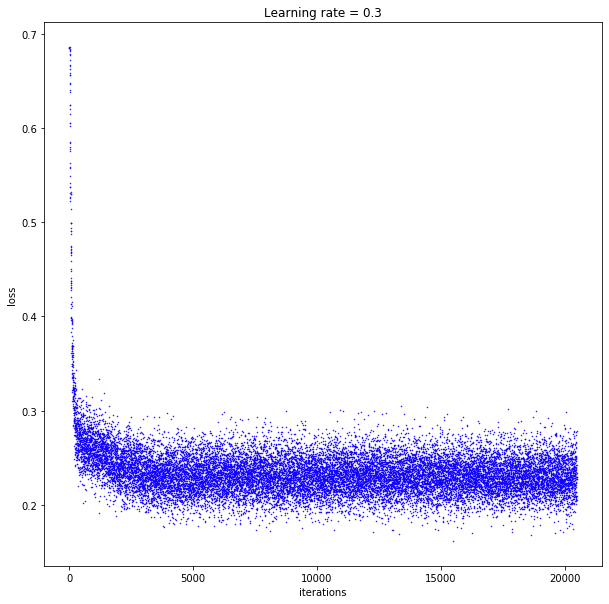

In [19]:
loss = model.history.history['loss']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Learning rate = 0.3')
ax.set_xlabel('iterations')
ax.set_ylabel('loss')
ax.plot(loss, marker='.', color='#0F00FF', markersize=1, linestyle='')

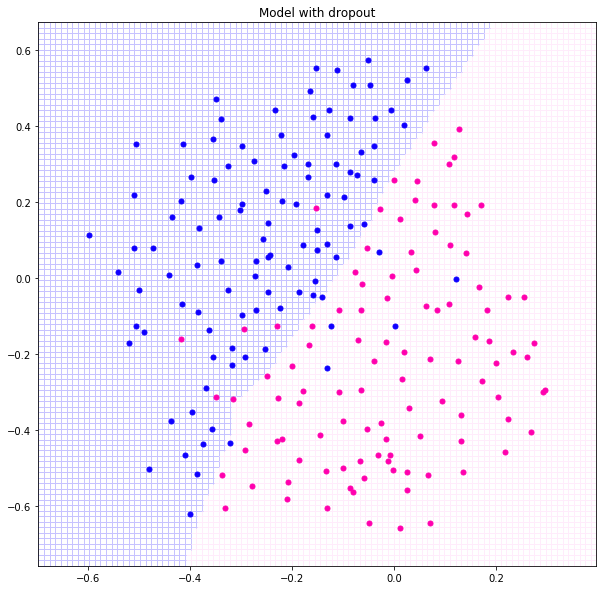

In [20]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1])
ax.set_title('Model with dropout') 

u = np.linspace(np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, 100)
v = np.linspace(np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1, 100)
z = []
for i in range(100):
    for j in range(100):
        z.append([u[i], v[j]])
z = np.array(z)
w = (model.predict(z)[:,0]>0.5).astype(int)
model_pos = np.where(w == 1)[0]
model_neg = np.where(w == 0)[0]
ax.plot(z[model_pos,0], z[model_pos,1], marker='+', color='#C7C3FF', markersize=10, linestyle='')
ax.plot(z[model_neg,0], z[model_neg,1], marker='+', color='#FFECFB', markersize=10, linestyle='')

pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='')